<h1 style='background-image: url("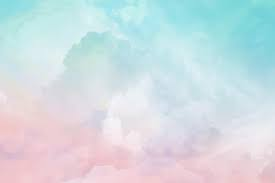");color: #008000;font-weight: bolder'>𝒦𝒶𝑔𝑔𝓁𝑒 𝒮𝑒𝓅𝓉𝑒𝓂𝒷𝑒𝓇 𝒯𝒶𝒷𝓊𝓁𝒶𝓇 𝒫𝓁𝒶𝓎𝑔𝓇𝑜𝓊𝓃𝒹</h1>


In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"\Users\Slmss\Desktop\Tabular\train.csv")
data.head()

,row_id,date,country,store,product,num_sold
0,0,2017-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques,663
1,1,2017-01-01,Belgium,KaggleMart,Kaggle Getting Started,615
2,2,2017-01-01,Belgium,KaggleMart,Kaggle Recipe Book,480
3,3,2017-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
4,4,2017-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques,240


In [3]:
import matplotlib.pyplot as plt

<AxesSubplot:>

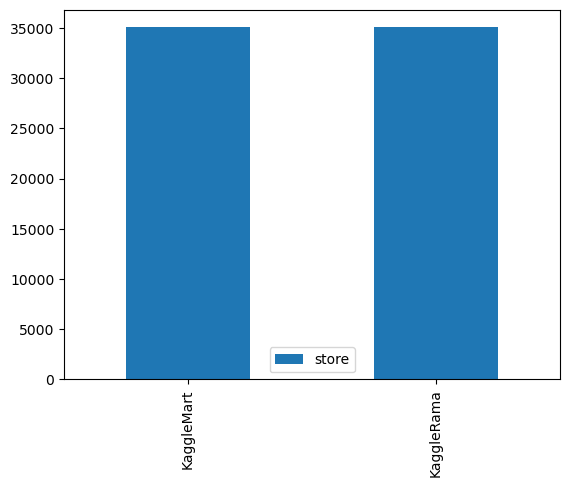

In [4]:
pd.DataFrame(data['store'].value_counts()).plot(kind='bar')

In [83]:
data.plot(kind='bar')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000268A503F0D0> (for post_execute):



KeyboardInterrupt



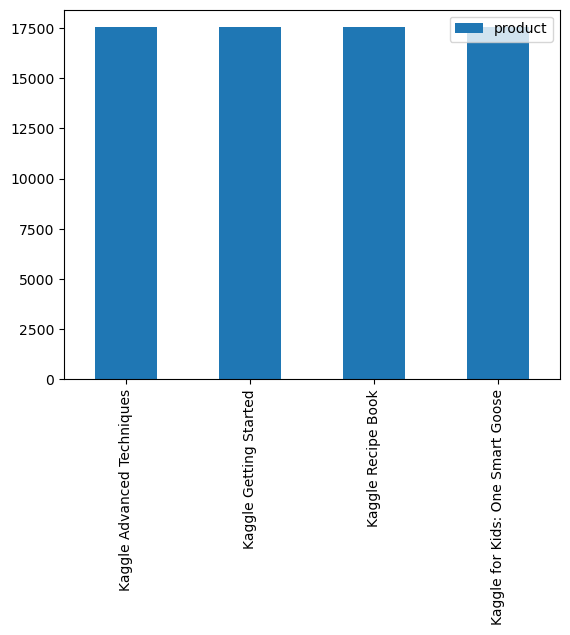

In [82]:
pd.DataFrame(data['product'].value_counts()).plot(kind='bar',stacked=True)
plt.show()

In [16]:
pd.DatetimeIndex(data.date)[0]-pd.DatetimeIndex(data.date)[-1]

Timedelta('-1460 days +00:00:00')

In [9]:
df=data.set_index(pd.DatetimeIndex(data.date)).drop('date',axis=1)
df

,row_id,country,store,product,num_sold
date,,,,,
2017-01-01,0,Belgium,KaggleMart,Kaggle Advanced Techniques,663
2017-01-01,1,Belgium,KaggleMart,Kaggle Getting Started,615
2017-01-01,2,Belgium,KaggleMart,Kaggle Recipe Book,480
2017-01-01,3,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose,710
2017-01-01,4,Belgium,KaggleRama,Kaggle Advanced Techniques,240
...,...,...,...,...,...
2020-12-31,70123,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
2020-12-31,70124,Spain,KaggleRama,Kaggle Advanced Techniques,215
2020-12-31,70125,Spain,KaggleRama,Kaggle Getting Started,158


In [10]:
df2=pd.get_dummies(df)
df2

,row_id,num_sold,country_Belgium,country_France,country_Germany,country_Italy,country_Poland,country_Spain,store_KaggleMart,store_KaggleRama,product_Kaggle Advanced Techniques,product_Kaggle Getting Started,product_Kaggle Recipe Book,product_Kaggle for Kids: One Smart Goose
date,,,,,,,,,,,,,,
2017-01-01,0,663,1,0,0,0,0,0,1,0,1,0,0,0
2017-01-01,1,615,1,0,0,0,0,0,1,0,0,1,0,0
2017-01-01,2,480,1,0,0,0,0,0,1,0,0,0,1,0
2017-01-01,3,710,1,0,0,0,0,0,1,0,0,0,0,1
2017-01-01,4,240,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,70123,614,0,0,0,0,0,1,1,0,0,0,0,1
2020-12-31,70124,215,0,0,0,0,0,1,0,1,1,0,0,0
2020-12-31,70125,158,0,0,0,0,0,1,0,1,0,1,0,0


In [20]:
X=df2.drop('num_sold',axis=1).values
Y=df2['num_sold'].values
X=X.reshape(70128, 13)
Y=Y.reshape(70128)

In [13]:
import xgboost

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [26]:
reg = XGBRegressor(
    eval_metric=mean_absolute_error,n_estimators=10000
)
reg.fit(X, Y, eval_set=[(X, Y)])

[0]	validation_0-rmse:164.99657	validation_0-mean_absolute_error:135.70061
[1]	validation_0-rmse:119.41118	validation_0-mean_absolute_error:95.02068
[2]	validation_0-rmse:88.83356	validation_0-mean_absolute_error:66.63943
[3]	validation_0-rmse:68.75626	validation_0-mean_absolute_error:47.81258
[4]	validation_0-rmse:55.32671	validation_0-mean_absolute_error:35.98999
[5]	validation_0-rmse:47.03347	validation_0-mean_absolute_error:29.54566
[6]	validation_0-rmse:41.41563	validation_0-mean_absolute_error:25.41557
[7]	validation_0-rmse:38.18822	validation_0-mean_absolute_error:23.47978
[8]	validation_0-rmse:35.79715	validation_0-mean_absolute_error:22.29359
[9]	validation_0-rmse:33.95248	validation_0-mean_absolute_error:21.30370
[10]	validation_0-rmse:33.07778	validation_0-mean_absolute_error:20.90292
[11]	validation_0-rmse:31.81077	validation_0-mean_absolute_error:20.33051
[12]	validation_0-rmse:31.37824	validation_0-mean_absolute_error:20.10814
[13]	validation_0-rmse:30.85803	validation_0-

[111]	validation_0-rmse:17.28476	validation_0-mean_absolute_error:11.33526
[112]	validation_0-rmse:17.25151	validation_0-mean_absolute_error:11.30406
[113]	validation_0-rmse:17.21884	validation_0-mean_absolute_error:11.28201
[114]	validation_0-rmse:17.14496	validation_0-mean_absolute_error:11.23180
[115]	validation_0-rmse:17.09710	validation_0-mean_absolute_error:11.19588
[116]	validation_0-rmse:17.06323	validation_0-mean_absolute_error:11.16661
[117]	validation_0-rmse:16.94179	validation_0-mean_absolute_error:11.10433
[118]	validation_0-rmse:16.87020	validation_0-mean_absolute_error:11.04986
[119]	validation_0-rmse:16.79462	validation_0-mean_absolute_error:11.01107
[120]	validation_0-rmse:16.76272	validation_0-mean_absolute_error:10.98747
[121]	validation_0-rmse:16.70295	validation_0-mean_absolute_error:10.94325
[122]	validation_0-rmse:16.67540	validation_0-mean_absolute_error:10.92480
[123]	validation_0-rmse:16.66030	validation_0-mean_absolute_error:10.91481
[124]	validation_0-rmse:1

[222]	validation_0-rmse:13.55344	validation_0-mean_absolute_error:8.95100
[223]	validation_0-rmse:13.54355	validation_0-mean_absolute_error:8.94453
[224]	validation_0-rmse:13.52539	validation_0-mean_absolute_error:8.93259
[225]	validation_0-rmse:13.51117	validation_0-mean_absolute_error:8.92277
[226]	validation_0-rmse:13.50416	validation_0-mean_absolute_error:8.91807
[227]	validation_0-rmse:13.49684	validation_0-mean_absolute_error:8.91414
[228]	validation_0-rmse:13.46051	validation_0-mean_absolute_error:8.89504
[229]	validation_0-rmse:13.45412	validation_0-mean_absolute_error:8.89140
[230]	validation_0-rmse:13.44056	validation_0-mean_absolute_error:8.88188
[231]	validation_0-rmse:13.43091	validation_0-mean_absolute_error:8.87542
[232]	validation_0-rmse:13.39603	validation_0-mean_absolute_error:8.85992
[233]	validation_0-rmse:13.37607	validation_0-mean_absolute_error:8.84880
[234]	validation_0-rmse:13.35751	validation_0-mean_absolute_error:8.83625
[235]	validation_0-rmse:13.33482	valid

[333]	validation_0-rmse:11.88227	validation_0-mean_absolute_error:7.96869
[334]	validation_0-rmse:11.86758	validation_0-mean_absolute_error:7.96056
[335]	validation_0-rmse:11.86656	validation_0-mean_absolute_error:7.95962
[336]	validation_0-rmse:11.85638	validation_0-mean_absolute_error:7.95300
[337]	validation_0-rmse:11.84890	validation_0-mean_absolute_error:7.94844
[338]	validation_0-rmse:11.84843	validation_0-mean_absolute_error:7.94805
[339]	validation_0-rmse:11.84560	validation_0-mean_absolute_error:7.94613
[340]	validation_0-rmse:11.82575	validation_0-mean_absolute_error:7.93663
[341]	validation_0-rmse:11.80821	validation_0-mean_absolute_error:7.92684
[342]	validation_0-rmse:11.79347	validation_0-mean_absolute_error:7.91855
[343]	validation_0-rmse:11.77832	validation_0-mean_absolute_error:7.90940
[344]	validation_0-rmse:11.76147	validation_0-mean_absolute_error:7.90304
[345]	validation_0-rmse:11.74077	validation_0-mean_absolute_error:7.89080
[346]	validation_0-rmse:11.73678	valid

[444]	validation_0-rmse:10.91782	validation_0-mean_absolute_error:7.38726
[445]	validation_0-rmse:10.91313	validation_0-mean_absolute_error:7.38463
[446]	validation_0-rmse:10.90938	validation_0-mean_absolute_error:7.38186
[447]	validation_0-rmse:10.90898	validation_0-mean_absolute_error:7.38127
[448]	validation_0-rmse:10.90011	validation_0-mean_absolute_error:7.37526
[449]	validation_0-rmse:10.89979	validation_0-mean_absolute_error:7.37488
[450]	validation_0-rmse:10.88563	validation_0-mean_absolute_error:7.36608
[451]	validation_0-rmse:10.87877	validation_0-mean_absolute_error:7.36126
[452]	validation_0-rmse:10.87274	validation_0-mean_absolute_error:7.35813
[453]	validation_0-rmse:10.86847	validation_0-mean_absolute_error:7.35481
[454]	validation_0-rmse:10.86669	validation_0-mean_absolute_error:7.35336
[455]	validation_0-rmse:10.86184	validation_0-mean_absolute_error:7.35079
[456]	validation_0-rmse:10.85450	validation_0-mean_absolute_error:7.34598
[457]	validation_0-rmse:10.84797	valid

[555]	validation_0-rmse:10.34337	validation_0-mean_absolute_error:7.03210
[556]	validation_0-rmse:10.33635	validation_0-mean_absolute_error:7.02876
[557]	validation_0-rmse:10.33250	validation_0-mean_absolute_error:7.02615
[558]	validation_0-rmse:10.32536	validation_0-mean_absolute_error:7.02063
[559]	validation_0-rmse:10.31830	validation_0-mean_absolute_error:7.01695
[560]	validation_0-rmse:10.31698	validation_0-mean_absolute_error:7.01605
[561]	validation_0-rmse:10.30398	validation_0-mean_absolute_error:7.00859
[562]	validation_0-rmse:10.29864	validation_0-mean_absolute_error:7.00566
[563]	validation_0-rmse:10.29564	validation_0-mean_absolute_error:7.00376
[564]	validation_0-rmse:10.29483	validation_0-mean_absolute_error:7.00293
[565]	validation_0-rmse:10.29005	validation_0-mean_absolute_error:7.00006
[566]	validation_0-rmse:10.28470	validation_0-mean_absolute_error:6.99676
[567]	validation_0-rmse:10.27875	validation_0-mean_absolute_error:6.99113
[568]	validation_0-rmse:10.27848	valid

[667]	validation_0-rmse:9.92166	validation_0-mean_absolute_error:6.75520
[668]	validation_0-rmse:9.92150	validation_0-mean_absolute_error:6.75481
[669]	validation_0-rmse:9.92080	validation_0-mean_absolute_error:6.75408
[670]	validation_0-rmse:9.91880	validation_0-mean_absolute_error:6.75243
[671]	validation_0-rmse:9.91717	validation_0-mean_absolute_error:6.75079
[672]	validation_0-rmse:9.91602	validation_0-mean_absolute_error:6.74990
[673]	validation_0-rmse:9.91378	validation_0-mean_absolute_error:6.74835
[674]	validation_0-rmse:9.90927	validation_0-mean_absolute_error:6.74547
[675]	validation_0-rmse:9.90589	validation_0-mean_absolute_error:6.74364
[676]	validation_0-rmse:9.90177	validation_0-mean_absolute_error:6.74129
[677]	validation_0-rmse:9.89620	validation_0-mean_absolute_error:6.73770
[678]	validation_0-rmse:9.88994	validation_0-mean_absolute_error:6.73444
[679]	validation_0-rmse:9.88807	validation_0-mean_absolute_error:6.73328
[680]	validation_0-rmse:9.88621	validation_0-mean_a

[780]	validation_0-rmse:9.52189	validation_0-mean_absolute_error:6.50384
[781]	validation_0-rmse:9.51867	validation_0-mean_absolute_error:6.50162
[782]	validation_0-rmse:9.51551	validation_0-mean_absolute_error:6.49961
[783]	validation_0-rmse:9.51027	validation_0-mean_absolute_error:6.49484
[784]	validation_0-rmse:9.50708	validation_0-mean_absolute_error:6.49298
[785]	validation_0-rmse:9.50281	validation_0-mean_absolute_error:6.49030
[786]	validation_0-rmse:9.50178	validation_0-mean_absolute_error:6.48963
[787]	validation_0-rmse:9.49889	validation_0-mean_absolute_error:6.48767
[788]	validation_0-rmse:9.49751	validation_0-mean_absolute_error:6.48643
[789]	validation_0-rmse:9.49658	validation_0-mean_absolute_error:6.48556
[790]	validation_0-rmse:9.49396	validation_0-mean_absolute_error:6.48346
[791]	validation_0-rmse:9.49086	validation_0-mean_absolute_error:6.48152
[792]	validation_0-rmse:9.48343	validation_0-mean_absolute_error:6.47800
[793]	validation_0-rmse:9.48156	validation_0-mean_a

[893]	validation_0-rmse:9.15267	validation_0-mean_absolute_error:6.27269
[894]	validation_0-rmse:9.15122	validation_0-mean_absolute_error:6.27180
[895]	validation_0-rmse:9.14752	validation_0-mean_absolute_error:6.26965
[896]	validation_0-rmse:9.14412	validation_0-mean_absolute_error:6.26724
[897]	validation_0-rmse:9.14029	validation_0-mean_absolute_error:6.26452
[898]	validation_0-rmse:9.13993	validation_0-mean_absolute_error:6.26404
[899]	validation_0-rmse:9.13967	validation_0-mean_absolute_error:6.26370
[900]	validation_0-rmse:9.13824	validation_0-mean_absolute_error:6.26260
[901]	validation_0-rmse:9.13684	validation_0-mean_absolute_error:6.26159
[902]	validation_0-rmse:9.13312	validation_0-mean_absolute_error:6.26009
[903]	validation_0-rmse:9.12948	validation_0-mean_absolute_error:6.25780
[904]	validation_0-rmse:9.11993	validation_0-mean_absolute_error:6.25304
[905]	validation_0-rmse:9.11549	validation_0-mean_absolute_error:6.25039
[906]	validation_0-rmse:9.11336	validation_0-mean_a

[1006]	validation_0-rmse:8.88913	validation_0-mean_absolute_error:6.09916
[1007]	validation_0-rmse:8.88879	validation_0-mean_absolute_error:6.09869
[1008]	validation_0-rmse:8.88648	validation_0-mean_absolute_error:6.09744
[1009]	validation_0-rmse:8.88609	validation_0-mean_absolute_error:6.09687
[1010]	validation_0-rmse:8.88488	validation_0-mean_absolute_error:6.09574
[1011]	validation_0-rmse:8.88425	validation_0-mean_absolute_error:6.09503
[1012]	validation_0-rmse:8.88392	validation_0-mean_absolute_error:6.09454
[1013]	validation_0-rmse:8.88340	validation_0-mean_absolute_error:6.09399
[1014]	validation_0-rmse:8.88269	validation_0-mean_absolute_error:6.09330
[1015]	validation_0-rmse:8.88104	validation_0-mean_absolute_error:6.09228
[1016]	validation_0-rmse:8.88079	validation_0-mean_absolute_error:6.09197
[1017]	validation_0-rmse:8.87977	validation_0-mean_absolute_error:6.09114
[1018]	validation_0-rmse:8.87945	validation_0-mean_absolute_error:6.09069
[1019]	validation_0-rmse:8.87841	valid

[1117]	validation_0-rmse:8.62143	validation_0-mean_absolute_error:5.92589
[1118]	validation_0-rmse:8.61853	validation_0-mean_absolute_error:5.92382
[1119]	validation_0-rmse:8.61502	validation_0-mean_absolute_error:5.92203
[1120]	validation_0-rmse:8.61393	validation_0-mean_absolute_error:5.92103
[1121]	validation_0-rmse:8.61330	validation_0-mean_absolute_error:5.92044
[1122]	validation_0-rmse:8.61225	validation_0-mean_absolute_error:5.91973
[1123]	validation_0-rmse:8.61162	validation_0-mean_absolute_error:5.91933
[1124]	validation_0-rmse:8.61072	validation_0-mean_absolute_error:5.91848
[1125]	validation_0-rmse:8.60760	validation_0-mean_absolute_error:5.91677
[1126]	validation_0-rmse:8.60499	validation_0-mean_absolute_error:5.91527
[1127]	validation_0-rmse:8.60212	validation_0-mean_absolute_error:5.91302
[1128]	validation_0-rmse:8.59954	validation_0-mean_absolute_error:5.91113
[1129]	validation_0-rmse:8.59923	validation_0-mean_absolute_error:5.91066
[1130]	validation_0-rmse:8.59822	valid

[1228]	validation_0-rmse:8.38863	validation_0-mean_absolute_error:5.77385
[1229]	validation_0-rmse:8.38663	validation_0-mean_absolute_error:5.77230
[1230]	validation_0-rmse:8.38385	validation_0-mean_absolute_error:5.77028
[1231]	validation_0-rmse:8.38164	validation_0-mean_absolute_error:5.76906
[1232]	validation_0-rmse:8.37839	validation_0-mean_absolute_error:5.76766
[1233]	validation_0-rmse:8.37696	validation_0-mean_absolute_error:5.76661
[1234]	validation_0-rmse:8.37509	validation_0-mean_absolute_error:5.76558
[1235]	validation_0-rmse:8.37378	validation_0-mean_absolute_error:5.76481
[1236]	validation_0-rmse:8.37201	validation_0-mean_absolute_error:5.76380
[1237]	validation_0-rmse:8.37077	validation_0-mean_absolute_error:5.76271
[1238]	validation_0-rmse:8.36893	validation_0-mean_absolute_error:5.76157
[1239]	validation_0-rmse:8.36649	validation_0-mean_absolute_error:5.76017
[1240]	validation_0-rmse:8.36486	validation_0-mean_absolute_error:5.75906
[1241]	validation_0-rmse:8.36365	valid

[1339]	validation_0-rmse:8.17438	validation_0-mean_absolute_error:5.63428
[1340]	validation_0-rmse:8.17272	validation_0-mean_absolute_error:5.63301
[1341]	validation_0-rmse:8.17155	validation_0-mean_absolute_error:5.63218
[1342]	validation_0-rmse:8.17000	validation_0-mean_absolute_error:5.63130
[1343]	validation_0-rmse:8.16685	validation_0-mean_absolute_error:5.62946
[1344]	validation_0-rmse:8.16526	validation_0-mean_absolute_error:5.62840
[1345]	validation_0-rmse:8.16315	validation_0-mean_absolute_error:5.62712
[1346]	validation_0-rmse:8.16032	validation_0-mean_absolute_error:5.62536
[1347]	validation_0-rmse:8.15967	validation_0-mean_absolute_error:5.62472
[1348]	validation_0-rmse:8.15903	validation_0-mean_absolute_error:5.62426
[1349]	validation_0-rmse:8.15819	validation_0-mean_absolute_error:5.62357
[1350]	validation_0-rmse:8.15788	validation_0-mean_absolute_error:5.62332
[1351]	validation_0-rmse:8.15741	validation_0-mean_absolute_error:5.62276
[1352]	validation_0-rmse:8.15683	valid

[1450]	validation_0-rmse:7.96322	validation_0-mean_absolute_error:5.49171
[1451]	validation_0-rmse:7.96141	validation_0-mean_absolute_error:5.49085
[1452]	validation_0-rmse:7.96116	validation_0-mean_absolute_error:5.49050
[1453]	validation_0-rmse:7.96073	validation_0-mean_absolute_error:5.49005
[1454]	validation_0-rmse:7.96001	validation_0-mean_absolute_error:5.48943
[1455]	validation_0-rmse:7.95841	validation_0-mean_absolute_error:5.48839
[1456]	validation_0-rmse:7.95599	validation_0-mean_absolute_error:5.48658
[1457]	validation_0-rmse:7.95411	validation_0-mean_absolute_error:5.48553
[1458]	validation_0-rmse:7.95364	validation_0-mean_absolute_error:5.48487
[1459]	validation_0-rmse:7.95325	validation_0-mean_absolute_error:5.48439
[1460]	validation_0-rmse:7.95266	validation_0-mean_absolute_error:5.48381
[1461]	validation_0-rmse:7.95159	validation_0-mean_absolute_error:5.48304
[1462]	validation_0-rmse:7.94987	validation_0-mean_absolute_error:5.48200
[1463]	validation_0-rmse:7.94671	valid

[1561]	validation_0-rmse:7.76770	validation_0-mean_absolute_error:5.36415
[1562]	validation_0-rmse:7.76515	validation_0-mean_absolute_error:5.36291
[1563]	validation_0-rmse:7.76359	validation_0-mean_absolute_error:5.36183
[1564]	validation_0-rmse:7.76284	validation_0-mean_absolute_error:5.36134
[1565]	validation_0-rmse:7.76158	validation_0-mean_absolute_error:5.36052
[1566]	validation_0-rmse:7.76002	validation_0-mean_absolute_error:5.35934
[1567]	validation_0-rmse:7.75887	validation_0-mean_absolute_error:5.35840
[1568]	validation_0-rmse:7.75479	validation_0-mean_absolute_error:5.35614
[1569]	validation_0-rmse:7.75350	validation_0-mean_absolute_error:5.35523
[1570]	validation_0-rmse:7.74719	validation_0-mean_absolute_error:5.35238
[1571]	validation_0-rmse:7.74615	validation_0-mean_absolute_error:5.35168
[1572]	validation_0-rmse:7.74467	validation_0-mean_absolute_error:5.35076
[1573]	validation_0-rmse:7.74340	validation_0-mean_absolute_error:5.34965
[1574]	validation_0-rmse:7.74252	valid

[1672]	validation_0-rmse:7.56689	validation_0-mean_absolute_error:5.23236
[1673]	validation_0-rmse:7.56670	validation_0-mean_absolute_error:5.23208
[1674]	validation_0-rmse:7.56646	validation_0-mean_absolute_error:5.23180
[1675]	validation_0-rmse:7.56558	validation_0-mean_absolute_error:5.23111
[1676]	validation_0-rmse:7.56551	validation_0-mean_absolute_error:5.23096
[1677]	validation_0-rmse:7.56544	validation_0-mean_absolute_error:5.23077
[1678]	validation_0-rmse:7.56440	validation_0-mean_absolute_error:5.22997
[1679]	validation_0-rmse:7.56290	validation_0-mean_absolute_error:5.22900
[1680]	validation_0-rmse:7.56225	validation_0-mean_absolute_error:5.22833
[1681]	validation_0-rmse:7.56116	validation_0-mean_absolute_error:5.22750
[1682]	validation_0-rmse:7.56050	validation_0-mean_absolute_error:5.22686
[1683]	validation_0-rmse:7.55870	validation_0-mean_absolute_error:5.22569
[1684]	validation_0-rmse:7.55699	validation_0-mean_absolute_error:5.22457
[1685]	validation_0-rmse:7.55527	valid

[1783]	validation_0-rmse:7.44465	validation_0-mean_absolute_error:5.14621
[1784]	validation_0-rmse:7.44228	validation_0-mean_absolute_error:5.14474
[1785]	validation_0-rmse:7.44124	validation_0-mean_absolute_error:5.14404
[1786]	validation_0-rmse:7.43841	validation_0-mean_absolute_error:5.14226
[1787]	validation_0-rmse:7.43610	validation_0-mean_absolute_error:5.14073
[1788]	validation_0-rmse:7.43421	validation_0-mean_absolute_error:5.13968
[1789]	validation_0-rmse:7.43295	validation_0-mean_absolute_error:5.13890
[1790]	validation_0-rmse:7.43276	validation_0-mean_absolute_error:5.13859
[1791]	validation_0-rmse:7.43218	validation_0-mean_absolute_error:5.13803
[1792]	validation_0-rmse:7.43047	validation_0-mean_absolute_error:5.13687
[1793]	validation_0-rmse:7.42874	validation_0-mean_absolute_error:5.13574
[1794]	validation_0-rmse:7.42842	validation_0-mean_absolute_error:5.13537
[1795]	validation_0-rmse:7.42825	validation_0-mean_absolute_error:5.13509
[1796]	validation_0-rmse:7.42799	valid

[1894]	validation_0-rmse:7.29417	validation_0-mean_absolute_error:5.04586
[1895]	validation_0-rmse:7.29365	validation_0-mean_absolute_error:5.04537
[1896]	validation_0-rmse:7.29304	validation_0-mean_absolute_error:5.04486
[1897]	validation_0-rmse:7.29220	validation_0-mean_absolute_error:5.04419
[1898]	validation_0-rmse:7.29189	validation_0-mean_absolute_error:5.04391
[1899]	validation_0-rmse:7.29149	validation_0-mean_absolute_error:5.04357
[1900]	validation_0-rmse:7.29086	validation_0-mean_absolute_error:5.04306
[1901]	validation_0-rmse:7.28980	validation_0-mean_absolute_error:5.04232
[1902]	validation_0-rmse:7.28767	validation_0-mean_absolute_error:5.04113
[1903]	validation_0-rmse:7.28392	validation_0-mean_absolute_error:5.03902
[1904]	validation_0-rmse:7.28182	validation_0-mean_absolute_error:5.03785
[1905]	validation_0-rmse:7.28004	validation_0-mean_absolute_error:5.03686
[1906]	validation_0-rmse:7.27826	validation_0-mean_absolute_error:5.03550
[1907]	validation_0-rmse:7.27758	valid

[2005]	validation_0-rmse:7.13144	validation_0-mean_absolute_error:4.93756
[2006]	validation_0-rmse:7.13015	validation_0-mean_absolute_error:4.93677
[2007]	validation_0-rmse:7.12986	validation_0-mean_absolute_error:4.93652
[2008]	validation_0-rmse:7.12789	validation_0-mean_absolute_error:4.93544
[2009]	validation_0-rmse:7.12599	validation_0-mean_absolute_error:4.93415
[2010]	validation_0-rmse:7.12483	validation_0-mean_absolute_error:4.93319
[2011]	validation_0-rmse:7.12162	validation_0-mean_absolute_error:4.93101
[2012]	validation_0-rmse:7.12084	validation_0-mean_absolute_error:4.93025
[2013]	validation_0-rmse:7.11823	validation_0-mean_absolute_error:4.92849
[2014]	validation_0-rmse:7.11755	validation_0-mean_absolute_error:4.92787
[2015]	validation_0-rmse:7.11741	validation_0-mean_absolute_error:4.92765
[2016]	validation_0-rmse:7.11681	validation_0-mean_absolute_error:4.92718
[2017]	validation_0-rmse:7.11620	validation_0-mean_absolute_error:4.92667
[2018]	validation_0-rmse:7.11573	valid

[2116]	validation_0-rmse:7.00950	validation_0-mean_absolute_error:4.85287
[2117]	validation_0-rmse:7.00841	validation_0-mean_absolute_error:4.85210
[2118]	validation_0-rmse:7.00719	validation_0-mean_absolute_error:4.85147
[2119]	validation_0-rmse:7.00533	validation_0-mean_absolute_error:4.85048
[2120]	validation_0-rmse:7.00372	validation_0-mean_absolute_error:4.84973
[2121]	validation_0-rmse:7.00316	validation_0-mean_absolute_error:4.84935
[2122]	validation_0-rmse:7.00287	validation_0-mean_absolute_error:4.84903
[2123]	validation_0-rmse:7.00226	validation_0-mean_absolute_error:4.84839
[2124]	validation_0-rmse:7.00166	validation_0-mean_absolute_error:4.84790
[2125]	validation_0-rmse:7.00067	validation_0-mean_absolute_error:4.84696
[2126]	validation_0-rmse:7.00040	validation_0-mean_absolute_error:4.84666
[2127]	validation_0-rmse:6.99931	validation_0-mean_absolute_error:4.84570
[2128]	validation_0-rmse:6.99882	validation_0-mean_absolute_error:4.84526
[2129]	validation_0-rmse:6.99729	valid

[2227]	validation_0-rmse:6.89225	validation_0-mean_absolute_error:4.77400
[2228]	validation_0-rmse:6.89213	validation_0-mean_absolute_error:4.77375
[2229]	validation_0-rmse:6.89210	validation_0-mean_absolute_error:4.77365
[2230]	validation_0-rmse:6.89186	validation_0-mean_absolute_error:4.77339
[2231]	validation_0-rmse:6.89026	validation_0-mean_absolute_error:4.77257
[2232]	validation_0-rmse:6.88960	validation_0-mean_absolute_error:4.77213
[2233]	validation_0-rmse:6.88823	validation_0-mean_absolute_error:4.77116
[2234]	validation_0-rmse:6.88788	validation_0-mean_absolute_error:4.77079
[2235]	validation_0-rmse:6.88715	validation_0-mean_absolute_error:4.77008
[2236]	validation_0-rmse:6.88646	validation_0-mean_absolute_error:4.76948
[2237]	validation_0-rmse:6.88581	validation_0-mean_absolute_error:4.76896
[2238]	validation_0-rmse:6.88481	validation_0-mean_absolute_error:4.76819
[2239]	validation_0-rmse:6.88462	validation_0-mean_absolute_error:4.76794
[2240]	validation_0-rmse:6.88447	valid

[2338]	validation_0-rmse:6.77074	validation_0-mean_absolute_error:4.69059
[2339]	validation_0-rmse:6.76818	validation_0-mean_absolute_error:4.68905
[2340]	validation_0-rmse:6.76780	validation_0-mean_absolute_error:4.68857
[2341]	validation_0-rmse:6.76681	validation_0-mean_absolute_error:4.68798
[2342]	validation_0-rmse:6.76631	validation_0-mean_absolute_error:4.68755
[2343]	validation_0-rmse:6.76258	validation_0-mean_absolute_error:4.68528
[2344]	validation_0-rmse:6.76042	validation_0-mean_absolute_error:4.68368
[2345]	validation_0-rmse:6.75959	validation_0-mean_absolute_error:4.68287
[2346]	validation_0-rmse:6.75913	validation_0-mean_absolute_error:4.68246
[2347]	validation_0-rmse:6.75839	validation_0-mean_absolute_error:4.68194
[2348]	validation_0-rmse:6.75801	validation_0-mean_absolute_error:4.68160
[2349]	validation_0-rmse:6.75755	validation_0-mean_absolute_error:4.68124
[2350]	validation_0-rmse:6.75721	validation_0-mean_absolute_error:4.68085
[2351]	validation_0-rmse:6.75650	valid

[2449]	validation_0-rmse:6.65356	validation_0-mean_absolute_error:4.60763
[2450]	validation_0-rmse:6.65228	validation_0-mean_absolute_error:4.60669
[2451]	validation_0-rmse:6.65050	validation_0-mean_absolute_error:4.60543
[2452]	validation_0-rmse:6.65040	validation_0-mean_absolute_error:4.60522
[2453]	validation_0-rmse:6.64856	validation_0-mean_absolute_error:4.60392
[2454]	validation_0-rmse:6.64637	validation_0-mean_absolute_error:4.60258
[2455]	validation_0-rmse:6.64509	validation_0-mean_absolute_error:4.60162
[2456]	validation_0-rmse:6.64439	validation_0-mean_absolute_error:4.60098
[2457]	validation_0-rmse:6.64300	validation_0-mean_absolute_error:4.60027
[2458]	validation_0-rmse:6.64217	validation_0-mean_absolute_error:4.59980
[2459]	validation_0-rmse:6.64113	validation_0-mean_absolute_error:4.59866
[2460]	validation_0-rmse:6.64029	validation_0-mean_absolute_error:4.59805
[2461]	validation_0-rmse:6.63986	validation_0-mean_absolute_error:4.59757
[2462]	validation_0-rmse:6.63920	valid

[2560]	validation_0-rmse:6.54310	validation_0-mean_absolute_error:4.53065
[2561]	validation_0-rmse:6.54198	validation_0-mean_absolute_error:4.52975
[2562]	validation_0-rmse:6.54083	validation_0-mean_absolute_error:4.52909
[2563]	validation_0-rmse:6.53996	validation_0-mean_absolute_error:4.52865
[2564]	validation_0-rmse:6.53899	validation_0-mean_absolute_error:4.52807
[2565]	validation_0-rmse:6.53723	validation_0-mean_absolute_error:4.52681
[2566]	validation_0-rmse:6.53608	validation_0-mean_absolute_error:4.52590
[2567]	validation_0-rmse:6.53521	validation_0-mean_absolute_error:4.52535
[2568]	validation_0-rmse:6.53432	validation_0-mean_absolute_error:4.52480
[2569]	validation_0-rmse:6.53284	validation_0-mean_absolute_error:4.52396
[2570]	validation_0-rmse:6.53241	validation_0-mean_absolute_error:4.52354
[2571]	validation_0-rmse:6.53150	validation_0-mean_absolute_error:4.52298
[2572]	validation_0-rmse:6.53089	validation_0-mean_absolute_error:4.52256
[2573]	validation_0-rmse:6.53073	valid

[2671]	validation_0-rmse:6.43397	validation_0-mean_absolute_error:4.45657
[2672]	validation_0-rmse:6.43361	validation_0-mean_absolute_error:4.45623
[2673]	validation_0-rmse:6.43348	validation_0-mean_absolute_error:4.45603
[2674]	validation_0-rmse:6.43337	validation_0-mean_absolute_error:4.45584
[2675]	validation_0-rmse:6.43326	validation_0-mean_absolute_error:4.45567
[2676]	validation_0-rmse:6.43249	validation_0-mean_absolute_error:4.45488
[2677]	validation_0-rmse:6.43118	validation_0-mean_absolute_error:4.45421
[2678]	validation_0-rmse:6.43102	validation_0-mean_absolute_error:4.45402
[2679]	validation_0-rmse:6.43035	validation_0-mean_absolute_error:4.45344
[2680]	validation_0-rmse:6.42915	validation_0-mean_absolute_error:4.45270
[2681]	validation_0-rmse:6.42754	validation_0-mean_absolute_error:4.45172
[2682]	validation_0-rmse:6.42595	validation_0-mean_absolute_error:4.45107
[2683]	validation_0-rmse:6.42489	validation_0-mean_absolute_error:4.45053
[2684]	validation_0-rmse:6.42410	valid

[2782]	validation_0-rmse:6.32725	validation_0-mean_absolute_error:4.38445
[2783]	validation_0-rmse:6.32717	validation_0-mean_absolute_error:4.38431
[2784]	validation_0-rmse:6.32689	validation_0-mean_absolute_error:4.38402
[2785]	validation_0-rmse:6.32667	validation_0-mean_absolute_error:4.38377
[2786]	validation_0-rmse:6.32550	validation_0-mean_absolute_error:4.38324
[2787]	validation_0-rmse:6.32447	validation_0-mean_absolute_error:4.38274
[2788]	validation_0-rmse:6.32369	validation_0-mean_absolute_error:4.38198
[2789]	validation_0-rmse:6.32263	validation_0-mean_absolute_error:4.38136
[2790]	validation_0-rmse:6.32203	validation_0-mean_absolute_error:4.38084
[2791]	validation_0-rmse:6.32151	validation_0-mean_absolute_error:4.38024
[2792]	validation_0-rmse:6.32081	validation_0-mean_absolute_error:4.37969
[2793]	validation_0-rmse:6.31917	validation_0-mean_absolute_error:4.37893
[2794]	validation_0-rmse:6.31882	validation_0-mean_absolute_error:4.37852
[2795]	validation_0-rmse:6.31848	valid

[2893]	validation_0-rmse:6.23176	validation_0-mean_absolute_error:4.31880
[2894]	validation_0-rmse:6.23030	validation_0-mean_absolute_error:4.31785
[2895]	validation_0-rmse:6.22700	validation_0-mean_absolute_error:4.31545
[2896]	validation_0-rmse:6.22581	validation_0-mean_absolute_error:4.31457
[2897]	validation_0-rmse:6.22523	validation_0-mean_absolute_error:4.31419
[2898]	validation_0-rmse:6.22240	validation_0-mean_absolute_error:4.31223
[2899]	validation_0-rmse:6.22143	validation_0-mean_absolute_error:4.31155
[2900]	validation_0-rmse:6.22046	validation_0-mean_absolute_error:4.31094
[2901]	validation_0-rmse:6.21968	validation_0-mean_absolute_error:4.31039
[2902]	validation_0-rmse:6.21907	validation_0-mean_absolute_error:4.30983
[2903]	validation_0-rmse:6.21765	validation_0-mean_absolute_error:4.30902
[2904]	validation_0-rmse:6.21707	validation_0-mean_absolute_error:4.30858
[2905]	validation_0-rmse:6.21585	validation_0-mean_absolute_error:4.30790
[2906]	validation_0-rmse:6.21427	valid

[3004]	validation_0-rmse:6.09626	validation_0-mean_absolute_error:4.22786
[3005]	validation_0-rmse:6.09388	validation_0-mean_absolute_error:4.22635
[3006]	validation_0-rmse:6.09249	validation_0-mean_absolute_error:4.22558
[3007]	validation_0-rmse:6.09165	validation_0-mean_absolute_error:4.22441
[3008]	validation_0-rmse:6.08977	validation_0-mean_absolute_error:4.22348
[3009]	validation_0-rmse:6.08782	validation_0-mean_absolute_error:4.22250
[3010]	validation_0-rmse:6.08647	validation_0-mean_absolute_error:4.22155
[3011]	validation_0-rmse:6.08575	validation_0-mean_absolute_error:4.22109
[3012]	validation_0-rmse:6.08468	validation_0-mean_absolute_error:4.22030
[3013]	validation_0-rmse:6.08346	validation_0-mean_absolute_error:4.21948
[3014]	validation_0-rmse:6.08181	validation_0-mean_absolute_error:4.21833
[3015]	validation_0-rmse:6.08102	validation_0-mean_absolute_error:4.21769
[3016]	validation_0-rmse:6.08037	validation_0-mean_absolute_error:4.21728
[3017]	validation_0-rmse:6.08001	valid

[3115]	validation_0-rmse:5.99336	validation_0-mean_absolute_error:4.15632
[3116]	validation_0-rmse:5.99330	validation_0-mean_absolute_error:4.15618
[3117]	validation_0-rmse:5.99283	validation_0-mean_absolute_error:4.15587
[3118]	validation_0-rmse:5.99230	validation_0-mean_absolute_error:4.15554
[3119]	validation_0-rmse:5.99142	validation_0-mean_absolute_error:4.15486
[3120]	validation_0-rmse:5.98987	validation_0-mean_absolute_error:4.15398
[3121]	validation_0-rmse:5.98938	validation_0-mean_absolute_error:4.15352
[3122]	validation_0-rmse:5.98893	validation_0-mean_absolute_error:4.15313
[3123]	validation_0-rmse:5.98861	validation_0-mean_absolute_error:4.15279
[3124]	validation_0-rmse:5.98781	validation_0-mean_absolute_error:4.15221
[3125]	validation_0-rmse:5.98683	validation_0-mean_absolute_error:4.15172
[3126]	validation_0-rmse:5.98607	validation_0-mean_absolute_error:4.15116
[3127]	validation_0-rmse:5.98549	validation_0-mean_absolute_error:4.15081
[3128]	validation_0-rmse:5.98483	valid

[3226]	validation_0-rmse:5.90913	validation_0-mean_absolute_error:4.09867
[3227]	validation_0-rmse:5.90803	validation_0-mean_absolute_error:4.09806
[3228]	validation_0-rmse:5.90732	validation_0-mean_absolute_error:4.09754
[3229]	validation_0-rmse:5.90715	validation_0-mean_absolute_error:4.09732
[3230]	validation_0-rmse:5.90648	validation_0-mean_absolute_error:4.09679
[3231]	validation_0-rmse:5.90529	validation_0-mean_absolute_error:4.09594
[3232]	validation_0-rmse:5.90501	validation_0-mean_absolute_error:4.09560
[3233]	validation_0-rmse:5.90426	validation_0-mean_absolute_error:4.09502
[3234]	validation_0-rmse:5.90397	validation_0-mean_absolute_error:4.09467
[3235]	validation_0-rmse:5.90385	validation_0-mean_absolute_error:4.09452
[3236]	validation_0-rmse:5.90265	validation_0-mean_absolute_error:4.09382
[3237]	validation_0-rmse:5.90163	validation_0-mean_absolute_error:4.09324
[3238]	validation_0-rmse:5.90091	validation_0-mean_absolute_error:4.09275
[3239]	validation_0-rmse:5.89938	valid

[3337]	validation_0-rmse:5.81046	validation_0-mean_absolute_error:4.03361
[3338]	validation_0-rmse:5.80990	validation_0-mean_absolute_error:4.03321
[3339]	validation_0-rmse:5.80878	validation_0-mean_absolute_error:4.03263
[3340]	validation_0-rmse:5.80748	validation_0-mean_absolute_error:4.03176
[3341]	validation_0-rmse:5.80635	validation_0-mean_absolute_error:4.03126
[3342]	validation_0-rmse:5.80631	validation_0-mean_absolute_error:4.03119
[3343]	validation_0-rmse:5.80611	validation_0-mean_absolute_error:4.03095
[3344]	validation_0-rmse:5.80603	validation_0-mean_absolute_error:4.03084
[3345]	validation_0-rmse:5.80595	validation_0-mean_absolute_error:4.03071
[3346]	validation_0-rmse:5.80585	validation_0-mean_absolute_error:4.03056
[3347]	validation_0-rmse:5.80573	validation_0-mean_absolute_error:4.03038
[3348]	validation_0-rmse:5.80540	validation_0-mean_absolute_error:4.03003
[3349]	validation_0-rmse:5.80517	validation_0-mean_absolute_error:4.02974
[3350]	validation_0-rmse:5.80203	valid

[3448]	validation_0-rmse:5.71717	validation_0-mean_absolute_error:3.96968
[3449]	validation_0-rmse:5.71592	validation_0-mean_absolute_error:3.96889
[3450]	validation_0-rmse:5.71549	validation_0-mean_absolute_error:3.96855
[3451]	validation_0-rmse:5.71501	validation_0-mean_absolute_error:3.96818
[3452]	validation_0-rmse:5.71429	validation_0-mean_absolute_error:3.96765
[3453]	validation_0-rmse:5.71386	validation_0-mean_absolute_error:3.96725
[3454]	validation_0-rmse:5.71340	validation_0-mean_absolute_error:3.96676
[3455]	validation_0-rmse:5.71155	validation_0-mean_absolute_error:3.96576
[3456]	validation_0-rmse:5.71136	validation_0-mean_absolute_error:3.96553
[3457]	validation_0-rmse:5.71122	validation_0-mean_absolute_error:3.96530
[3458]	validation_0-rmse:5.71094	validation_0-mean_absolute_error:3.96502
[3459]	validation_0-rmse:5.71046	validation_0-mean_absolute_error:3.96461
[3460]	validation_0-rmse:5.71024	validation_0-mean_absolute_error:3.96434
[3461]	validation_0-rmse:5.70908	valid

[3559]	validation_0-rmse:5.63329	validation_0-mean_absolute_error:3.91180
[3560]	validation_0-rmse:5.63196	validation_0-mean_absolute_error:3.91108
[3561]	validation_0-rmse:5.63097	validation_0-mean_absolute_error:3.91034
[3562]	validation_0-rmse:5.62971	validation_0-mean_absolute_error:3.90953
[3563]	validation_0-rmse:5.62903	validation_0-mean_absolute_error:3.90891
[3564]	validation_0-rmse:5.62737	validation_0-mean_absolute_error:3.90803
[3565]	validation_0-rmse:5.62621	validation_0-mean_absolute_error:3.90721
[3566]	validation_0-rmse:5.62484	validation_0-mean_absolute_error:3.90665
[3567]	validation_0-rmse:5.62301	validation_0-mean_absolute_error:3.90573
[3568]	validation_0-rmse:5.62192	validation_0-mean_absolute_error:3.90521
[3569]	validation_0-rmse:5.62099	validation_0-mean_absolute_error:3.90453
[3570]	validation_0-rmse:5.62044	validation_0-mean_absolute_error:3.90410
[3571]	validation_0-rmse:5.61889	validation_0-mean_absolute_error:3.90340
[3572]	validation_0-rmse:5.61784	valid

[3670]	validation_0-rmse:5.53580	validation_0-mean_absolute_error:3.84834
[3671]	validation_0-rmse:5.53404	validation_0-mean_absolute_error:3.84739
[3672]	validation_0-rmse:5.53312	validation_0-mean_absolute_error:3.84693
[3673]	validation_0-rmse:5.53123	validation_0-mean_absolute_error:3.84592
[3674]	validation_0-rmse:5.53018	validation_0-mean_absolute_error:3.84538
[3675]	validation_0-rmse:5.52930	validation_0-mean_absolute_error:3.84485
[3676]	validation_0-rmse:5.52915	validation_0-mean_absolute_error:3.84469
[3677]	validation_0-rmse:5.52876	validation_0-mean_absolute_error:3.84432
[3678]	validation_0-rmse:5.52827	validation_0-mean_absolute_error:3.84398
[3679]	validation_0-rmse:5.52793	validation_0-mean_absolute_error:3.84367
[3680]	validation_0-rmse:5.52742	validation_0-mean_absolute_error:3.84333
[3681]	validation_0-rmse:5.52713	validation_0-mean_absolute_error:3.84307
[3682]	validation_0-rmse:5.52680	validation_0-mean_absolute_error:3.84279
[3683]	validation_0-rmse:5.52484	valid

[3781]	validation_0-rmse:5.44474	validation_0-mean_absolute_error:3.78799
[3782]	validation_0-rmse:5.44463	validation_0-mean_absolute_error:3.78783
[3783]	validation_0-rmse:5.44457	validation_0-mean_absolute_error:3.78771
[3784]	validation_0-rmse:5.44442	validation_0-mean_absolute_error:3.78751
[3785]	validation_0-rmse:5.44370	validation_0-mean_absolute_error:3.78706
[3786]	validation_0-rmse:5.44285	validation_0-mean_absolute_error:3.78650
[3787]	validation_0-rmse:5.44090	validation_0-mean_absolute_error:3.78544
[3788]	validation_0-rmse:5.43973	validation_0-mean_absolute_error:3.78471
[3789]	validation_0-rmse:5.43856	validation_0-mean_absolute_error:3.78398
[3790]	validation_0-rmse:5.43779	validation_0-mean_absolute_error:3.78353
[3791]	validation_0-rmse:5.43701	validation_0-mean_absolute_error:3.78294
[3792]	validation_0-rmse:5.43627	validation_0-mean_absolute_error:3.78248
[3793]	validation_0-rmse:5.43580	validation_0-mean_absolute_error:3.78205
[3794]	validation_0-rmse:5.43503	valid

[3892]	validation_0-rmse:5.34015	validation_0-mean_absolute_error:3.72009
[3893]	validation_0-rmse:5.33965	validation_0-mean_absolute_error:3.71963
[3894]	validation_0-rmse:5.33834	validation_0-mean_absolute_error:3.71886
[3895]	validation_0-rmse:5.33719	validation_0-mean_absolute_error:3.71829
[3896]	validation_0-rmse:5.33662	validation_0-mean_absolute_error:3.71791
[3897]	validation_0-rmse:5.33584	validation_0-mean_absolute_error:3.71725
[3898]	validation_0-rmse:5.33548	validation_0-mean_absolute_error:3.71688
[3899]	validation_0-rmse:5.33511	validation_0-mean_absolute_error:3.71656
[3900]	validation_0-rmse:5.33433	validation_0-mean_absolute_error:3.71597
[3901]	validation_0-rmse:5.33373	validation_0-mean_absolute_error:3.71561
[3902]	validation_0-rmse:5.33327	validation_0-mean_absolute_error:3.71526
[3903]	validation_0-rmse:5.33277	validation_0-mean_absolute_error:3.71489
[3904]	validation_0-rmse:5.33208	validation_0-mean_absolute_error:3.71448
[3905]	validation_0-rmse:5.33173	valid

[4002]	validation_0-rmse:5.25534	validation_0-mean_absolute_error:3.66336
[4003]	validation_0-rmse:5.25494	validation_0-mean_absolute_error:3.66304
[4004]	validation_0-rmse:5.25357	validation_0-mean_absolute_error:3.66233
[4005]	validation_0-rmse:5.25283	validation_0-mean_absolute_error:3.66188
[4006]	validation_0-rmse:5.25202	validation_0-mean_absolute_error:3.66138
[4007]	validation_0-rmse:5.25130	validation_0-mean_absolute_error:3.66083
[4008]	validation_0-rmse:5.25093	validation_0-mean_absolute_error:3.66042
[4009]	validation_0-rmse:5.25072	validation_0-mean_absolute_error:3.66015
[4010]	validation_0-rmse:5.24833	validation_0-mean_absolute_error:3.65916
[4011]	validation_0-rmse:5.24773	validation_0-mean_absolute_error:3.65868
[4012]	validation_0-rmse:5.24737	validation_0-mean_absolute_error:3.65837
[4013]	validation_0-rmse:5.24700	validation_0-mean_absolute_error:3.65805
[4014]	validation_0-rmse:5.24537	validation_0-mean_absolute_error:3.65701
[4015]	validation_0-rmse:5.24495	valid

[4113]	validation_0-rmse:5.19054	validation_0-mean_absolute_error:3.61668
[4114]	validation_0-rmse:5.19002	validation_0-mean_absolute_error:3.61626
[4115]	validation_0-rmse:5.18973	validation_0-mean_absolute_error:3.61598
[4116]	validation_0-rmse:5.18919	validation_0-mean_absolute_error:3.61562
[4117]	validation_0-rmse:5.18844	validation_0-mean_absolute_error:3.61506
[4118]	validation_0-rmse:5.18770	validation_0-mean_absolute_error:3.61462
[4119]	validation_0-rmse:5.18746	validation_0-mean_absolute_error:3.61433
[4120]	validation_0-rmse:5.18686	validation_0-mean_absolute_error:3.61385
[4121]	validation_0-rmse:5.18629	validation_0-mean_absolute_error:3.61345
[4122]	validation_0-rmse:5.18594	validation_0-mean_absolute_error:3.61305
[4123]	validation_0-rmse:5.18560	validation_0-mean_absolute_error:3.61268
[4124]	validation_0-rmse:5.18452	validation_0-mean_absolute_error:3.61203
[4125]	validation_0-rmse:5.18427	validation_0-mean_absolute_error:3.61182
[4126]	validation_0-rmse:5.18319	valid

[4224]	validation_0-rmse:5.10568	validation_0-mean_absolute_error:3.55729
[4225]	validation_0-rmse:5.10495	validation_0-mean_absolute_error:3.55676
[4226]	validation_0-rmse:5.10426	validation_0-mean_absolute_error:3.55626
[4227]	validation_0-rmse:5.10328	validation_0-mean_absolute_error:3.55556
[4228]	validation_0-rmse:5.10260	validation_0-mean_absolute_error:3.55486
[4229]	validation_0-rmse:5.10041	validation_0-mean_absolute_error:3.55399
[4230]	validation_0-rmse:5.09919	validation_0-mean_absolute_error:3.55336
[4231]	validation_0-rmse:5.09742	validation_0-mean_absolute_error:3.55256
[4232]	validation_0-rmse:5.09702	validation_0-mean_absolute_error:3.55219
[4233]	validation_0-rmse:5.09636	validation_0-mean_absolute_error:3.55168
[4234]	validation_0-rmse:5.09552	validation_0-mean_absolute_error:3.55122
[4235]	validation_0-rmse:5.09373	validation_0-mean_absolute_error:3.55006
[4236]	validation_0-rmse:5.09329	validation_0-mean_absolute_error:3.54969
[4237]	validation_0-rmse:5.09293	valid

[4335]	validation_0-rmse:5.02213	validation_0-mean_absolute_error:3.50248
[4336]	validation_0-rmse:5.02188	validation_0-mean_absolute_error:3.50221
[4337]	validation_0-rmse:5.01996	validation_0-mean_absolute_error:3.50131
[4338]	validation_0-rmse:5.01926	validation_0-mean_absolute_error:3.50081
[4339]	validation_0-rmse:5.01876	validation_0-mean_absolute_error:3.50039
[4340]	validation_0-rmse:5.01790	validation_0-mean_absolute_error:3.49982
[4341]	validation_0-rmse:5.01572	validation_0-mean_absolute_error:3.49854
[4342]	validation_0-rmse:5.01542	validation_0-mean_absolute_error:3.49828
[4343]	validation_0-rmse:5.01496	validation_0-mean_absolute_error:3.49786
[4344]	validation_0-rmse:5.01478	validation_0-mean_absolute_error:3.49766
[4345]	validation_0-rmse:5.01461	validation_0-mean_absolute_error:3.49745
[4346]	validation_0-rmse:5.01367	validation_0-mean_absolute_error:3.49696
[4347]	validation_0-rmse:5.01339	validation_0-mean_absolute_error:3.49675
[4348]	validation_0-rmse:5.01298	valid

[4446]	validation_0-rmse:4.95181	validation_0-mean_absolute_error:3.45407
[4447]	validation_0-rmse:4.95042	validation_0-mean_absolute_error:3.45338
[4448]	validation_0-rmse:4.95005	validation_0-mean_absolute_error:3.45305
[4449]	validation_0-rmse:4.94964	validation_0-mean_absolute_error:3.45273
[4450]	validation_0-rmse:4.94918	validation_0-mean_absolute_error:3.45239
[4451]	validation_0-rmse:4.94885	validation_0-mean_absolute_error:3.45214
[4452]	validation_0-rmse:4.94830	validation_0-mean_absolute_error:3.45175
[4453]	validation_0-rmse:4.94780	validation_0-mean_absolute_error:3.45138
[4454]	validation_0-rmse:4.94723	validation_0-mean_absolute_error:3.45093
[4455]	validation_0-rmse:4.94668	validation_0-mean_absolute_error:3.45064
[4456]	validation_0-rmse:4.94652	validation_0-mean_absolute_error:3.45046
[4457]	validation_0-rmse:4.94633	validation_0-mean_absolute_error:3.45019
[4458]	validation_0-rmse:4.94626	validation_0-mean_absolute_error:3.45008
[4459]	validation_0-rmse:4.94615	valid

[4557]	validation_0-rmse:4.88024	validation_0-mean_absolute_error:3.40525
[4558]	validation_0-rmse:4.87891	validation_0-mean_absolute_error:3.40442
[4559]	validation_0-rmse:4.87861	validation_0-mean_absolute_error:3.40413
[4560]	validation_0-rmse:4.87806	validation_0-mean_absolute_error:3.40366
[4561]	validation_0-rmse:4.87789	validation_0-mean_absolute_error:3.40347
[4562]	validation_0-rmse:4.87746	validation_0-mean_absolute_error:3.40315
[4563]	validation_0-rmse:4.87682	validation_0-mean_absolute_error:3.40271
[4564]	validation_0-rmse:4.87564	validation_0-mean_absolute_error:3.40209
[4565]	validation_0-rmse:4.87511	validation_0-mean_absolute_error:3.40169
[4566]	validation_0-rmse:4.87299	validation_0-mean_absolute_error:3.40031
[4567]	validation_0-rmse:4.87225	validation_0-mean_absolute_error:3.39967
[4568]	validation_0-rmse:4.87167	validation_0-mean_absolute_error:3.39927
[4569]	validation_0-rmse:4.87083	validation_0-mean_absolute_error:3.39869
[4570]	validation_0-rmse:4.87033	valid

[4668]	validation_0-rmse:4.79954	validation_0-mean_absolute_error:3.35037
[4669]	validation_0-rmse:4.79909	validation_0-mean_absolute_error:3.34995
[4670]	validation_0-rmse:4.79875	validation_0-mean_absolute_error:3.34968
[4671]	validation_0-rmse:4.79800	validation_0-mean_absolute_error:3.34930
[4672]	validation_0-rmse:4.79732	validation_0-mean_absolute_error:3.34884
[4673]	validation_0-rmse:4.79604	validation_0-mean_absolute_error:3.34814
[4674]	validation_0-rmse:4.79430	validation_0-mean_absolute_error:3.34700
[4675]	validation_0-rmse:4.79374	validation_0-mean_absolute_error:3.34654
[4676]	validation_0-rmse:4.79319	validation_0-mean_absolute_error:3.34604
[4677]	validation_0-rmse:4.79265	validation_0-mean_absolute_error:3.34565
[4678]	validation_0-rmse:4.79180	validation_0-mean_absolute_error:3.34523
[4679]	validation_0-rmse:4.78924	validation_0-mean_absolute_error:3.34378
[4680]	validation_0-rmse:4.78886	validation_0-mean_absolute_error:3.34341
[4681]	validation_0-rmse:4.78844	valid

[4779]	validation_0-rmse:4.73011	validation_0-mean_absolute_error:3.30343
[4780]	validation_0-rmse:4.72943	validation_0-mean_absolute_error:3.30295
[4781]	validation_0-rmse:4.72879	validation_0-mean_absolute_error:3.30252
[4782]	validation_0-rmse:4.72809	validation_0-mean_absolute_error:3.30207
[4783]	validation_0-rmse:4.72696	validation_0-mean_absolute_error:3.30122
[4784]	validation_0-rmse:4.72644	validation_0-mean_absolute_error:3.30075
[4785]	validation_0-rmse:4.72594	validation_0-mean_absolute_error:3.30047
[4786]	validation_0-rmse:4.72571	validation_0-mean_absolute_error:3.30023
[4787]	validation_0-rmse:4.72493	validation_0-mean_absolute_error:3.29971
[4788]	validation_0-rmse:4.72457	validation_0-mean_absolute_error:3.29948
[4789]	validation_0-rmse:4.72326	validation_0-mean_absolute_error:3.29868
[4790]	validation_0-rmse:4.72221	validation_0-mean_absolute_error:3.29803
[4791]	validation_0-rmse:4.72191	validation_0-mean_absolute_error:3.29779
[4792]	validation_0-rmse:4.72116	valid

[4890]	validation_0-rmse:4.65243	validation_0-mean_absolute_error:3.25291
[4891]	validation_0-rmse:4.65136	validation_0-mean_absolute_error:3.25234
[4892]	validation_0-rmse:4.65046	validation_0-mean_absolute_error:3.25155
[4893]	validation_0-rmse:4.64987	validation_0-mean_absolute_error:3.25124
[4894]	validation_0-rmse:4.64976	validation_0-mean_absolute_error:3.25108
[4895]	validation_0-rmse:4.64937	validation_0-mean_absolute_error:3.25079
[4896]	validation_0-rmse:4.64908	validation_0-mean_absolute_error:3.25059
[4897]	validation_0-rmse:4.64851	validation_0-mean_absolute_error:3.25027
[4898]	validation_0-rmse:4.64829	validation_0-mean_absolute_error:3.25004
[4899]	validation_0-rmse:4.64781	validation_0-mean_absolute_error:3.24962
[4900]	validation_0-rmse:4.64770	validation_0-mean_absolute_error:3.24946
[4901]	validation_0-rmse:4.64663	validation_0-mean_absolute_error:3.24894
[4902]	validation_0-rmse:4.64628	validation_0-mean_absolute_error:3.24859
[4903]	validation_0-rmse:4.64586	valid

[5000]	validation_0-rmse:4.59260	validation_0-mean_absolute_error:3.20958
[5001]	validation_0-rmse:4.59200	validation_0-mean_absolute_error:3.20927
[5002]	validation_0-rmse:4.59162	validation_0-mean_absolute_error:3.20893
[5003]	validation_0-rmse:4.59102	validation_0-mean_absolute_error:3.20851
[5004]	validation_0-rmse:4.59072	validation_0-mean_absolute_error:3.20823
[5005]	validation_0-rmse:4.59027	validation_0-mean_absolute_error:3.20788
[5006]	validation_0-rmse:4.58983	validation_0-mean_absolute_error:3.20752
[5007]	validation_0-rmse:4.58902	validation_0-mean_absolute_error:3.20708
[5008]	validation_0-rmse:4.58871	validation_0-mean_absolute_error:3.20675
[5009]	validation_0-rmse:4.58769	validation_0-mean_absolute_error:3.20612
[5010]	validation_0-rmse:4.58729	validation_0-mean_absolute_error:3.20587
[5011]	validation_0-rmse:4.58670	validation_0-mean_absolute_error:3.20553
[5012]	validation_0-rmse:4.58634	validation_0-mean_absolute_error:3.20523
[5013]	validation_0-rmse:4.58580	valid

[5111]	validation_0-rmse:4.53077	validation_0-mean_absolute_error:3.16748
[5112]	validation_0-rmse:4.53017	validation_0-mean_absolute_error:3.16703
[5113]	validation_0-rmse:4.52990	validation_0-mean_absolute_error:3.16678
[5114]	validation_0-rmse:4.52947	validation_0-mean_absolute_error:3.16652
[5115]	validation_0-rmse:4.52828	validation_0-mean_absolute_error:3.16599
[5116]	validation_0-rmse:4.52814	validation_0-mean_absolute_error:3.16583
[5117]	validation_0-rmse:4.52766	validation_0-mean_absolute_error:3.16545
[5118]	validation_0-rmse:4.52725	validation_0-mean_absolute_error:3.16517
[5119]	validation_0-rmse:4.52700	validation_0-mean_absolute_error:3.16491
[5120]	validation_0-rmse:4.52618	validation_0-mean_absolute_error:3.16438
[5121]	validation_0-rmse:4.52546	validation_0-mean_absolute_error:3.16407
[5122]	validation_0-rmse:4.52522	validation_0-mean_absolute_error:3.16380
[5123]	validation_0-rmse:4.52460	validation_0-mean_absolute_error:3.16339
[5124]	validation_0-rmse:4.52442	valid

[5222]	validation_0-rmse:4.45970	validation_0-mean_absolute_error:3.12093
[5223]	validation_0-rmse:4.45855	validation_0-mean_absolute_error:3.12030
[5224]	validation_0-rmse:4.45825	validation_0-mean_absolute_error:3.12000
[5225]	validation_0-rmse:4.45761	validation_0-mean_absolute_error:3.11962
[5226]	validation_0-rmse:4.45724	validation_0-mean_absolute_error:3.11929
[5227]	validation_0-rmse:4.45671	validation_0-mean_absolute_error:3.11884
[5228]	validation_0-rmse:4.45621	validation_0-mean_absolute_error:3.11843
[5229]	validation_0-rmse:4.45417	validation_0-mean_absolute_error:3.11709
[5230]	validation_0-rmse:4.45248	validation_0-mean_absolute_error:3.11619
[5231]	validation_0-rmse:4.45213	validation_0-mean_absolute_error:3.11588
[5232]	validation_0-rmse:4.45194	validation_0-mean_absolute_error:3.11571
[5233]	validation_0-rmse:4.45154	validation_0-mean_absolute_error:3.11535
[5234]	validation_0-rmse:4.45105	validation_0-mean_absolute_error:3.11507
[5235]	validation_0-rmse:4.45058	valid

[5333]	validation_0-rmse:4.40507	validation_0-mean_absolute_error:3.08169
[5334]	validation_0-rmse:4.40478	validation_0-mean_absolute_error:3.08145
[5335]	validation_0-rmse:4.40444	validation_0-mean_absolute_error:3.08112
[5336]	validation_0-rmse:4.40359	validation_0-mean_absolute_error:3.08060
[5337]	validation_0-rmse:4.40346	validation_0-mean_absolute_error:3.08044
[5338]	validation_0-rmse:4.40292	validation_0-mean_absolute_error:3.08000
[5339]	validation_0-rmse:4.40265	validation_0-mean_absolute_error:3.07979
[5340]	validation_0-rmse:4.40234	validation_0-mean_absolute_error:3.07955
[5341]	validation_0-rmse:4.40136	validation_0-mean_absolute_error:3.07884
[5342]	validation_0-rmse:4.40084	validation_0-mean_absolute_error:3.07850
[5343]	validation_0-rmse:4.40021	validation_0-mean_absolute_error:3.07808
[5344]	validation_0-rmse:4.39990	validation_0-mean_absolute_error:3.07779
[5345]	validation_0-rmse:4.39970	validation_0-mean_absolute_error:3.07762
[5346]	validation_0-rmse:4.39947	valid

[5444]	validation_0-rmse:4.34987	validation_0-mean_absolute_error:3.04331
[5445]	validation_0-rmse:4.34921	validation_0-mean_absolute_error:3.04283
[5446]	validation_0-rmse:4.34860	validation_0-mean_absolute_error:3.04244
[5447]	validation_0-rmse:4.34832	validation_0-mean_absolute_error:3.04225
[5448]	validation_0-rmse:4.34784	validation_0-mean_absolute_error:3.04184
[5449]	validation_0-rmse:4.34766	validation_0-mean_absolute_error:3.04164
[5450]	validation_0-rmse:4.34749	validation_0-mean_absolute_error:3.04147
[5451]	validation_0-rmse:4.34732	validation_0-mean_absolute_error:3.04127
[5452]	validation_0-rmse:4.34636	validation_0-mean_absolute_error:3.04083
[5453]	validation_0-rmse:4.34597	validation_0-mean_absolute_error:3.04048
[5454]	validation_0-rmse:4.34548	validation_0-mean_absolute_error:3.04009
[5455]	validation_0-rmse:4.34519	validation_0-mean_absolute_error:3.03977
[5456]	validation_0-rmse:4.34492	validation_0-mean_absolute_error:3.03951
[5457]	validation_0-rmse:4.34442	valid

[5555]	validation_0-rmse:4.28917	validation_0-mean_absolute_error:3.00130
[5556]	validation_0-rmse:4.28831	validation_0-mean_absolute_error:3.00062
[5557]	validation_0-rmse:4.28810	validation_0-mean_absolute_error:3.00047
[5558]	validation_0-rmse:4.28786	validation_0-mean_absolute_error:3.00020
[5559]	validation_0-rmse:4.28751	validation_0-mean_absolute_error:2.99993
[5560]	validation_0-rmse:4.28744	validation_0-mean_absolute_error:2.99980
[5561]	validation_0-rmse:4.28740	validation_0-mean_absolute_error:2.99971
[5562]	validation_0-rmse:4.28731	validation_0-mean_absolute_error:2.99960
[5563]	validation_0-rmse:4.28721	validation_0-mean_absolute_error:2.99947
[5564]	validation_0-rmse:4.28661	validation_0-mean_absolute_error:2.99914
[5565]	validation_0-rmse:4.28606	validation_0-mean_absolute_error:2.99873
[5566]	validation_0-rmse:4.28556	validation_0-mean_absolute_error:2.99846
[5567]	validation_0-rmse:4.28537	validation_0-mean_absolute_error:2.99827
[5568]	validation_0-rmse:4.28522	valid

[5666]	validation_0-rmse:4.23625	validation_0-mean_absolute_error:2.96385
[5667]	validation_0-rmse:4.23604	validation_0-mean_absolute_error:2.96365
[5668]	validation_0-rmse:4.23564	validation_0-mean_absolute_error:2.96328
[5669]	validation_0-rmse:4.23513	validation_0-mean_absolute_error:2.96292
[5670]	validation_0-rmse:4.23499	validation_0-mean_absolute_error:2.96277
[5671]	validation_0-rmse:4.23478	validation_0-mean_absolute_error:2.96255
[5672]	validation_0-rmse:4.23442	validation_0-mean_absolute_error:2.96222
[5673]	validation_0-rmse:4.23382	validation_0-mean_absolute_error:2.96179
[5674]	validation_0-rmse:4.23317	validation_0-mean_absolute_error:2.96150
[5675]	validation_0-rmse:4.23282	validation_0-mean_absolute_error:2.96127
[5676]	validation_0-rmse:4.23262	validation_0-mean_absolute_error:2.96108
[5677]	validation_0-rmse:4.23206	validation_0-mean_absolute_error:2.96069
[5678]	validation_0-rmse:4.23195	validation_0-mean_absolute_error:2.96057
[5679]	validation_0-rmse:4.23096	valid

[5777]	validation_0-rmse:4.20232	validation_0-mean_absolute_error:2.93558
[5778]	validation_0-rmse:4.20196	validation_0-mean_absolute_error:2.93534
[5779]	validation_0-rmse:4.20161	validation_0-mean_absolute_error:2.93508
[5780]	validation_0-rmse:4.20122	validation_0-mean_absolute_error:2.93476
[5781]	validation_0-rmse:4.20084	validation_0-mean_absolute_error:2.93450
[5782]	validation_0-rmse:4.19945	validation_0-mean_absolute_error:2.93374
[5783]	validation_0-rmse:4.19915	validation_0-mean_absolute_error:2.93348
[5784]	validation_0-rmse:4.19892	validation_0-mean_absolute_error:2.93330
[5785]	validation_0-rmse:4.19836	validation_0-mean_absolute_error:2.93293
[5786]	validation_0-rmse:4.19683	validation_0-mean_absolute_error:2.93203
[5787]	validation_0-rmse:4.19620	validation_0-mean_absolute_error:2.93165
[5788]	validation_0-rmse:4.19593	validation_0-mean_absolute_error:2.93144
[5789]	validation_0-rmse:4.19569	validation_0-mean_absolute_error:2.93122
[5790]	validation_0-rmse:4.19536	valid

[5888]	validation_0-rmse:4.15668	validation_0-mean_absolute_error:2.90293
[5889]	validation_0-rmse:4.15638	validation_0-mean_absolute_error:2.90262
[5890]	validation_0-rmse:4.15599	validation_0-mean_absolute_error:2.90230
[5891]	validation_0-rmse:4.15552	validation_0-mean_absolute_error:2.90199
[5892]	validation_0-rmse:4.15458	validation_0-mean_absolute_error:2.90147
[5893]	validation_0-rmse:4.15388	validation_0-mean_absolute_error:2.90096
[5894]	validation_0-rmse:4.15328	validation_0-mean_absolute_error:2.90062
[5895]	validation_0-rmse:4.15268	validation_0-mean_absolute_error:2.90014
[5896]	validation_0-rmse:4.15217	validation_0-mean_absolute_error:2.89986
[5897]	validation_0-rmse:4.15141	validation_0-mean_absolute_error:2.89952
[5898]	validation_0-rmse:4.15111	validation_0-mean_absolute_error:2.89924
[5899]	validation_0-rmse:4.15087	validation_0-mean_absolute_error:2.89898
[5900]	validation_0-rmse:4.15020	validation_0-mean_absolute_error:2.89854
[5901]	validation_0-rmse:4.14926	valid

[5999]	validation_0-rmse:4.09806	validation_0-mean_absolute_error:2.86345
[6000]	validation_0-rmse:4.09697	validation_0-mean_absolute_error:2.86278
[6001]	validation_0-rmse:4.09682	validation_0-mean_absolute_error:2.86260
[6002]	validation_0-rmse:4.09669	validation_0-mean_absolute_error:2.86245
[6003]	validation_0-rmse:4.09658	validation_0-mean_absolute_error:2.86231
[6004]	validation_0-rmse:4.09506	validation_0-mean_absolute_error:2.86179
[6005]	validation_0-rmse:4.09431	validation_0-mean_absolute_error:2.86145
[6006]	validation_0-rmse:4.09429	validation_0-mean_absolute_error:2.86140
[6007]	validation_0-rmse:4.09425	validation_0-mean_absolute_error:2.86134
[6008]	validation_0-rmse:4.09424	validation_0-mean_absolute_error:2.86132
[6009]	validation_0-rmse:4.09381	validation_0-mean_absolute_error:2.86094
[6010]	validation_0-rmse:4.09293	validation_0-mean_absolute_error:2.86045
[6011]	validation_0-rmse:4.09236	validation_0-mean_absolute_error:2.86011
[6012]	validation_0-rmse:4.09189	valid

[6110]	validation_0-rmse:4.04135	validation_0-mean_absolute_error:2.82692
[6111]	validation_0-rmse:4.04119	validation_0-mean_absolute_error:2.82675
[6112]	validation_0-rmse:4.04109	validation_0-mean_absolute_error:2.82663
[6113]	validation_0-rmse:4.04106	validation_0-mean_absolute_error:2.82657
[6114]	validation_0-rmse:4.04076	validation_0-mean_absolute_error:2.82632
[6115]	validation_0-rmse:4.04054	validation_0-mean_absolute_error:2.82614
[6116]	validation_0-rmse:4.04021	validation_0-mean_absolute_error:2.82586
[6117]	validation_0-rmse:4.04004	validation_0-mean_absolute_error:2.82566
[6118]	validation_0-rmse:4.03979	validation_0-mean_absolute_error:2.82543
[6119]	validation_0-rmse:4.03921	validation_0-mean_absolute_error:2.82504
[6120]	validation_0-rmse:4.03903	validation_0-mean_absolute_error:2.82487
[6121]	validation_0-rmse:4.03890	validation_0-mean_absolute_error:2.82471
[6122]	validation_0-rmse:4.03884	validation_0-mean_absolute_error:2.82459
[6123]	validation_0-rmse:4.03880	valid

[6221]	validation_0-rmse:4.01040	validation_0-mean_absolute_error:2.80276
[6222]	validation_0-rmse:4.00972	validation_0-mean_absolute_error:2.80236
[6223]	validation_0-rmse:4.00964	validation_0-mean_absolute_error:2.80222
[6224]	validation_0-rmse:4.00949	validation_0-mean_absolute_error:2.80207
[6225]	validation_0-rmse:4.00835	validation_0-mean_absolute_error:2.80151
[6226]	validation_0-rmse:4.00788	validation_0-mean_absolute_error:2.80115
[6227]	validation_0-rmse:4.00719	validation_0-mean_absolute_error:2.80079
[6228]	validation_0-rmse:4.00673	validation_0-mean_absolute_error:2.80051
[6229]	validation_0-rmse:4.00645	validation_0-mean_absolute_error:2.80024
[6230]	validation_0-rmse:4.00566	validation_0-mean_absolute_error:2.79986
[6231]	validation_0-rmse:4.00537	validation_0-mean_absolute_error:2.79965
[6232]	validation_0-rmse:4.00423	validation_0-mean_absolute_error:2.79912
[6233]	validation_0-rmse:4.00403	validation_0-mean_absolute_error:2.79895
[6234]	validation_0-rmse:4.00349	valid

[6332]	validation_0-rmse:3.95259	validation_0-mean_absolute_error:2.76597
[6333]	validation_0-rmse:3.95238	validation_0-mean_absolute_error:2.76579
[6334]	validation_0-rmse:3.95150	validation_0-mean_absolute_error:2.76537
[6335]	validation_0-rmse:3.95136	validation_0-mean_absolute_error:2.76522
[6336]	validation_0-rmse:3.95059	validation_0-mean_absolute_error:2.76471
[6337]	validation_0-rmse:3.94992	validation_0-mean_absolute_error:2.76441
[6338]	validation_0-rmse:3.94968	validation_0-mean_absolute_error:2.76420
[6339]	validation_0-rmse:3.94953	validation_0-mean_absolute_error:2.76402
[6340]	validation_0-rmse:3.94939	validation_0-mean_absolute_error:2.76388
[6341]	validation_0-rmse:3.94906	validation_0-mean_absolute_error:2.76364
[6342]	validation_0-rmse:3.94890	validation_0-mean_absolute_error:2.76345
[6343]	validation_0-rmse:3.94880	validation_0-mean_absolute_error:2.76333
[6344]	validation_0-rmse:3.94868	validation_0-mean_absolute_error:2.76316
[6345]	validation_0-rmse:3.94854	valid

[6443]	validation_0-rmse:3.91682	validation_0-mean_absolute_error:2.73937
[6444]	validation_0-rmse:3.91628	validation_0-mean_absolute_error:2.73905
[6445]	validation_0-rmse:3.91625	validation_0-mean_absolute_error:2.73898
[6446]	validation_0-rmse:3.91605	validation_0-mean_absolute_error:2.73877
[6447]	validation_0-rmse:3.91583	validation_0-mean_absolute_error:2.73861
[6448]	validation_0-rmse:3.91508	validation_0-mean_absolute_error:2.73821
[6449]	validation_0-rmse:3.91433	validation_0-mean_absolute_error:2.73772
[6450]	validation_0-rmse:3.91350	validation_0-mean_absolute_error:2.73729
[6451]	validation_0-rmse:3.91305	validation_0-mean_absolute_error:2.73703
[6452]	validation_0-rmse:3.91274	validation_0-mean_absolute_error:2.73678
[6453]	validation_0-rmse:3.91218	validation_0-mean_absolute_error:2.73640
[6454]	validation_0-rmse:3.91161	validation_0-mean_absolute_error:2.73609
[6455]	validation_0-rmse:3.91130	validation_0-mean_absolute_error:2.73590
[6456]	validation_0-rmse:3.91066	valid

[6554]	validation_0-rmse:3.86108	validation_0-mean_absolute_error:2.70175
[6555]	validation_0-rmse:3.86063	validation_0-mean_absolute_error:2.70146
[6556]	validation_0-rmse:3.86043	validation_0-mean_absolute_error:2.70124
[6557]	validation_0-rmse:3.85992	validation_0-mean_absolute_error:2.70085
[6558]	validation_0-rmse:3.85931	validation_0-mean_absolute_error:2.70046
[6559]	validation_0-rmse:3.85899	validation_0-mean_absolute_error:2.70022
[6560]	validation_0-rmse:3.85873	validation_0-mean_absolute_error:2.70003
[6561]	validation_0-rmse:3.85849	validation_0-mean_absolute_error:2.69985
[6562]	validation_0-rmse:3.85802	validation_0-mean_absolute_error:2.69949
[6563]	validation_0-rmse:3.85711	validation_0-mean_absolute_error:2.69911
[6564]	validation_0-rmse:3.85662	validation_0-mean_absolute_error:2.69874
[6565]	validation_0-rmse:3.85615	validation_0-mean_absolute_error:2.69842
[6566]	validation_0-rmse:3.85565	validation_0-mean_absolute_error:2.69811
[6567]	validation_0-rmse:3.85538	valid

[6665]	validation_0-rmse:3.80524	validation_0-mean_absolute_error:2.66531
[6666]	validation_0-rmse:3.80500	validation_0-mean_absolute_error:2.66510
[6667]	validation_0-rmse:3.80471	validation_0-mean_absolute_error:2.66483
[6668]	validation_0-rmse:3.80462	validation_0-mean_absolute_error:2.66473
[6669]	validation_0-rmse:3.80395	validation_0-mean_absolute_error:2.66435
[6670]	validation_0-rmse:3.80383	validation_0-mean_absolute_error:2.66419
[6671]	validation_0-rmse:3.80354	validation_0-mean_absolute_error:2.66393
[6672]	validation_0-rmse:3.80235	validation_0-mean_absolute_error:2.66309
[6673]	validation_0-rmse:3.80213	validation_0-mean_absolute_error:2.66289
[6674]	validation_0-rmse:3.80187	validation_0-mean_absolute_error:2.66269
[6675]	validation_0-rmse:3.80080	validation_0-mean_absolute_error:2.66213
[6676]	validation_0-rmse:3.80046	validation_0-mean_absolute_error:2.66187
[6677]	validation_0-rmse:3.80036	validation_0-mean_absolute_error:2.66172
[6678]	validation_0-rmse:3.80010	valid

[6776]	validation_0-rmse:3.75657	validation_0-mean_absolute_error:2.63195
[6777]	validation_0-rmse:3.75614	validation_0-mean_absolute_error:2.63166
[6778]	validation_0-rmse:3.75606	validation_0-mean_absolute_error:2.63155
[6779]	validation_0-rmse:3.75595	validation_0-mean_absolute_error:2.63140
[6780]	validation_0-rmse:3.75573	validation_0-mean_absolute_error:2.63117
[6781]	validation_0-rmse:3.75551	validation_0-mean_absolute_error:2.63091
[6782]	validation_0-rmse:3.75539	validation_0-mean_absolute_error:2.63082
[6783]	validation_0-rmse:3.75525	validation_0-mean_absolute_error:2.63067
[6784]	validation_0-rmse:3.75513	validation_0-mean_absolute_error:2.63056
[6785]	validation_0-rmse:3.75456	validation_0-mean_absolute_error:2.63017
[6786]	validation_0-rmse:3.75442	validation_0-mean_absolute_error:2.63001
[6787]	validation_0-rmse:3.75427	validation_0-mean_absolute_error:2.62982
[6788]	validation_0-rmse:3.75409	validation_0-mean_absolute_error:2.62965
[6789]	validation_0-rmse:3.75394	valid

[6887]	validation_0-rmse:3.71428	validation_0-mean_absolute_error:2.60166
[6888]	validation_0-rmse:3.71393	validation_0-mean_absolute_error:2.60145
[6889]	validation_0-rmse:3.71360	validation_0-mean_absolute_error:2.60117
[6890]	validation_0-rmse:3.71212	validation_0-mean_absolute_error:2.60046
[6891]	validation_0-rmse:3.71149	validation_0-mean_absolute_error:2.60009
[6892]	validation_0-rmse:3.71111	validation_0-mean_absolute_error:2.59979
[6893]	validation_0-rmse:3.71074	validation_0-mean_absolute_error:2.59950
[6894]	validation_0-rmse:3.70975	validation_0-mean_absolute_error:2.59884
[6895]	validation_0-rmse:3.70952	validation_0-mean_absolute_error:2.59860
[6896]	validation_0-rmse:3.70928	validation_0-mean_absolute_error:2.59840
[6897]	validation_0-rmse:3.70853	validation_0-mean_absolute_error:2.59803
[6898]	validation_0-rmse:3.70794	validation_0-mean_absolute_error:2.59775
[6899]	validation_0-rmse:3.70741	validation_0-mean_absolute_error:2.59735
[6900]	validation_0-rmse:3.70733	valid

[6998]	validation_0-rmse:3.66114	validation_0-mean_absolute_error:2.56599
[6999]	validation_0-rmse:3.66087	validation_0-mean_absolute_error:2.56577
[7000]	validation_0-rmse:3.66053	validation_0-mean_absolute_error:2.56553
[7001]	validation_0-rmse:3.65960	validation_0-mean_absolute_error:2.56493
[7002]	validation_0-rmse:3.65898	validation_0-mean_absolute_error:2.56458
[7003]	validation_0-rmse:3.65860	validation_0-mean_absolute_error:2.56436
[7004]	validation_0-rmse:3.65801	validation_0-mean_absolute_error:2.56405
[7005]	validation_0-rmse:3.65786	validation_0-mean_absolute_error:2.56391
[7006]	validation_0-rmse:3.65744	validation_0-mean_absolute_error:2.56357
[7007]	validation_0-rmse:3.65730	validation_0-mean_absolute_error:2.56345
[7008]	validation_0-rmse:3.65682	validation_0-mean_absolute_error:2.56308
[7009]	validation_0-rmse:3.65625	validation_0-mean_absolute_error:2.56272
[7010]	validation_0-rmse:3.65624	validation_0-mean_absolute_error:2.56268
[7011]	validation_0-rmse:3.65594	valid

[7109]	validation_0-rmse:3.61703	validation_0-mean_absolute_error:2.53490
[7110]	validation_0-rmse:3.61645	validation_0-mean_absolute_error:2.53457
[7111]	validation_0-rmse:3.61585	validation_0-mean_absolute_error:2.53421
[7112]	validation_0-rmse:3.61558	validation_0-mean_absolute_error:2.53397
[7113]	validation_0-rmse:3.61529	validation_0-mean_absolute_error:2.53374
[7114]	validation_0-rmse:3.61494	validation_0-mean_absolute_error:2.53345
[7115]	validation_0-rmse:3.61481	validation_0-mean_absolute_error:2.53331
[7116]	validation_0-rmse:3.61445	validation_0-mean_absolute_error:2.53303
[7117]	validation_0-rmse:3.61401	validation_0-mean_absolute_error:2.53277
[7118]	validation_0-rmse:3.61380	validation_0-mean_absolute_error:2.53260
[7119]	validation_0-rmse:3.61371	validation_0-mean_absolute_error:2.53246
[7120]	validation_0-rmse:3.61354	validation_0-mean_absolute_error:2.53231
[7121]	validation_0-rmse:3.61314	validation_0-mean_absolute_error:2.53205
[7122]	validation_0-rmse:3.61280	valid

[7220]	validation_0-rmse:3.57535	validation_0-mean_absolute_error:2.50454
[7221]	validation_0-rmse:3.57502	validation_0-mean_absolute_error:2.50420
[7222]	validation_0-rmse:3.57492	validation_0-mean_absolute_error:2.50408
[7223]	validation_0-rmse:3.57392	validation_0-mean_absolute_error:2.50370
[7224]	validation_0-rmse:3.57373	validation_0-mean_absolute_error:2.50352
[7225]	validation_0-rmse:3.57348	validation_0-mean_absolute_error:2.50328
[7226]	validation_0-rmse:3.57327	validation_0-mean_absolute_error:2.50310
[7227]	validation_0-rmse:3.57314	validation_0-mean_absolute_error:2.50299
[7228]	validation_0-rmse:3.57296	validation_0-mean_absolute_error:2.50284
[7229]	validation_0-rmse:3.57234	validation_0-mean_absolute_error:2.50251
[7230]	validation_0-rmse:3.57197	validation_0-mean_absolute_error:2.50231
[7231]	validation_0-rmse:3.57116	validation_0-mean_absolute_error:2.50185
[7232]	validation_0-rmse:3.57092	validation_0-mean_absolute_error:2.50163
[7233]	validation_0-rmse:3.56924	valid

[7331]	validation_0-rmse:3.52640	validation_0-mean_absolute_error:2.47257
[7332]	validation_0-rmse:3.52590	validation_0-mean_absolute_error:2.47229
[7333]	validation_0-rmse:3.52547	validation_0-mean_absolute_error:2.47197
[7334]	validation_0-rmse:3.52511	validation_0-mean_absolute_error:2.47173
[7335]	validation_0-rmse:3.52472	validation_0-mean_absolute_error:2.47141
[7336]	validation_0-rmse:3.52412	validation_0-mean_absolute_error:2.47102
[7337]	validation_0-rmse:3.52310	validation_0-mean_absolute_error:2.47043
[7338]	validation_0-rmse:3.52246	validation_0-mean_absolute_error:2.47009
[7339]	validation_0-rmse:3.52183	validation_0-mean_absolute_error:2.46969
[7340]	validation_0-rmse:3.52119	validation_0-mean_absolute_error:2.46927
[7341]	validation_0-rmse:3.52079	validation_0-mean_absolute_error:2.46909
[7342]	validation_0-rmse:3.52042	validation_0-mean_absolute_error:2.46883
[7343]	validation_0-rmse:3.51956	validation_0-mean_absolute_error:2.46836
[7344]	validation_0-rmse:3.51900	valid

[7442]	validation_0-rmse:3.48385	validation_0-mean_absolute_error:2.44385
[7443]	validation_0-rmse:3.48373	validation_0-mean_absolute_error:2.44371
[7444]	validation_0-rmse:3.48333	validation_0-mean_absolute_error:2.44344
[7445]	validation_0-rmse:3.48287	validation_0-mean_absolute_error:2.44312
[7446]	validation_0-rmse:3.48273	validation_0-mean_absolute_error:2.44299
[7447]	validation_0-rmse:3.48263	validation_0-mean_absolute_error:2.44285
[7448]	validation_0-rmse:3.48254	validation_0-mean_absolute_error:2.44271
[7449]	validation_0-rmse:3.48246	validation_0-mean_absolute_error:2.44260
[7450]	validation_0-rmse:3.48234	validation_0-mean_absolute_error:2.44246
[7451]	validation_0-rmse:3.48226	validation_0-mean_absolute_error:2.44235
[7452]	validation_0-rmse:3.48215	validation_0-mean_absolute_error:2.44225
[7453]	validation_0-rmse:3.48144	validation_0-mean_absolute_error:2.44169
[7454]	validation_0-rmse:3.48137	validation_0-mean_absolute_error:2.44157
[7455]	validation_0-rmse:3.48090	valid

[7553]	validation_0-rmse:3.43037	validation_0-mean_absolute_error:2.40956
[7554]	validation_0-rmse:3.42959	validation_0-mean_absolute_error:2.40903
[7555]	validation_0-rmse:3.42869	validation_0-mean_absolute_error:2.40839
[7556]	validation_0-rmse:3.42841	validation_0-mean_absolute_error:2.40811
[7557]	validation_0-rmse:3.42751	validation_0-mean_absolute_error:2.40773
[7558]	validation_0-rmse:3.42718	validation_0-mean_absolute_error:2.40741
[7559]	validation_0-rmse:3.42699	validation_0-mean_absolute_error:2.40725
[7560]	validation_0-rmse:3.42690	validation_0-mean_absolute_error:2.40715
[7561]	validation_0-rmse:3.42681	validation_0-mean_absolute_error:2.40704
[7562]	validation_0-rmse:3.42675	validation_0-mean_absolute_error:2.40695
[7563]	validation_0-rmse:3.42645	validation_0-mean_absolute_error:2.40678
[7564]	validation_0-rmse:3.42625	validation_0-mean_absolute_error:2.40658
[7565]	validation_0-rmse:3.42512	validation_0-mean_absolute_error:2.40591
[7566]	validation_0-rmse:3.42466	valid

[7664]	validation_0-rmse:3.38091	validation_0-mean_absolute_error:2.37789
[7665]	validation_0-rmse:3.38035	validation_0-mean_absolute_error:2.37751
[7666]	validation_0-rmse:3.38013	validation_0-mean_absolute_error:2.37729
[7667]	validation_0-rmse:3.37987	validation_0-mean_absolute_error:2.37713
[7668]	validation_0-rmse:3.37972	validation_0-mean_absolute_error:2.37699
[7669]	validation_0-rmse:3.37940	validation_0-mean_absolute_error:2.37677
[7670]	validation_0-rmse:3.37924	validation_0-mean_absolute_error:2.37663
[7671]	validation_0-rmse:3.37828	validation_0-mean_absolute_error:2.37612
[7672]	validation_0-rmse:3.37811	validation_0-mean_absolute_error:2.37594
[7673]	validation_0-rmse:3.37777	validation_0-mean_absolute_error:2.37571
[7674]	validation_0-rmse:3.37742	validation_0-mean_absolute_error:2.37556
[7675]	validation_0-rmse:3.37724	validation_0-mean_absolute_error:2.37536
[7676]	validation_0-rmse:3.37695	validation_0-mean_absolute_error:2.37511
[7677]	validation_0-rmse:3.37666	valid

[7775]	validation_0-rmse:3.33844	validation_0-mean_absolute_error:2.34782
[7776]	validation_0-rmse:3.33678	validation_0-mean_absolute_error:2.34687
[7777]	validation_0-rmse:3.33622	validation_0-mean_absolute_error:2.34654
[7778]	validation_0-rmse:3.33590	validation_0-mean_absolute_error:2.34635
[7779]	validation_0-rmse:3.33563	validation_0-mean_absolute_error:2.34616
[7780]	validation_0-rmse:3.33551	validation_0-mean_absolute_error:2.34599
[7781]	validation_0-rmse:3.33543	validation_0-mean_absolute_error:2.34589
[7782]	validation_0-rmse:3.33527	validation_0-mean_absolute_error:2.34575
[7783]	validation_0-rmse:3.33481	validation_0-mean_absolute_error:2.34555
[7784]	validation_0-rmse:3.33473	validation_0-mean_absolute_error:2.34545
[7785]	validation_0-rmse:3.33460	validation_0-mean_absolute_error:2.34531
[7786]	validation_0-rmse:3.33435	validation_0-mean_absolute_error:2.34506
[7787]	validation_0-rmse:3.33423	validation_0-mean_absolute_error:2.34496
[7788]	validation_0-rmse:3.33387	valid

[7886]	validation_0-rmse:3.30438	validation_0-mean_absolute_error:2.32261
[7887]	validation_0-rmse:3.30370	validation_0-mean_absolute_error:2.32228
[7888]	validation_0-rmse:3.30342	validation_0-mean_absolute_error:2.32204
[7889]	validation_0-rmse:3.30313	validation_0-mean_absolute_error:2.32181
[7890]	validation_0-rmse:3.30279	validation_0-mean_absolute_error:2.32155
[7891]	validation_0-rmse:3.30247	validation_0-mean_absolute_error:2.32132
[7892]	validation_0-rmse:3.30207	validation_0-mean_absolute_error:2.32104
[7893]	validation_0-rmse:3.30191	validation_0-mean_absolute_error:2.32089
[7894]	validation_0-rmse:3.30120	validation_0-mean_absolute_error:2.32042
[7895]	validation_0-rmse:3.30098	validation_0-mean_absolute_error:2.32028
[7896]	validation_0-rmse:3.30077	validation_0-mean_absolute_error:2.32004
[7897]	validation_0-rmse:3.30042	validation_0-mean_absolute_error:2.31987
[7898]	validation_0-rmse:3.30018	validation_0-mean_absolute_error:2.31965
[7899]	validation_0-rmse:3.29989	valid

[7996]	validation_0-rmse:3.27097	validation_0-mean_absolute_error:2.29880
[7997]	validation_0-rmse:3.27068	validation_0-mean_absolute_error:2.29857
[7998]	validation_0-rmse:3.27021	validation_0-mean_absolute_error:2.29823
[7999]	validation_0-rmse:3.26948	validation_0-mean_absolute_error:2.29777
[8000]	validation_0-rmse:3.26902	validation_0-mean_absolute_error:2.29755
[8001]	validation_0-rmse:3.26886	validation_0-mean_absolute_error:2.29741
[8002]	validation_0-rmse:3.26873	validation_0-mean_absolute_error:2.29729
[8003]	validation_0-rmse:3.26857	validation_0-mean_absolute_error:2.29714
[8004]	validation_0-rmse:3.26847	validation_0-mean_absolute_error:2.29704
[8005]	validation_0-rmse:3.26836	validation_0-mean_absolute_error:2.29691
[8006]	validation_0-rmse:3.26826	validation_0-mean_absolute_error:2.29679
[8007]	validation_0-rmse:3.26801	validation_0-mean_absolute_error:2.29660
[8008]	validation_0-rmse:3.26778	validation_0-mean_absolute_error:2.29640
[8009]	validation_0-rmse:3.26750	valid

[8107]	validation_0-rmse:3.24178	validation_0-mean_absolute_error:2.27674
[8108]	validation_0-rmse:3.24172	validation_0-mean_absolute_error:2.27665
[8109]	validation_0-rmse:3.24148	validation_0-mean_absolute_error:2.27645
[8110]	validation_0-rmse:3.24123	validation_0-mean_absolute_error:2.27624
[8111]	validation_0-rmse:3.24103	validation_0-mean_absolute_error:2.27608
[8112]	validation_0-rmse:3.24076	validation_0-mean_absolute_error:2.27585
[8113]	validation_0-rmse:3.24061	validation_0-mean_absolute_error:2.27569
[8114]	validation_0-rmse:3.24043	validation_0-mean_absolute_error:2.27551
[8115]	validation_0-rmse:3.24029	validation_0-mean_absolute_error:2.27539
[8116]	validation_0-rmse:3.24004	validation_0-mean_absolute_error:2.27519
[8117]	validation_0-rmse:3.23987	validation_0-mean_absolute_error:2.27500
[8118]	validation_0-rmse:3.23954	validation_0-mean_absolute_error:2.27478
[8119]	validation_0-rmse:3.23948	validation_0-mean_absolute_error:2.27469
[8120]	validation_0-rmse:3.23930	valid

[8218]	validation_0-rmse:3.21909	validation_0-mean_absolute_error:2.25815
[8219]	validation_0-rmse:3.21880	validation_0-mean_absolute_error:2.25796
[8220]	validation_0-rmse:3.21866	validation_0-mean_absolute_error:2.25782
[8221]	validation_0-rmse:3.21831	validation_0-mean_absolute_error:2.25760
[8222]	validation_0-rmse:3.21788	validation_0-mean_absolute_error:2.25731
[8223]	validation_0-rmse:3.21771	validation_0-mean_absolute_error:2.25715
[8224]	validation_0-rmse:3.21754	validation_0-mean_absolute_error:2.25698
[8225]	validation_0-rmse:3.21711	validation_0-mean_absolute_error:2.25666
[8226]	validation_0-rmse:3.21694	validation_0-mean_absolute_error:2.25652
[8227]	validation_0-rmse:3.21675	validation_0-mean_absolute_error:2.25636
[8228]	validation_0-rmse:3.21661	validation_0-mean_absolute_error:2.25620
[8229]	validation_0-rmse:3.21643	validation_0-mean_absolute_error:2.25608
[8230]	validation_0-rmse:3.21625	validation_0-mean_absolute_error:2.25594
[8231]	validation_0-rmse:3.21594	valid

[8329]	validation_0-rmse:3.18534	validation_0-mean_absolute_error:2.23416
[8330]	validation_0-rmse:3.18528	validation_0-mean_absolute_error:2.23408
[8331]	validation_0-rmse:3.18510	validation_0-mean_absolute_error:2.23391
[8332]	validation_0-rmse:3.18435	validation_0-mean_absolute_error:2.23351
[8333]	validation_0-rmse:3.18393	validation_0-mean_absolute_error:2.23325
[8334]	validation_0-rmse:3.18380	validation_0-mean_absolute_error:2.23309
[8335]	validation_0-rmse:3.18362	validation_0-mean_absolute_error:2.23295
[8336]	validation_0-rmse:3.18322	validation_0-mean_absolute_error:2.23272
[8337]	validation_0-rmse:3.18312	validation_0-mean_absolute_error:2.23257
[8338]	validation_0-rmse:3.18305	validation_0-mean_absolute_error:2.23247
[8339]	validation_0-rmse:3.18293	validation_0-mean_absolute_error:2.23232
[8340]	validation_0-rmse:3.18279	validation_0-mean_absolute_error:2.23219
[8341]	validation_0-rmse:3.18224	validation_0-mean_absolute_error:2.23182
[8342]	validation_0-rmse:3.18209	valid

[8440]	validation_0-rmse:3.15086	validation_0-mean_absolute_error:2.20924
[8441]	validation_0-rmse:3.15069	validation_0-mean_absolute_error:2.20909
[8442]	validation_0-rmse:3.14985	validation_0-mean_absolute_error:2.20859
[8443]	validation_0-rmse:3.14948	validation_0-mean_absolute_error:2.20835
[8444]	validation_0-rmse:3.14909	validation_0-mean_absolute_error:2.20815
[8445]	validation_0-rmse:3.14862	validation_0-mean_absolute_error:2.20783
[8446]	validation_0-rmse:3.14777	validation_0-mean_absolute_error:2.20733
[8447]	validation_0-rmse:3.14742	validation_0-mean_absolute_error:2.20709
[8448]	validation_0-rmse:3.14686	validation_0-mean_absolute_error:2.20679
[8449]	validation_0-rmse:3.14674	validation_0-mean_absolute_error:2.20664
[8450]	validation_0-rmse:3.14640	validation_0-mean_absolute_error:2.20638
[8451]	validation_0-rmse:3.14637	validation_0-mean_absolute_error:2.20633
[8452]	validation_0-rmse:3.14635	validation_0-mean_absolute_error:2.20628
[8453]	validation_0-rmse:3.14632	valid

[8551]	validation_0-rmse:3.10665	validation_0-mean_absolute_error:2.18165
[8552]	validation_0-rmse:3.10651	validation_0-mean_absolute_error:2.18151
[8553]	validation_0-rmse:3.10643	validation_0-mean_absolute_error:2.18140
[8554]	validation_0-rmse:3.10624	validation_0-mean_absolute_error:2.18125
[8555]	validation_0-rmse:3.10618	validation_0-mean_absolute_error:2.18117
[8556]	validation_0-rmse:3.10545	validation_0-mean_absolute_error:2.18082
[8557]	validation_0-rmse:3.10517	validation_0-mean_absolute_error:2.18063
[8558]	validation_0-rmse:3.10507	validation_0-mean_absolute_error:2.18054
[8559]	validation_0-rmse:3.10485	validation_0-mean_absolute_error:2.18036
[8560]	validation_0-rmse:3.10459	validation_0-mean_absolute_error:2.18014
[8561]	validation_0-rmse:3.10356	validation_0-mean_absolute_error:2.17955
[8562]	validation_0-rmse:3.10283	validation_0-mean_absolute_error:2.17900
[8563]	validation_0-rmse:3.10235	validation_0-mean_absolute_error:2.17869
[8564]	validation_0-rmse:3.10201	valid

[8662]	validation_0-rmse:3.06817	validation_0-mean_absolute_error:2.15458
[8663]	validation_0-rmse:3.06805	validation_0-mean_absolute_error:2.15444
[8664]	validation_0-rmse:3.06790	validation_0-mean_absolute_error:2.15426
[8665]	validation_0-rmse:3.06778	validation_0-mean_absolute_error:2.15414
[8666]	validation_0-rmse:3.06746	validation_0-mean_absolute_error:2.15397
[8667]	validation_0-rmse:3.06720	validation_0-mean_absolute_error:2.15375
[8668]	validation_0-rmse:3.06708	validation_0-mean_absolute_error:2.15363
[8669]	validation_0-rmse:3.06675	validation_0-mean_absolute_error:2.15343
[8670]	validation_0-rmse:3.06657	validation_0-mean_absolute_error:2.15326
[8671]	validation_0-rmse:3.06602	validation_0-mean_absolute_error:2.15300
[8672]	validation_0-rmse:3.06569	validation_0-mean_absolute_error:2.15278
[8673]	validation_0-rmse:3.06531	validation_0-mean_absolute_error:2.15252
[8674]	validation_0-rmse:3.06519	validation_0-mean_absolute_error:2.15241
[8675]	validation_0-rmse:3.06501	valid

[8773]	validation_0-rmse:3.02152	validation_0-mean_absolute_error:2.12554
[8774]	validation_0-rmse:3.02124	validation_0-mean_absolute_error:2.12531
[8775]	validation_0-rmse:3.02069	validation_0-mean_absolute_error:2.12501
[8776]	validation_0-rmse:3.02055	validation_0-mean_absolute_error:2.12488
[8777]	validation_0-rmse:3.02045	validation_0-mean_absolute_error:2.12479
[8778]	validation_0-rmse:3.01934	validation_0-mean_absolute_error:2.12418
[8779]	validation_0-rmse:3.01917	validation_0-mean_absolute_error:2.12402
[8780]	validation_0-rmse:3.01841	validation_0-mean_absolute_error:2.12354
[8781]	validation_0-rmse:3.01827	validation_0-mean_absolute_error:2.12342
[8782]	validation_0-rmse:3.01814	validation_0-mean_absolute_error:2.12329
[8783]	validation_0-rmse:3.01784	validation_0-mean_absolute_error:2.12301
[8784]	validation_0-rmse:3.01745	validation_0-mean_absolute_error:2.12274
[8785]	validation_0-rmse:3.01725	validation_0-mean_absolute_error:2.12262
[8786]	validation_0-rmse:3.01703	valid

[8884]	validation_0-rmse:2.98338	validation_0-mean_absolute_error:2.09914
[8885]	validation_0-rmse:2.98303	validation_0-mean_absolute_error:2.09890
[8886]	validation_0-rmse:2.98299	validation_0-mean_absolute_error:2.09883
[8887]	validation_0-rmse:2.98261	validation_0-mean_absolute_error:2.09858
[8888]	validation_0-rmse:2.98229	validation_0-mean_absolute_error:2.09837
[8889]	validation_0-rmse:2.98195	validation_0-mean_absolute_error:2.09811
[8890]	validation_0-rmse:2.98178	validation_0-mean_absolute_error:2.09794
[8891]	validation_0-rmse:2.98173	validation_0-mean_absolute_error:2.09788
[8892]	validation_0-rmse:2.98068	validation_0-mean_absolute_error:2.09726
[8893]	validation_0-rmse:2.98012	validation_0-mean_absolute_error:2.09696
[8894]	validation_0-rmse:2.97901	validation_0-mean_absolute_error:2.09624
[8895]	validation_0-rmse:2.97863	validation_0-mean_absolute_error:2.09606
[8896]	validation_0-rmse:2.97841	validation_0-mean_absolute_error:2.09590
[8897]	validation_0-rmse:2.97735	valid

[8995]	validation_0-rmse:2.94533	validation_0-mean_absolute_error:2.07425
[8996]	validation_0-rmse:2.94427	validation_0-mean_absolute_error:2.07364
[8997]	validation_0-rmse:2.94376	validation_0-mean_absolute_error:2.07333
[8998]	validation_0-rmse:2.94331	validation_0-mean_absolute_error:2.07307
[8999]	validation_0-rmse:2.94244	validation_0-mean_absolute_error:2.07259
[9000]	validation_0-rmse:2.94231	validation_0-mean_absolute_error:2.07246
[9001]	validation_0-rmse:2.94217	validation_0-mean_absolute_error:2.07233
[9002]	validation_0-rmse:2.94200	validation_0-mean_absolute_error:2.07221
[9003]	validation_0-rmse:2.94163	validation_0-mean_absolute_error:2.07201
[9004]	validation_0-rmse:2.94152	validation_0-mean_absolute_error:2.07191
[9005]	validation_0-rmse:2.94138	validation_0-mean_absolute_error:2.07175
[9006]	validation_0-rmse:2.94122	validation_0-mean_absolute_error:2.07161
[9007]	validation_0-rmse:2.94109	validation_0-mean_absolute_error:2.07147
[9008]	validation_0-rmse:2.94101	valid

[9106]	validation_0-rmse:2.91264	validation_0-mean_absolute_error:2.05153
[9107]	validation_0-rmse:2.91226	validation_0-mean_absolute_error:2.05127
[9108]	validation_0-rmse:2.91218	validation_0-mean_absolute_error:2.05118
[9109]	validation_0-rmse:2.91199	validation_0-mean_absolute_error:2.05105
[9110]	validation_0-rmse:2.91182	validation_0-mean_absolute_error:2.05089
[9111]	validation_0-rmse:2.91145	validation_0-mean_absolute_error:2.05073
[9112]	validation_0-rmse:2.91118	validation_0-mean_absolute_error:2.05055
[9113]	validation_0-rmse:2.91088	validation_0-mean_absolute_error:2.05037
[9114]	validation_0-rmse:2.91071	validation_0-mean_absolute_error:2.05023
[9115]	validation_0-rmse:2.91059	validation_0-mean_absolute_error:2.05011
[9116]	validation_0-rmse:2.91031	validation_0-mean_absolute_error:2.04992
[9117]	validation_0-rmse:2.91009	validation_0-mean_absolute_error:2.04976
[9118]	validation_0-rmse:2.90998	validation_0-mean_absolute_error:2.04964
[9119]	validation_0-rmse:2.90979	valid

[9217]	validation_0-rmse:2.88077	validation_0-mean_absolute_error:2.02910
[9218]	validation_0-rmse:2.88060	validation_0-mean_absolute_error:2.02897
[9219]	validation_0-rmse:2.88029	validation_0-mean_absolute_error:2.02875
[9220]	validation_0-rmse:2.88000	validation_0-mean_absolute_error:2.02852
[9221]	validation_0-rmse:2.87951	validation_0-mean_absolute_error:2.02825
[9222]	validation_0-rmse:2.87931	validation_0-mean_absolute_error:2.02806
[9223]	validation_0-rmse:2.87871	validation_0-mean_absolute_error:2.02777
[9224]	validation_0-rmse:2.87840	validation_0-mean_absolute_error:2.02755
[9225]	validation_0-rmse:2.87787	validation_0-mean_absolute_error:2.02721
[9226]	validation_0-rmse:2.87783	validation_0-mean_absolute_error:2.02715
[9227]	validation_0-rmse:2.87778	validation_0-mean_absolute_error:2.02708
[9228]	validation_0-rmse:2.87775	validation_0-mean_absolute_error:2.02703
[9229]	validation_0-rmse:2.87757	validation_0-mean_absolute_error:2.02687
[9230]	validation_0-rmse:2.87731	valid

[9328]	validation_0-rmse:2.84801	validation_0-mean_absolute_error:2.00631
[9329]	validation_0-rmse:2.84785	validation_0-mean_absolute_error:2.00617
[9330]	validation_0-rmse:2.84765	validation_0-mean_absolute_error:2.00601
[9331]	validation_0-rmse:2.84711	validation_0-mean_absolute_error:2.00565
[9332]	validation_0-rmse:2.84689	validation_0-mean_absolute_error:2.00542
[9333]	validation_0-rmse:2.84685	validation_0-mean_absolute_error:2.00535
[9334]	validation_0-rmse:2.84662	validation_0-mean_absolute_error:2.00519
[9335]	validation_0-rmse:2.84657	validation_0-mean_absolute_error:2.00513
[9336]	validation_0-rmse:2.84598	validation_0-mean_absolute_error:2.00482
[9337]	validation_0-rmse:2.84580	validation_0-mean_absolute_error:2.00466
[9338]	validation_0-rmse:2.84553	validation_0-mean_absolute_error:2.00442
[9339]	validation_0-rmse:2.84543	validation_0-mean_absolute_error:2.00429
[9340]	validation_0-rmse:2.84518	validation_0-mean_absolute_error:2.00409
[9341]	validation_0-rmse:2.84501	valid

[9439]	validation_0-rmse:2.80975	validation_0-mean_absolute_error:1.98154
[9440]	validation_0-rmse:2.80953	validation_0-mean_absolute_error:1.98139
[9441]	validation_0-rmse:2.80913	validation_0-mean_absolute_error:1.98116
[9442]	validation_0-rmse:2.80877	validation_0-mean_absolute_error:1.98095
[9443]	validation_0-rmse:2.80830	validation_0-mean_absolute_error:1.98063
[9444]	validation_0-rmse:2.80794	validation_0-mean_absolute_error:1.98039
[9445]	validation_0-rmse:2.80752	validation_0-mean_absolute_error:1.98008
[9446]	validation_0-rmse:2.80728	validation_0-mean_absolute_error:1.97988
[9447]	validation_0-rmse:2.80644	validation_0-mean_absolute_error:1.97938
[9448]	validation_0-rmse:2.80624	validation_0-mean_absolute_error:1.97919
[9449]	validation_0-rmse:2.80602	validation_0-mean_absolute_error:1.97905
[9450]	validation_0-rmse:2.80587	validation_0-mean_absolute_error:1.97892
[9451]	validation_0-rmse:2.80571	validation_0-mean_absolute_error:1.97877
[9452]	validation_0-rmse:2.80561	valid

[9550]	validation_0-rmse:2.77544	validation_0-mean_absolute_error:1.95842
[9551]	validation_0-rmse:2.77499	validation_0-mean_absolute_error:1.95820
[9552]	validation_0-rmse:2.77491	validation_0-mean_absolute_error:1.95813
[9553]	validation_0-rmse:2.77443	validation_0-mean_absolute_error:1.95785
[9554]	validation_0-rmse:2.77429	validation_0-mean_absolute_error:1.95773
[9555]	validation_0-rmse:2.77414	validation_0-mean_absolute_error:1.95761
[9556]	validation_0-rmse:2.77366	validation_0-mean_absolute_error:1.95739
[9557]	validation_0-rmse:2.77342	validation_0-mean_absolute_error:1.95726
[9558]	validation_0-rmse:2.77318	validation_0-mean_absolute_error:1.95711
[9559]	validation_0-rmse:2.77294	validation_0-mean_absolute_error:1.95692
[9560]	validation_0-rmse:2.77240	validation_0-mean_absolute_error:1.95662
[9561]	validation_0-rmse:2.77210	validation_0-mean_absolute_error:1.95642
[9562]	validation_0-rmse:2.77160	validation_0-mean_absolute_error:1.95612
[9563]	validation_0-rmse:2.77135	valid

[9661]	validation_0-rmse:2.74436	validation_0-mean_absolute_error:1.93711
[9662]	validation_0-rmse:2.74408	validation_0-mean_absolute_error:1.93690
[9663]	validation_0-rmse:2.74387	validation_0-mean_absolute_error:1.93673
[9664]	validation_0-rmse:2.74344	validation_0-mean_absolute_error:1.93650
[9665]	validation_0-rmse:2.74327	validation_0-mean_absolute_error:1.93635
[9666]	validation_0-rmse:2.74257	validation_0-mean_absolute_error:1.93608
[9667]	validation_0-rmse:2.74221	validation_0-mean_absolute_error:1.93588
[9668]	validation_0-rmse:2.74197	validation_0-mean_absolute_error:1.93573
[9669]	validation_0-rmse:2.74175	validation_0-mean_absolute_error:1.93556
[9670]	validation_0-rmse:2.74144	validation_0-mean_absolute_error:1.93534
[9671]	validation_0-rmse:2.74126	validation_0-mean_absolute_error:1.93521
[9672]	validation_0-rmse:2.74054	validation_0-mean_absolute_error:1.93492
[9673]	validation_0-rmse:2.73985	validation_0-mean_absolute_error:1.93461
[9674]	validation_0-rmse:2.73972	valid

[9772]	validation_0-rmse:2.70750	validation_0-mean_absolute_error:1.91246
[9773]	validation_0-rmse:2.70742	validation_0-mean_absolute_error:1.91236
[9774]	validation_0-rmse:2.70713	validation_0-mean_absolute_error:1.91216
[9775]	validation_0-rmse:2.70698	validation_0-mean_absolute_error:1.91199
[9776]	validation_0-rmse:2.70671	validation_0-mean_absolute_error:1.91179
[9777]	validation_0-rmse:2.70633	validation_0-mean_absolute_error:1.91153
[9778]	validation_0-rmse:2.70527	validation_0-mean_absolute_error:1.91100
[9779]	validation_0-rmse:2.70508	validation_0-mean_absolute_error:1.91083
[9780]	validation_0-rmse:2.70487	validation_0-mean_absolute_error:1.91065
[9781]	validation_0-rmse:2.70470	validation_0-mean_absolute_error:1.91050
[9782]	validation_0-rmse:2.70467	validation_0-mean_absolute_error:1.91044
[9783]	validation_0-rmse:2.70442	validation_0-mean_absolute_error:1.91029
[9784]	validation_0-rmse:2.70393	validation_0-mean_absolute_error:1.91000
[9785]	validation_0-rmse:2.70349	valid

[9883]	validation_0-rmse:2.68408	validation_0-mean_absolute_error:1.89476
[9884]	validation_0-rmse:2.68390	validation_0-mean_absolute_error:1.89457
[9885]	validation_0-rmse:2.68378	validation_0-mean_absolute_error:1.89446
[9886]	validation_0-rmse:2.68367	validation_0-mean_absolute_error:1.89436
[9887]	validation_0-rmse:2.68358	validation_0-mean_absolute_error:1.89425
[9888]	validation_0-rmse:2.68355	validation_0-mean_absolute_error:1.89419
[9889]	validation_0-rmse:2.68348	validation_0-mean_absolute_error:1.89409
[9890]	validation_0-rmse:2.68338	validation_0-mean_absolute_error:1.89398
[9891]	validation_0-rmse:2.68333	validation_0-mean_absolute_error:1.89392
[9892]	validation_0-rmse:2.68332	validation_0-mean_absolute_error:1.89389
[9893]	validation_0-rmse:2.68331	validation_0-mean_absolute_error:1.89386
[9894]	validation_0-rmse:2.68318	validation_0-mean_absolute_error:1.89374
[9895]	validation_0-rmse:2.68248	validation_0-mean_absolute_error:1.89329
[9896]	validation_0-rmse:2.68238	valid

[9993]	validation_0-rmse:2.65765	validation_0-mean_absolute_error:1.87594
[9994]	validation_0-rmse:2.65729	validation_0-mean_absolute_error:1.87575
[9995]	validation_0-rmse:2.65709	validation_0-mean_absolute_error:1.87555
[9996]	validation_0-rmse:2.65688	validation_0-mean_absolute_error:1.87538
[9997]	validation_0-rmse:2.65663	validation_0-mean_absolute_error:1.87521
[9998]	validation_0-rmse:2.65646	validation_0-mean_absolute_error:1.87507
[9999]	validation_0-rmse:2.65597	validation_0-mean_absolute_error:1.87481


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x0000022AD6D35C10>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [27]:
reg.fit(X, Y, eval_set=[(X, Y)])

[0]	validation_0-rmse:164.99657	validation_0-mean_absolute_error:135.70061
[1]	validation_0-rmse:119.41118	validation_0-mean_absolute_error:95.02068
[2]	validation_0-rmse:88.83356	validation_0-mean_absolute_error:66.63943
[3]	validation_0-rmse:68.75626	validation_0-mean_absolute_error:47.81258
[4]	validation_0-rmse:55.32671	validation_0-mean_absolute_error:35.98999
[5]	validation_0-rmse:47.03347	validation_0-mean_absolute_error:29.54566
[6]	validation_0-rmse:41.41563	validation_0-mean_absolute_error:25.41557
[7]	validation_0-rmse:38.18822	validation_0-mean_absolute_error:23.47978
[8]	validation_0-rmse:35.79715	validation_0-mean_absolute_error:22.29359
[9]	validation_0-rmse:33.95248	validation_0-mean_absolute_error:21.30370
[10]	validation_0-rmse:33.07778	validation_0-mean_absolute_error:20.90292
[11]	validation_0-rmse:31.81077	validation_0-mean_absolute_error:20.33051
[12]	validation_0-rmse:31.37824	validation_0-mean_absolute_error:20.10814
[13]	validation_0-rmse:30.85803	validation_0-

[111]	validation_0-rmse:17.28476	validation_0-mean_absolute_error:11.33526
[112]	validation_0-rmse:17.25151	validation_0-mean_absolute_error:11.30406
[113]	validation_0-rmse:17.21884	validation_0-mean_absolute_error:11.28201
[114]	validation_0-rmse:17.14496	validation_0-mean_absolute_error:11.23180
[115]	validation_0-rmse:17.09710	validation_0-mean_absolute_error:11.19588
[116]	validation_0-rmse:17.06323	validation_0-mean_absolute_error:11.16661
[117]	validation_0-rmse:16.94179	validation_0-mean_absolute_error:11.10433
[118]	validation_0-rmse:16.87020	validation_0-mean_absolute_error:11.04986
[119]	validation_0-rmse:16.79462	validation_0-mean_absolute_error:11.01107
[120]	validation_0-rmse:16.76272	validation_0-mean_absolute_error:10.98747
[121]	validation_0-rmse:16.70295	validation_0-mean_absolute_error:10.94325
[122]	validation_0-rmse:16.67540	validation_0-mean_absolute_error:10.92480
[123]	validation_0-rmse:16.66030	validation_0-mean_absolute_error:10.91481
[124]	validation_0-rmse:1

[222]	validation_0-rmse:13.55344	validation_0-mean_absolute_error:8.95100
[223]	validation_0-rmse:13.54355	validation_0-mean_absolute_error:8.94453
[224]	validation_0-rmse:13.52539	validation_0-mean_absolute_error:8.93259
[225]	validation_0-rmse:13.51117	validation_0-mean_absolute_error:8.92277
[226]	validation_0-rmse:13.50416	validation_0-mean_absolute_error:8.91807
[227]	validation_0-rmse:13.49684	validation_0-mean_absolute_error:8.91414
[228]	validation_0-rmse:13.46051	validation_0-mean_absolute_error:8.89504
[229]	validation_0-rmse:13.45412	validation_0-mean_absolute_error:8.89140
[230]	validation_0-rmse:13.44056	validation_0-mean_absolute_error:8.88188
[231]	validation_0-rmse:13.43091	validation_0-mean_absolute_error:8.87542
[232]	validation_0-rmse:13.39603	validation_0-mean_absolute_error:8.85992
[233]	validation_0-rmse:13.37607	validation_0-mean_absolute_error:8.84880
[234]	validation_0-rmse:13.35751	validation_0-mean_absolute_error:8.83625
[235]	validation_0-rmse:13.33482	valid

[333]	validation_0-rmse:11.88227	validation_0-mean_absolute_error:7.96869
[334]	validation_0-rmse:11.86758	validation_0-mean_absolute_error:7.96056
[335]	validation_0-rmse:11.86656	validation_0-mean_absolute_error:7.95962
[336]	validation_0-rmse:11.85638	validation_0-mean_absolute_error:7.95300
[337]	validation_0-rmse:11.84890	validation_0-mean_absolute_error:7.94844
[338]	validation_0-rmse:11.84843	validation_0-mean_absolute_error:7.94805
[339]	validation_0-rmse:11.84560	validation_0-mean_absolute_error:7.94613
[340]	validation_0-rmse:11.82575	validation_0-mean_absolute_error:7.93663
[341]	validation_0-rmse:11.80821	validation_0-mean_absolute_error:7.92684
[342]	validation_0-rmse:11.79347	validation_0-mean_absolute_error:7.91855
[343]	validation_0-rmse:11.77832	validation_0-mean_absolute_error:7.90940
[344]	validation_0-rmse:11.76147	validation_0-mean_absolute_error:7.90304
[345]	validation_0-rmse:11.74077	validation_0-mean_absolute_error:7.89080
[346]	validation_0-rmse:11.73678	valid

[444]	validation_0-rmse:10.91782	validation_0-mean_absolute_error:7.38726
[445]	validation_0-rmse:10.91313	validation_0-mean_absolute_error:7.38463
[446]	validation_0-rmse:10.90938	validation_0-mean_absolute_error:7.38186
[447]	validation_0-rmse:10.90898	validation_0-mean_absolute_error:7.38127
[448]	validation_0-rmse:10.90011	validation_0-mean_absolute_error:7.37526
[449]	validation_0-rmse:10.89979	validation_0-mean_absolute_error:7.37488
[450]	validation_0-rmse:10.88563	validation_0-mean_absolute_error:7.36608
[451]	validation_0-rmse:10.87877	validation_0-mean_absolute_error:7.36126
[452]	validation_0-rmse:10.87274	validation_0-mean_absolute_error:7.35813
[453]	validation_0-rmse:10.86847	validation_0-mean_absolute_error:7.35481
[454]	validation_0-rmse:10.86669	validation_0-mean_absolute_error:7.35336
[455]	validation_0-rmse:10.86184	validation_0-mean_absolute_error:7.35079
[456]	validation_0-rmse:10.85450	validation_0-mean_absolute_error:7.34598
[457]	validation_0-rmse:10.84797	valid

[555]	validation_0-rmse:10.34337	validation_0-mean_absolute_error:7.03210
[556]	validation_0-rmse:10.33635	validation_0-mean_absolute_error:7.02876
[557]	validation_0-rmse:10.33250	validation_0-mean_absolute_error:7.02615
[558]	validation_0-rmse:10.32536	validation_0-mean_absolute_error:7.02063
[559]	validation_0-rmse:10.31830	validation_0-mean_absolute_error:7.01695
[560]	validation_0-rmse:10.31698	validation_0-mean_absolute_error:7.01605
[561]	validation_0-rmse:10.30398	validation_0-mean_absolute_error:7.00859
[562]	validation_0-rmse:10.29864	validation_0-mean_absolute_error:7.00566
[563]	validation_0-rmse:10.29564	validation_0-mean_absolute_error:7.00376
[564]	validation_0-rmse:10.29483	validation_0-mean_absolute_error:7.00293
[565]	validation_0-rmse:10.29005	validation_0-mean_absolute_error:7.00006
[566]	validation_0-rmse:10.28470	validation_0-mean_absolute_error:6.99676
[567]	validation_0-rmse:10.27875	validation_0-mean_absolute_error:6.99113
[568]	validation_0-rmse:10.27848	valid

[667]	validation_0-rmse:9.92166	validation_0-mean_absolute_error:6.75520
[668]	validation_0-rmse:9.92150	validation_0-mean_absolute_error:6.75481
[669]	validation_0-rmse:9.92080	validation_0-mean_absolute_error:6.75408
[670]	validation_0-rmse:9.91880	validation_0-mean_absolute_error:6.75243
[671]	validation_0-rmse:9.91717	validation_0-mean_absolute_error:6.75079
[672]	validation_0-rmse:9.91602	validation_0-mean_absolute_error:6.74990
[673]	validation_0-rmse:9.91378	validation_0-mean_absolute_error:6.74835
[674]	validation_0-rmse:9.90927	validation_0-mean_absolute_error:6.74547
[675]	validation_0-rmse:9.90589	validation_0-mean_absolute_error:6.74364
[676]	validation_0-rmse:9.90177	validation_0-mean_absolute_error:6.74129
[677]	validation_0-rmse:9.89620	validation_0-mean_absolute_error:6.73770
[678]	validation_0-rmse:9.88994	validation_0-mean_absolute_error:6.73444
[679]	validation_0-rmse:9.88807	validation_0-mean_absolute_error:6.73328
[680]	validation_0-rmse:9.88621	validation_0-mean_a

[780]	validation_0-rmse:9.52189	validation_0-mean_absolute_error:6.50384
[781]	validation_0-rmse:9.51867	validation_0-mean_absolute_error:6.50162
[782]	validation_0-rmse:9.51551	validation_0-mean_absolute_error:6.49961
[783]	validation_0-rmse:9.51027	validation_0-mean_absolute_error:6.49484
[784]	validation_0-rmse:9.50708	validation_0-mean_absolute_error:6.49298
[785]	validation_0-rmse:9.50281	validation_0-mean_absolute_error:6.49030
[786]	validation_0-rmse:9.50178	validation_0-mean_absolute_error:6.48963
[787]	validation_0-rmse:9.49889	validation_0-mean_absolute_error:6.48767
[788]	validation_0-rmse:9.49751	validation_0-mean_absolute_error:6.48643
[789]	validation_0-rmse:9.49658	validation_0-mean_absolute_error:6.48556
[790]	validation_0-rmse:9.49396	validation_0-mean_absolute_error:6.48346
[791]	validation_0-rmse:9.49086	validation_0-mean_absolute_error:6.48152
[792]	validation_0-rmse:9.48343	validation_0-mean_absolute_error:6.47800
[793]	validation_0-rmse:9.48156	validation_0-mean_a

[893]	validation_0-rmse:9.15267	validation_0-mean_absolute_error:6.27269
[894]	validation_0-rmse:9.15122	validation_0-mean_absolute_error:6.27180
[895]	validation_0-rmse:9.14752	validation_0-mean_absolute_error:6.26965
[896]	validation_0-rmse:9.14412	validation_0-mean_absolute_error:6.26724
[897]	validation_0-rmse:9.14029	validation_0-mean_absolute_error:6.26452
[898]	validation_0-rmse:9.13993	validation_0-mean_absolute_error:6.26404
[899]	validation_0-rmse:9.13967	validation_0-mean_absolute_error:6.26370
[900]	validation_0-rmse:9.13824	validation_0-mean_absolute_error:6.26260
[901]	validation_0-rmse:9.13684	validation_0-mean_absolute_error:6.26159
[902]	validation_0-rmse:9.13312	validation_0-mean_absolute_error:6.26009
[903]	validation_0-rmse:9.12948	validation_0-mean_absolute_error:6.25780
[904]	validation_0-rmse:9.11993	validation_0-mean_absolute_error:6.25304
[905]	validation_0-rmse:9.11549	validation_0-mean_absolute_error:6.25039
[906]	validation_0-rmse:9.11336	validation_0-mean_a

[1006]	validation_0-rmse:8.88913	validation_0-mean_absolute_error:6.09916
[1007]	validation_0-rmse:8.88879	validation_0-mean_absolute_error:6.09869
[1008]	validation_0-rmse:8.88648	validation_0-mean_absolute_error:6.09744
[1009]	validation_0-rmse:8.88609	validation_0-mean_absolute_error:6.09687
[1010]	validation_0-rmse:8.88488	validation_0-mean_absolute_error:6.09574
[1011]	validation_0-rmse:8.88425	validation_0-mean_absolute_error:6.09503
[1012]	validation_0-rmse:8.88392	validation_0-mean_absolute_error:6.09454
[1013]	validation_0-rmse:8.88340	validation_0-mean_absolute_error:6.09399
[1014]	validation_0-rmse:8.88269	validation_0-mean_absolute_error:6.09330
[1015]	validation_0-rmse:8.88104	validation_0-mean_absolute_error:6.09228
[1016]	validation_0-rmse:8.88079	validation_0-mean_absolute_error:6.09197
[1017]	validation_0-rmse:8.87977	validation_0-mean_absolute_error:6.09114
[1018]	validation_0-rmse:8.87945	validation_0-mean_absolute_error:6.09069
[1019]	validation_0-rmse:8.87841	valid

[1117]	validation_0-rmse:8.62143	validation_0-mean_absolute_error:5.92589
[1118]	validation_0-rmse:8.61853	validation_0-mean_absolute_error:5.92382
[1119]	validation_0-rmse:8.61502	validation_0-mean_absolute_error:5.92203
[1120]	validation_0-rmse:8.61393	validation_0-mean_absolute_error:5.92103
[1121]	validation_0-rmse:8.61330	validation_0-mean_absolute_error:5.92044
[1122]	validation_0-rmse:8.61225	validation_0-mean_absolute_error:5.91973
[1123]	validation_0-rmse:8.61162	validation_0-mean_absolute_error:5.91933
[1124]	validation_0-rmse:8.61072	validation_0-mean_absolute_error:5.91848
[1125]	validation_0-rmse:8.60760	validation_0-mean_absolute_error:5.91677
[1126]	validation_0-rmse:8.60499	validation_0-mean_absolute_error:5.91527
[1127]	validation_0-rmse:8.60212	validation_0-mean_absolute_error:5.91302
[1128]	validation_0-rmse:8.59954	validation_0-mean_absolute_error:5.91113
[1129]	validation_0-rmse:8.59923	validation_0-mean_absolute_error:5.91066
[1130]	validation_0-rmse:8.59822	valid

[1228]	validation_0-rmse:8.38863	validation_0-mean_absolute_error:5.77385
[1229]	validation_0-rmse:8.38663	validation_0-mean_absolute_error:5.77230
[1230]	validation_0-rmse:8.38385	validation_0-mean_absolute_error:5.77028
[1231]	validation_0-rmse:8.38164	validation_0-mean_absolute_error:5.76906
[1232]	validation_0-rmse:8.37839	validation_0-mean_absolute_error:5.76766
[1233]	validation_0-rmse:8.37696	validation_0-mean_absolute_error:5.76661
[1234]	validation_0-rmse:8.37509	validation_0-mean_absolute_error:5.76558
[1235]	validation_0-rmse:8.37378	validation_0-mean_absolute_error:5.76481
[1236]	validation_0-rmse:8.37201	validation_0-mean_absolute_error:5.76380
[1237]	validation_0-rmse:8.37077	validation_0-mean_absolute_error:5.76271
[1238]	validation_0-rmse:8.36893	validation_0-mean_absolute_error:5.76157
[1239]	validation_0-rmse:8.36649	validation_0-mean_absolute_error:5.76017
[1240]	validation_0-rmse:8.36486	validation_0-mean_absolute_error:5.75906
[1241]	validation_0-rmse:8.36365	valid

[1339]	validation_0-rmse:8.17438	validation_0-mean_absolute_error:5.63428
[1340]	validation_0-rmse:8.17272	validation_0-mean_absolute_error:5.63301
[1341]	validation_0-rmse:8.17155	validation_0-mean_absolute_error:5.63218
[1342]	validation_0-rmse:8.17000	validation_0-mean_absolute_error:5.63130
[1343]	validation_0-rmse:8.16685	validation_0-mean_absolute_error:5.62946
[1344]	validation_0-rmse:8.16526	validation_0-mean_absolute_error:5.62840
[1345]	validation_0-rmse:8.16315	validation_0-mean_absolute_error:5.62712
[1346]	validation_0-rmse:8.16032	validation_0-mean_absolute_error:5.62536
[1347]	validation_0-rmse:8.15967	validation_0-mean_absolute_error:5.62472
[1348]	validation_0-rmse:8.15903	validation_0-mean_absolute_error:5.62426
[1349]	validation_0-rmse:8.15819	validation_0-mean_absolute_error:5.62357
[1350]	validation_0-rmse:8.15788	validation_0-mean_absolute_error:5.62332
[1351]	validation_0-rmse:8.15741	validation_0-mean_absolute_error:5.62276
[1352]	validation_0-rmse:8.15683	valid

[1450]	validation_0-rmse:7.96322	validation_0-mean_absolute_error:5.49171
[1451]	validation_0-rmse:7.96141	validation_0-mean_absolute_error:5.49085
[1452]	validation_0-rmse:7.96116	validation_0-mean_absolute_error:5.49050
[1453]	validation_0-rmse:7.96073	validation_0-mean_absolute_error:5.49005
[1454]	validation_0-rmse:7.96001	validation_0-mean_absolute_error:5.48943
[1455]	validation_0-rmse:7.95841	validation_0-mean_absolute_error:5.48839
[1456]	validation_0-rmse:7.95599	validation_0-mean_absolute_error:5.48658
[1457]	validation_0-rmse:7.95411	validation_0-mean_absolute_error:5.48553
[1458]	validation_0-rmse:7.95364	validation_0-mean_absolute_error:5.48487
[1459]	validation_0-rmse:7.95325	validation_0-mean_absolute_error:5.48439
[1460]	validation_0-rmse:7.95266	validation_0-mean_absolute_error:5.48381
[1461]	validation_0-rmse:7.95159	validation_0-mean_absolute_error:5.48304
[1462]	validation_0-rmse:7.94987	validation_0-mean_absolute_error:5.48200
[1463]	validation_0-rmse:7.94671	valid

[1561]	validation_0-rmse:7.76770	validation_0-mean_absolute_error:5.36415
[1562]	validation_0-rmse:7.76515	validation_0-mean_absolute_error:5.36291
[1563]	validation_0-rmse:7.76359	validation_0-mean_absolute_error:5.36183
[1564]	validation_0-rmse:7.76284	validation_0-mean_absolute_error:5.36134
[1565]	validation_0-rmse:7.76158	validation_0-mean_absolute_error:5.36052
[1566]	validation_0-rmse:7.76002	validation_0-mean_absolute_error:5.35934
[1567]	validation_0-rmse:7.75887	validation_0-mean_absolute_error:5.35840
[1568]	validation_0-rmse:7.75479	validation_0-mean_absolute_error:5.35614
[1569]	validation_0-rmse:7.75350	validation_0-mean_absolute_error:5.35523
[1570]	validation_0-rmse:7.74719	validation_0-mean_absolute_error:5.35238
[1571]	validation_0-rmse:7.74615	validation_0-mean_absolute_error:5.35168
[1572]	validation_0-rmse:7.74467	validation_0-mean_absolute_error:5.35076
[1573]	validation_0-rmse:7.74340	validation_0-mean_absolute_error:5.34965
[1574]	validation_0-rmse:7.74252	valid

[1672]	validation_0-rmse:7.56689	validation_0-mean_absolute_error:5.23236
[1673]	validation_0-rmse:7.56670	validation_0-mean_absolute_error:5.23208
[1674]	validation_0-rmse:7.56646	validation_0-mean_absolute_error:5.23180
[1675]	validation_0-rmse:7.56558	validation_0-mean_absolute_error:5.23111
[1676]	validation_0-rmse:7.56551	validation_0-mean_absolute_error:5.23096
[1677]	validation_0-rmse:7.56544	validation_0-mean_absolute_error:5.23077
[1678]	validation_0-rmse:7.56440	validation_0-mean_absolute_error:5.22997
[1679]	validation_0-rmse:7.56290	validation_0-mean_absolute_error:5.22900
[1680]	validation_0-rmse:7.56225	validation_0-mean_absolute_error:5.22833
[1681]	validation_0-rmse:7.56116	validation_0-mean_absolute_error:5.22750
[1682]	validation_0-rmse:7.56050	validation_0-mean_absolute_error:5.22686
[1683]	validation_0-rmse:7.55870	validation_0-mean_absolute_error:5.22569
[1684]	validation_0-rmse:7.55699	validation_0-mean_absolute_error:5.22457
[1685]	validation_0-rmse:7.55527	valid

[1783]	validation_0-rmse:7.44465	validation_0-mean_absolute_error:5.14621
[1784]	validation_0-rmse:7.44228	validation_0-mean_absolute_error:5.14474
[1785]	validation_0-rmse:7.44124	validation_0-mean_absolute_error:5.14404
[1786]	validation_0-rmse:7.43841	validation_0-mean_absolute_error:5.14226
[1787]	validation_0-rmse:7.43610	validation_0-mean_absolute_error:5.14073
[1788]	validation_0-rmse:7.43421	validation_0-mean_absolute_error:5.13968
[1789]	validation_0-rmse:7.43295	validation_0-mean_absolute_error:5.13890
[1790]	validation_0-rmse:7.43276	validation_0-mean_absolute_error:5.13859
[1791]	validation_0-rmse:7.43218	validation_0-mean_absolute_error:5.13803
[1792]	validation_0-rmse:7.43047	validation_0-mean_absolute_error:5.13687
[1793]	validation_0-rmse:7.42874	validation_0-mean_absolute_error:5.13574
[1794]	validation_0-rmse:7.42842	validation_0-mean_absolute_error:5.13537
[1795]	validation_0-rmse:7.42825	validation_0-mean_absolute_error:5.13509
[1796]	validation_0-rmse:7.42799	valid

[1894]	validation_0-rmse:7.29417	validation_0-mean_absolute_error:5.04586
[1895]	validation_0-rmse:7.29365	validation_0-mean_absolute_error:5.04537
[1896]	validation_0-rmse:7.29304	validation_0-mean_absolute_error:5.04486
[1897]	validation_0-rmse:7.29220	validation_0-mean_absolute_error:5.04419
[1898]	validation_0-rmse:7.29189	validation_0-mean_absolute_error:5.04391
[1899]	validation_0-rmse:7.29149	validation_0-mean_absolute_error:5.04357
[1900]	validation_0-rmse:7.29086	validation_0-mean_absolute_error:5.04306
[1901]	validation_0-rmse:7.28980	validation_0-mean_absolute_error:5.04232
[1902]	validation_0-rmse:7.28767	validation_0-mean_absolute_error:5.04113
[1903]	validation_0-rmse:7.28392	validation_0-mean_absolute_error:5.03902
[1904]	validation_0-rmse:7.28182	validation_0-mean_absolute_error:5.03785
[1905]	validation_0-rmse:7.28004	validation_0-mean_absolute_error:5.03686
[1906]	validation_0-rmse:7.27826	validation_0-mean_absolute_error:5.03550
[1907]	validation_0-rmse:7.27758	valid

[2005]	validation_0-rmse:7.13144	validation_0-mean_absolute_error:4.93756
[2006]	validation_0-rmse:7.13015	validation_0-mean_absolute_error:4.93677
[2007]	validation_0-rmse:7.12986	validation_0-mean_absolute_error:4.93652
[2008]	validation_0-rmse:7.12789	validation_0-mean_absolute_error:4.93544
[2009]	validation_0-rmse:7.12599	validation_0-mean_absolute_error:4.93415
[2010]	validation_0-rmse:7.12483	validation_0-mean_absolute_error:4.93319
[2011]	validation_0-rmse:7.12162	validation_0-mean_absolute_error:4.93101
[2012]	validation_0-rmse:7.12084	validation_0-mean_absolute_error:4.93025
[2013]	validation_0-rmse:7.11823	validation_0-mean_absolute_error:4.92849
[2014]	validation_0-rmse:7.11755	validation_0-mean_absolute_error:4.92787
[2015]	validation_0-rmse:7.11741	validation_0-mean_absolute_error:4.92765
[2016]	validation_0-rmse:7.11681	validation_0-mean_absolute_error:4.92718
[2017]	validation_0-rmse:7.11620	validation_0-mean_absolute_error:4.92667
[2018]	validation_0-rmse:7.11573	valid

[2116]	validation_0-rmse:7.00950	validation_0-mean_absolute_error:4.85287
[2117]	validation_0-rmse:7.00841	validation_0-mean_absolute_error:4.85210
[2118]	validation_0-rmse:7.00719	validation_0-mean_absolute_error:4.85147
[2119]	validation_0-rmse:7.00533	validation_0-mean_absolute_error:4.85048
[2120]	validation_0-rmse:7.00372	validation_0-mean_absolute_error:4.84973
[2121]	validation_0-rmse:7.00316	validation_0-mean_absolute_error:4.84935
[2122]	validation_0-rmse:7.00287	validation_0-mean_absolute_error:4.84903
[2123]	validation_0-rmse:7.00226	validation_0-mean_absolute_error:4.84839
[2124]	validation_0-rmse:7.00166	validation_0-mean_absolute_error:4.84790
[2125]	validation_0-rmse:7.00067	validation_0-mean_absolute_error:4.84696
[2126]	validation_0-rmse:7.00040	validation_0-mean_absolute_error:4.84666
[2127]	validation_0-rmse:6.99931	validation_0-mean_absolute_error:4.84570
[2128]	validation_0-rmse:6.99882	validation_0-mean_absolute_error:4.84526
[2129]	validation_0-rmse:6.99729	valid

[2227]	validation_0-rmse:6.89225	validation_0-mean_absolute_error:4.77400
[2228]	validation_0-rmse:6.89213	validation_0-mean_absolute_error:4.77375
[2229]	validation_0-rmse:6.89210	validation_0-mean_absolute_error:4.77365
[2230]	validation_0-rmse:6.89186	validation_0-mean_absolute_error:4.77339
[2231]	validation_0-rmse:6.89026	validation_0-mean_absolute_error:4.77257
[2232]	validation_0-rmse:6.88960	validation_0-mean_absolute_error:4.77213
[2233]	validation_0-rmse:6.88823	validation_0-mean_absolute_error:4.77116
[2234]	validation_0-rmse:6.88788	validation_0-mean_absolute_error:4.77079
[2235]	validation_0-rmse:6.88715	validation_0-mean_absolute_error:4.77008
[2236]	validation_0-rmse:6.88646	validation_0-mean_absolute_error:4.76948
[2237]	validation_0-rmse:6.88581	validation_0-mean_absolute_error:4.76896
[2238]	validation_0-rmse:6.88481	validation_0-mean_absolute_error:4.76819
[2239]	validation_0-rmse:6.88462	validation_0-mean_absolute_error:4.76794
[2240]	validation_0-rmse:6.88447	valid

[2338]	validation_0-rmse:6.77074	validation_0-mean_absolute_error:4.69059
[2339]	validation_0-rmse:6.76818	validation_0-mean_absolute_error:4.68905
[2340]	validation_0-rmse:6.76780	validation_0-mean_absolute_error:4.68857
[2341]	validation_0-rmse:6.76681	validation_0-mean_absolute_error:4.68798
[2342]	validation_0-rmse:6.76631	validation_0-mean_absolute_error:4.68755
[2343]	validation_0-rmse:6.76258	validation_0-mean_absolute_error:4.68528
[2344]	validation_0-rmse:6.76042	validation_0-mean_absolute_error:4.68368
[2345]	validation_0-rmse:6.75959	validation_0-mean_absolute_error:4.68287
[2346]	validation_0-rmse:6.75913	validation_0-mean_absolute_error:4.68246
[2347]	validation_0-rmse:6.75839	validation_0-mean_absolute_error:4.68194
[2348]	validation_0-rmse:6.75801	validation_0-mean_absolute_error:4.68160
[2349]	validation_0-rmse:6.75755	validation_0-mean_absolute_error:4.68124
[2350]	validation_0-rmse:6.75721	validation_0-mean_absolute_error:4.68085
[2351]	validation_0-rmse:6.75650	valid

[2449]	validation_0-rmse:6.65356	validation_0-mean_absolute_error:4.60763
[2450]	validation_0-rmse:6.65228	validation_0-mean_absolute_error:4.60669
[2451]	validation_0-rmse:6.65050	validation_0-mean_absolute_error:4.60543
[2452]	validation_0-rmse:6.65040	validation_0-mean_absolute_error:4.60522
[2453]	validation_0-rmse:6.64856	validation_0-mean_absolute_error:4.60392
[2454]	validation_0-rmse:6.64637	validation_0-mean_absolute_error:4.60258
[2455]	validation_0-rmse:6.64509	validation_0-mean_absolute_error:4.60162
[2456]	validation_0-rmse:6.64439	validation_0-mean_absolute_error:4.60098
[2457]	validation_0-rmse:6.64300	validation_0-mean_absolute_error:4.60027
[2458]	validation_0-rmse:6.64217	validation_0-mean_absolute_error:4.59980
[2459]	validation_0-rmse:6.64113	validation_0-mean_absolute_error:4.59866
[2460]	validation_0-rmse:6.64029	validation_0-mean_absolute_error:4.59805
[2461]	validation_0-rmse:6.63986	validation_0-mean_absolute_error:4.59757
[2462]	validation_0-rmse:6.63920	valid

[2560]	validation_0-rmse:6.54310	validation_0-mean_absolute_error:4.53065
[2561]	validation_0-rmse:6.54198	validation_0-mean_absolute_error:4.52975
[2562]	validation_0-rmse:6.54083	validation_0-mean_absolute_error:4.52909
[2563]	validation_0-rmse:6.53996	validation_0-mean_absolute_error:4.52865
[2564]	validation_0-rmse:6.53899	validation_0-mean_absolute_error:4.52807
[2565]	validation_0-rmse:6.53723	validation_0-mean_absolute_error:4.52681
[2566]	validation_0-rmse:6.53608	validation_0-mean_absolute_error:4.52590
[2567]	validation_0-rmse:6.53521	validation_0-mean_absolute_error:4.52535
[2568]	validation_0-rmse:6.53432	validation_0-mean_absolute_error:4.52480
[2569]	validation_0-rmse:6.53284	validation_0-mean_absolute_error:4.52396
[2570]	validation_0-rmse:6.53241	validation_0-mean_absolute_error:4.52354
[2571]	validation_0-rmse:6.53150	validation_0-mean_absolute_error:4.52298
[2572]	validation_0-rmse:6.53089	validation_0-mean_absolute_error:4.52256
[2573]	validation_0-rmse:6.53073	valid

[2671]	validation_0-rmse:6.43397	validation_0-mean_absolute_error:4.45657
[2672]	validation_0-rmse:6.43361	validation_0-mean_absolute_error:4.45623
[2673]	validation_0-rmse:6.43348	validation_0-mean_absolute_error:4.45603
[2674]	validation_0-rmse:6.43337	validation_0-mean_absolute_error:4.45584
[2675]	validation_0-rmse:6.43326	validation_0-mean_absolute_error:4.45567
[2676]	validation_0-rmse:6.43249	validation_0-mean_absolute_error:4.45488
[2677]	validation_0-rmse:6.43118	validation_0-mean_absolute_error:4.45421
[2678]	validation_0-rmse:6.43102	validation_0-mean_absolute_error:4.45402
[2679]	validation_0-rmse:6.43035	validation_0-mean_absolute_error:4.45344
[2680]	validation_0-rmse:6.42915	validation_0-mean_absolute_error:4.45270
[2681]	validation_0-rmse:6.42754	validation_0-mean_absolute_error:4.45172
[2682]	validation_0-rmse:6.42595	validation_0-mean_absolute_error:4.45107
[2683]	validation_0-rmse:6.42489	validation_0-mean_absolute_error:4.45053
[2684]	validation_0-rmse:6.42410	valid

[2782]	validation_0-rmse:6.32725	validation_0-mean_absolute_error:4.38445
[2783]	validation_0-rmse:6.32717	validation_0-mean_absolute_error:4.38431
[2784]	validation_0-rmse:6.32689	validation_0-mean_absolute_error:4.38402
[2785]	validation_0-rmse:6.32667	validation_0-mean_absolute_error:4.38377
[2786]	validation_0-rmse:6.32550	validation_0-mean_absolute_error:4.38324
[2787]	validation_0-rmse:6.32447	validation_0-mean_absolute_error:4.38274
[2788]	validation_0-rmse:6.32369	validation_0-mean_absolute_error:4.38198
[2789]	validation_0-rmse:6.32263	validation_0-mean_absolute_error:4.38136
[2790]	validation_0-rmse:6.32203	validation_0-mean_absolute_error:4.38084
[2791]	validation_0-rmse:6.32151	validation_0-mean_absolute_error:4.38024
[2792]	validation_0-rmse:6.32081	validation_0-mean_absolute_error:4.37969
[2793]	validation_0-rmse:6.31917	validation_0-mean_absolute_error:4.37893
[2794]	validation_0-rmse:6.31882	validation_0-mean_absolute_error:4.37852
[2795]	validation_0-rmse:6.31848	valid

[2892]	validation_0-rmse:6.23459	validation_0-mean_absolute_error:4.32039
[2893]	validation_0-rmse:6.23176	validation_0-mean_absolute_error:4.31880
[2894]	validation_0-rmse:6.23030	validation_0-mean_absolute_error:4.31785
[2895]	validation_0-rmse:6.22700	validation_0-mean_absolute_error:4.31545
[2896]	validation_0-rmse:6.22581	validation_0-mean_absolute_error:4.31457
[2897]	validation_0-rmse:6.22523	validation_0-mean_absolute_error:4.31419
[2898]	validation_0-rmse:6.22240	validation_0-mean_absolute_error:4.31223
[2899]	validation_0-rmse:6.22143	validation_0-mean_absolute_error:4.31155
[2900]	validation_0-rmse:6.22046	validation_0-mean_absolute_error:4.31094
[2901]	validation_0-rmse:6.21968	validation_0-mean_absolute_error:4.31039
[2902]	validation_0-rmse:6.21907	validation_0-mean_absolute_error:4.30983
[2903]	validation_0-rmse:6.21765	validation_0-mean_absolute_error:4.30902
[2904]	validation_0-rmse:6.21707	validation_0-mean_absolute_error:4.30858
[2905]	validation_0-rmse:6.21585	valid

[3003]	validation_0-rmse:6.09736	validation_0-mean_absolute_error:4.22851
[3004]	validation_0-rmse:6.09626	validation_0-mean_absolute_error:4.22786
[3005]	validation_0-rmse:6.09388	validation_0-mean_absolute_error:4.22635
[3006]	validation_0-rmse:6.09249	validation_0-mean_absolute_error:4.22558
[3007]	validation_0-rmse:6.09165	validation_0-mean_absolute_error:4.22441
[3008]	validation_0-rmse:6.08977	validation_0-mean_absolute_error:4.22348
[3009]	validation_0-rmse:6.08782	validation_0-mean_absolute_error:4.22250
[3010]	validation_0-rmse:6.08647	validation_0-mean_absolute_error:4.22155
[3011]	validation_0-rmse:6.08575	validation_0-mean_absolute_error:4.22109
[3012]	validation_0-rmse:6.08468	validation_0-mean_absolute_error:4.22030
[3013]	validation_0-rmse:6.08346	validation_0-mean_absolute_error:4.21948
[3014]	validation_0-rmse:6.08181	validation_0-mean_absolute_error:4.21833
[3015]	validation_0-rmse:6.08102	validation_0-mean_absolute_error:4.21769
[3016]	validation_0-rmse:6.08037	valid

[3114]	validation_0-rmse:5.99393	validation_0-mean_absolute_error:4.15701
[3115]	validation_0-rmse:5.99336	validation_0-mean_absolute_error:4.15632
[3116]	validation_0-rmse:5.99330	validation_0-mean_absolute_error:4.15618
[3117]	validation_0-rmse:5.99283	validation_0-mean_absolute_error:4.15587
[3118]	validation_0-rmse:5.99230	validation_0-mean_absolute_error:4.15554
[3119]	validation_0-rmse:5.99142	validation_0-mean_absolute_error:4.15486
[3120]	validation_0-rmse:5.98987	validation_0-mean_absolute_error:4.15398
[3121]	validation_0-rmse:5.98938	validation_0-mean_absolute_error:4.15352
[3122]	validation_0-rmse:5.98893	validation_0-mean_absolute_error:4.15313
[3123]	validation_0-rmse:5.98861	validation_0-mean_absolute_error:4.15279
[3124]	validation_0-rmse:5.98781	validation_0-mean_absolute_error:4.15221
[3125]	validation_0-rmse:5.98683	validation_0-mean_absolute_error:4.15172
[3126]	validation_0-rmse:5.98607	validation_0-mean_absolute_error:4.15116
[3127]	validation_0-rmse:5.98549	valid

[3224]	validation_0-rmse:5.91230	validation_0-mean_absolute_error:4.10042
[3225]	validation_0-rmse:5.91049	validation_0-mean_absolute_error:4.09942
[3226]	validation_0-rmse:5.90913	validation_0-mean_absolute_error:4.09867
[3227]	validation_0-rmse:5.90803	validation_0-mean_absolute_error:4.09806
[3228]	validation_0-rmse:5.90732	validation_0-mean_absolute_error:4.09754
[3229]	validation_0-rmse:5.90715	validation_0-mean_absolute_error:4.09732
[3230]	validation_0-rmse:5.90648	validation_0-mean_absolute_error:4.09679
[3231]	validation_0-rmse:5.90529	validation_0-mean_absolute_error:4.09594
[3232]	validation_0-rmse:5.90501	validation_0-mean_absolute_error:4.09560
[3233]	validation_0-rmse:5.90426	validation_0-mean_absolute_error:4.09502
[3234]	validation_0-rmse:5.90397	validation_0-mean_absolute_error:4.09467
[3235]	validation_0-rmse:5.90385	validation_0-mean_absolute_error:4.09452
[3236]	validation_0-rmse:5.90265	validation_0-mean_absolute_error:4.09382
[3237]	validation_0-rmse:5.90163	valid

[3335]	validation_0-rmse:5.81152	validation_0-mean_absolute_error:4.03451
[3336]	validation_0-rmse:5.81060	validation_0-mean_absolute_error:4.03381
[3337]	validation_0-rmse:5.81046	validation_0-mean_absolute_error:4.03361
[3338]	validation_0-rmse:5.80990	validation_0-mean_absolute_error:4.03321
[3339]	validation_0-rmse:5.80878	validation_0-mean_absolute_error:4.03263
[3340]	validation_0-rmse:5.80748	validation_0-mean_absolute_error:4.03176
[3341]	validation_0-rmse:5.80635	validation_0-mean_absolute_error:4.03126
[3342]	validation_0-rmse:5.80631	validation_0-mean_absolute_error:4.03119
[3343]	validation_0-rmse:5.80611	validation_0-mean_absolute_error:4.03095
[3344]	validation_0-rmse:5.80603	validation_0-mean_absolute_error:4.03084
[3345]	validation_0-rmse:5.80595	validation_0-mean_absolute_error:4.03071
[3346]	validation_0-rmse:5.80585	validation_0-mean_absolute_error:4.03056
[3347]	validation_0-rmse:5.80573	validation_0-mean_absolute_error:4.03038
[3348]	validation_0-rmse:5.80540	valid

[3446]	validation_0-rmse:5.71924	validation_0-mean_absolute_error:3.97093
[3447]	validation_0-rmse:5.71876	validation_0-mean_absolute_error:3.97059
[3448]	validation_0-rmse:5.71717	validation_0-mean_absolute_error:3.96968
[3449]	validation_0-rmse:5.71592	validation_0-mean_absolute_error:3.96889
[3450]	validation_0-rmse:5.71549	validation_0-mean_absolute_error:3.96855
[3451]	validation_0-rmse:5.71501	validation_0-mean_absolute_error:3.96818
[3452]	validation_0-rmse:5.71429	validation_0-mean_absolute_error:3.96765
[3453]	validation_0-rmse:5.71386	validation_0-mean_absolute_error:3.96725
[3454]	validation_0-rmse:5.71340	validation_0-mean_absolute_error:3.96676
[3455]	validation_0-rmse:5.71155	validation_0-mean_absolute_error:3.96576
[3456]	validation_0-rmse:5.71136	validation_0-mean_absolute_error:3.96553
[3457]	validation_0-rmse:5.71122	validation_0-mean_absolute_error:3.96530
[3458]	validation_0-rmse:5.71094	validation_0-mean_absolute_error:3.96502
[3459]	validation_0-rmse:5.71046	valid

[3557]	validation_0-rmse:5.63492	validation_0-mean_absolute_error:3.91296
[3558]	validation_0-rmse:5.63437	validation_0-mean_absolute_error:3.91246
[3559]	validation_0-rmse:5.63329	validation_0-mean_absolute_error:3.91180
[3560]	validation_0-rmse:5.63196	validation_0-mean_absolute_error:3.91108
[3561]	validation_0-rmse:5.63097	validation_0-mean_absolute_error:3.91034
[3562]	validation_0-rmse:5.62971	validation_0-mean_absolute_error:3.90953
[3563]	validation_0-rmse:5.62903	validation_0-mean_absolute_error:3.90891
[3564]	validation_0-rmse:5.62737	validation_0-mean_absolute_error:3.90803
[3565]	validation_0-rmse:5.62621	validation_0-mean_absolute_error:3.90721
[3566]	validation_0-rmse:5.62484	validation_0-mean_absolute_error:3.90665
[3567]	validation_0-rmse:5.62301	validation_0-mean_absolute_error:3.90573
[3568]	validation_0-rmse:5.62192	validation_0-mean_absolute_error:3.90521
[3569]	validation_0-rmse:5.62099	validation_0-mean_absolute_error:3.90453
[3570]	validation_0-rmse:5.62044	valid

[3668]	validation_0-rmse:5.53813	validation_0-mean_absolute_error:3.84970
[3669]	validation_0-rmse:5.53735	validation_0-mean_absolute_error:3.84923
[3670]	validation_0-rmse:5.53580	validation_0-mean_absolute_error:3.84834
[3671]	validation_0-rmse:5.53404	validation_0-mean_absolute_error:3.84739
[3672]	validation_0-rmse:5.53312	validation_0-mean_absolute_error:3.84693
[3673]	validation_0-rmse:5.53123	validation_0-mean_absolute_error:3.84592
[3674]	validation_0-rmse:5.53018	validation_0-mean_absolute_error:3.84538
[3675]	validation_0-rmse:5.52930	validation_0-mean_absolute_error:3.84485
[3676]	validation_0-rmse:5.52915	validation_0-mean_absolute_error:3.84469
[3677]	validation_0-rmse:5.52876	validation_0-mean_absolute_error:3.84432
[3678]	validation_0-rmse:5.52827	validation_0-mean_absolute_error:3.84398
[3679]	validation_0-rmse:5.52793	validation_0-mean_absolute_error:3.84367
[3680]	validation_0-rmse:5.52742	validation_0-mean_absolute_error:3.84333
[3681]	validation_0-rmse:5.52713	valid

[3779]	validation_0-rmse:5.44567	validation_0-mean_absolute_error:3.78872
[3780]	validation_0-rmse:5.44533	validation_0-mean_absolute_error:3.78834
[3781]	validation_0-rmse:5.44474	validation_0-mean_absolute_error:3.78799
[3782]	validation_0-rmse:5.44463	validation_0-mean_absolute_error:3.78783
[3783]	validation_0-rmse:5.44457	validation_0-mean_absolute_error:3.78771
[3784]	validation_0-rmse:5.44442	validation_0-mean_absolute_error:3.78751
[3785]	validation_0-rmse:5.44370	validation_0-mean_absolute_error:3.78706
[3786]	validation_0-rmse:5.44285	validation_0-mean_absolute_error:3.78650
[3787]	validation_0-rmse:5.44090	validation_0-mean_absolute_error:3.78544
[3788]	validation_0-rmse:5.43973	validation_0-mean_absolute_error:3.78471
[3789]	validation_0-rmse:5.43856	validation_0-mean_absolute_error:3.78398
[3790]	validation_0-rmse:5.43779	validation_0-mean_absolute_error:3.78353
[3791]	validation_0-rmse:5.43701	validation_0-mean_absolute_error:3.78294
[3792]	validation_0-rmse:5.43627	valid

[3890]	validation_0-rmse:5.34244	validation_0-mean_absolute_error:3.72176
[3891]	validation_0-rmse:5.34198	validation_0-mean_absolute_error:3.72142
[3892]	validation_0-rmse:5.34015	validation_0-mean_absolute_error:3.72009
[3893]	validation_0-rmse:5.33965	validation_0-mean_absolute_error:3.71963
[3894]	validation_0-rmse:5.33834	validation_0-mean_absolute_error:3.71886
[3895]	validation_0-rmse:5.33719	validation_0-mean_absolute_error:3.71829
[3896]	validation_0-rmse:5.33662	validation_0-mean_absolute_error:3.71791
[3897]	validation_0-rmse:5.33584	validation_0-mean_absolute_error:3.71725
[3898]	validation_0-rmse:5.33548	validation_0-mean_absolute_error:3.71688
[3899]	validation_0-rmse:5.33511	validation_0-mean_absolute_error:3.71656
[3900]	validation_0-rmse:5.33433	validation_0-mean_absolute_error:3.71597
[3901]	validation_0-rmse:5.33373	validation_0-mean_absolute_error:3.71561
[3902]	validation_0-rmse:5.33327	validation_0-mean_absolute_error:3.71526
[3903]	validation_0-rmse:5.33277	valid

[4001]	validation_0-rmse:5.25613	validation_0-mean_absolute_error:3.66411
[4002]	validation_0-rmse:5.25534	validation_0-mean_absolute_error:3.66336
[4003]	validation_0-rmse:5.25494	validation_0-mean_absolute_error:3.66304
[4004]	validation_0-rmse:5.25357	validation_0-mean_absolute_error:3.66233
[4005]	validation_0-rmse:5.25283	validation_0-mean_absolute_error:3.66188
[4006]	validation_0-rmse:5.25202	validation_0-mean_absolute_error:3.66138
[4007]	validation_0-rmse:5.25130	validation_0-mean_absolute_error:3.66083
[4008]	validation_0-rmse:5.25093	validation_0-mean_absolute_error:3.66042
[4009]	validation_0-rmse:5.25072	validation_0-mean_absolute_error:3.66015
[4010]	validation_0-rmse:5.24833	validation_0-mean_absolute_error:3.65916
[4011]	validation_0-rmse:5.24773	validation_0-mean_absolute_error:3.65868
[4012]	validation_0-rmse:5.24737	validation_0-mean_absolute_error:3.65837
[4013]	validation_0-rmse:5.24700	validation_0-mean_absolute_error:3.65805
[4014]	validation_0-rmse:5.24537	valid

[4112]	validation_0-rmse:5.19108	validation_0-mean_absolute_error:3.61711
[4113]	validation_0-rmse:5.19054	validation_0-mean_absolute_error:3.61668
[4114]	validation_0-rmse:5.19002	validation_0-mean_absolute_error:3.61626
[4115]	validation_0-rmse:5.18973	validation_0-mean_absolute_error:3.61598
[4116]	validation_0-rmse:5.18919	validation_0-mean_absolute_error:3.61562
[4117]	validation_0-rmse:5.18844	validation_0-mean_absolute_error:3.61506
[4118]	validation_0-rmse:5.18770	validation_0-mean_absolute_error:3.61462
[4119]	validation_0-rmse:5.18746	validation_0-mean_absolute_error:3.61433
[4120]	validation_0-rmse:5.18686	validation_0-mean_absolute_error:3.61385
[4121]	validation_0-rmse:5.18629	validation_0-mean_absolute_error:3.61345
[4122]	validation_0-rmse:5.18594	validation_0-mean_absolute_error:3.61305
[4123]	validation_0-rmse:5.18560	validation_0-mean_absolute_error:3.61268
[4124]	validation_0-rmse:5.18452	validation_0-mean_absolute_error:3.61203
[4125]	validation_0-rmse:5.18427	valid

[4223]	validation_0-rmse:5.10738	validation_0-mean_absolute_error:3.55812
[4224]	validation_0-rmse:5.10568	validation_0-mean_absolute_error:3.55729
[4225]	validation_0-rmse:5.10495	validation_0-mean_absolute_error:3.55676
[4226]	validation_0-rmse:5.10426	validation_0-mean_absolute_error:3.55626
[4227]	validation_0-rmse:5.10328	validation_0-mean_absolute_error:3.55556
[4228]	validation_0-rmse:5.10260	validation_0-mean_absolute_error:3.55486
[4229]	validation_0-rmse:5.10041	validation_0-mean_absolute_error:3.55399
[4230]	validation_0-rmse:5.09919	validation_0-mean_absolute_error:3.55336
[4231]	validation_0-rmse:5.09742	validation_0-mean_absolute_error:3.55256
[4232]	validation_0-rmse:5.09702	validation_0-mean_absolute_error:3.55219
[4233]	validation_0-rmse:5.09636	validation_0-mean_absolute_error:3.55168
[4234]	validation_0-rmse:5.09552	validation_0-mean_absolute_error:3.55122
[4235]	validation_0-rmse:5.09373	validation_0-mean_absolute_error:3.55006
[4236]	validation_0-rmse:5.09329	valid

[4334]	validation_0-rmse:5.02435	validation_0-mean_absolute_error:3.50399
[4335]	validation_0-rmse:5.02213	validation_0-mean_absolute_error:3.50248
[4336]	validation_0-rmse:5.02188	validation_0-mean_absolute_error:3.50221
[4337]	validation_0-rmse:5.01996	validation_0-mean_absolute_error:3.50131
[4338]	validation_0-rmse:5.01926	validation_0-mean_absolute_error:3.50081
[4339]	validation_0-rmse:5.01876	validation_0-mean_absolute_error:3.50039
[4340]	validation_0-rmse:5.01790	validation_0-mean_absolute_error:3.49982
[4341]	validation_0-rmse:5.01572	validation_0-mean_absolute_error:3.49854
[4342]	validation_0-rmse:5.01542	validation_0-mean_absolute_error:3.49828
[4343]	validation_0-rmse:5.01496	validation_0-mean_absolute_error:3.49786
[4344]	validation_0-rmse:5.01478	validation_0-mean_absolute_error:3.49766
[4345]	validation_0-rmse:5.01461	validation_0-mean_absolute_error:3.49745
[4346]	validation_0-rmse:5.01367	validation_0-mean_absolute_error:3.49696
[4347]	validation_0-rmse:5.01339	valid

[4445]	validation_0-rmse:4.95224	validation_0-mean_absolute_error:3.45455
[4446]	validation_0-rmse:4.95181	validation_0-mean_absolute_error:3.45407
[4447]	validation_0-rmse:4.95042	validation_0-mean_absolute_error:3.45338
[4448]	validation_0-rmse:4.95005	validation_0-mean_absolute_error:3.45305
[4449]	validation_0-rmse:4.94964	validation_0-mean_absolute_error:3.45273
[4450]	validation_0-rmse:4.94918	validation_0-mean_absolute_error:3.45239
[4451]	validation_0-rmse:4.94885	validation_0-mean_absolute_error:3.45214
[4452]	validation_0-rmse:4.94830	validation_0-mean_absolute_error:3.45175
[4453]	validation_0-rmse:4.94780	validation_0-mean_absolute_error:3.45138
[4454]	validation_0-rmse:4.94723	validation_0-mean_absolute_error:3.45093
[4455]	validation_0-rmse:4.94668	validation_0-mean_absolute_error:3.45064
[4456]	validation_0-rmse:4.94652	validation_0-mean_absolute_error:3.45046
[4457]	validation_0-rmse:4.94633	validation_0-mean_absolute_error:3.45019
[4458]	validation_0-rmse:4.94626	valid

[4555]	validation_0-rmse:4.88234	validation_0-mean_absolute_error:3.40673
[4556]	validation_0-rmse:4.88173	validation_0-mean_absolute_error:3.40631
[4557]	validation_0-rmse:4.88024	validation_0-mean_absolute_error:3.40525
[4558]	validation_0-rmse:4.87891	validation_0-mean_absolute_error:3.40442
[4559]	validation_0-rmse:4.87861	validation_0-mean_absolute_error:3.40413
[4560]	validation_0-rmse:4.87806	validation_0-mean_absolute_error:3.40366
[4561]	validation_0-rmse:4.87789	validation_0-mean_absolute_error:3.40347
[4562]	validation_0-rmse:4.87746	validation_0-mean_absolute_error:3.40315
[4563]	validation_0-rmse:4.87682	validation_0-mean_absolute_error:3.40271
[4564]	validation_0-rmse:4.87564	validation_0-mean_absolute_error:3.40209
[4565]	validation_0-rmse:4.87511	validation_0-mean_absolute_error:3.40169
[4566]	validation_0-rmse:4.87299	validation_0-mean_absolute_error:3.40031
[4567]	validation_0-rmse:4.87225	validation_0-mean_absolute_error:3.39967
[4568]	validation_0-rmse:4.87167	valid

[4666]	validation_0-rmse:4.80068	validation_0-mean_absolute_error:3.35127
[4667]	validation_0-rmse:4.80027	validation_0-mean_absolute_error:3.35089
[4668]	validation_0-rmse:4.79954	validation_0-mean_absolute_error:3.35037
[4669]	validation_0-rmse:4.79909	validation_0-mean_absolute_error:3.34995
[4670]	validation_0-rmse:4.79875	validation_0-mean_absolute_error:3.34968
[4671]	validation_0-rmse:4.79800	validation_0-mean_absolute_error:3.34930
[4672]	validation_0-rmse:4.79732	validation_0-mean_absolute_error:3.34884
[4673]	validation_0-rmse:4.79604	validation_0-mean_absolute_error:3.34814
[4674]	validation_0-rmse:4.79430	validation_0-mean_absolute_error:3.34700
[4675]	validation_0-rmse:4.79374	validation_0-mean_absolute_error:3.34654
[4676]	validation_0-rmse:4.79319	validation_0-mean_absolute_error:3.34604
[4677]	validation_0-rmse:4.79265	validation_0-mean_absolute_error:3.34565
[4678]	validation_0-rmse:4.79180	validation_0-mean_absolute_error:3.34523
[4679]	validation_0-rmse:4.78924	valid

[4777]	validation_0-rmse:4.73143	validation_0-mean_absolute_error:3.30424
[4778]	validation_0-rmse:4.73072	validation_0-mean_absolute_error:3.30380
[4779]	validation_0-rmse:4.73011	validation_0-mean_absolute_error:3.30343
[4780]	validation_0-rmse:4.72943	validation_0-mean_absolute_error:3.30295
[4781]	validation_0-rmse:4.72879	validation_0-mean_absolute_error:3.30252
[4782]	validation_0-rmse:4.72809	validation_0-mean_absolute_error:3.30207
[4783]	validation_0-rmse:4.72696	validation_0-mean_absolute_error:3.30122
[4784]	validation_0-rmse:4.72644	validation_0-mean_absolute_error:3.30075
[4785]	validation_0-rmse:4.72594	validation_0-mean_absolute_error:3.30047
[4786]	validation_0-rmse:4.72571	validation_0-mean_absolute_error:3.30023
[4787]	validation_0-rmse:4.72493	validation_0-mean_absolute_error:3.29971
[4788]	validation_0-rmse:4.72457	validation_0-mean_absolute_error:3.29948
[4789]	validation_0-rmse:4.72326	validation_0-mean_absolute_error:3.29868
[4790]	validation_0-rmse:4.72221	valid

[4887]	validation_0-rmse:4.65513	validation_0-mean_absolute_error:3.25460
[4888]	validation_0-rmse:4.65363	validation_0-mean_absolute_error:3.25363
[4889]	validation_0-rmse:4.65289	validation_0-mean_absolute_error:3.25319
[4890]	validation_0-rmse:4.65243	validation_0-mean_absolute_error:3.25291
[4891]	validation_0-rmse:4.65136	validation_0-mean_absolute_error:3.25234
[4892]	validation_0-rmse:4.65046	validation_0-mean_absolute_error:3.25155
[4893]	validation_0-rmse:4.64987	validation_0-mean_absolute_error:3.25124
[4894]	validation_0-rmse:4.64976	validation_0-mean_absolute_error:3.25108
[4895]	validation_0-rmse:4.64937	validation_0-mean_absolute_error:3.25079
[4896]	validation_0-rmse:4.64908	validation_0-mean_absolute_error:3.25059
[4897]	validation_0-rmse:4.64851	validation_0-mean_absolute_error:3.25027
[4898]	validation_0-rmse:4.64829	validation_0-mean_absolute_error:3.25004
[4899]	validation_0-rmse:4.64781	validation_0-mean_absolute_error:3.24962
[4900]	validation_0-rmse:4.64770	valid

[4998]	validation_0-rmse:4.59330	validation_0-mean_absolute_error:3.21022
[4999]	validation_0-rmse:4.59300	validation_0-mean_absolute_error:3.20995
[5000]	validation_0-rmse:4.59260	validation_0-mean_absolute_error:3.20958
[5001]	validation_0-rmse:4.59200	validation_0-mean_absolute_error:3.20927
[5002]	validation_0-rmse:4.59162	validation_0-mean_absolute_error:3.20893
[5003]	validation_0-rmse:4.59102	validation_0-mean_absolute_error:3.20851
[5004]	validation_0-rmse:4.59072	validation_0-mean_absolute_error:3.20823
[5005]	validation_0-rmse:4.59027	validation_0-mean_absolute_error:3.20788
[5006]	validation_0-rmse:4.58983	validation_0-mean_absolute_error:3.20752
[5007]	validation_0-rmse:4.58902	validation_0-mean_absolute_error:3.20708
[5008]	validation_0-rmse:4.58871	validation_0-mean_absolute_error:3.20675
[5009]	validation_0-rmse:4.58769	validation_0-mean_absolute_error:3.20612
[5010]	validation_0-rmse:4.58729	validation_0-mean_absolute_error:3.20587
[5011]	validation_0-rmse:4.58670	valid

[5109]	validation_0-rmse:4.53189	validation_0-mean_absolute_error:3.16827
[5110]	validation_0-rmse:4.53174	validation_0-mean_absolute_error:3.16805
[5111]	validation_0-rmse:4.53077	validation_0-mean_absolute_error:3.16748
[5112]	validation_0-rmse:4.53017	validation_0-mean_absolute_error:3.16703
[5113]	validation_0-rmse:4.52990	validation_0-mean_absolute_error:3.16678
[5114]	validation_0-rmse:4.52947	validation_0-mean_absolute_error:3.16652
[5115]	validation_0-rmse:4.52828	validation_0-mean_absolute_error:3.16599
[5116]	validation_0-rmse:4.52814	validation_0-mean_absolute_error:3.16583
[5117]	validation_0-rmse:4.52766	validation_0-mean_absolute_error:3.16545
[5118]	validation_0-rmse:4.52725	validation_0-mean_absolute_error:3.16517
[5119]	validation_0-rmse:4.52700	validation_0-mean_absolute_error:3.16491
[5120]	validation_0-rmse:4.52618	validation_0-mean_absolute_error:3.16438
[5121]	validation_0-rmse:4.52546	validation_0-mean_absolute_error:3.16407
[5122]	validation_0-rmse:4.52522	valid

[5219]	validation_0-rmse:4.46142	validation_0-mean_absolute_error:3.12212
[5220]	validation_0-rmse:4.46118	validation_0-mean_absolute_error:3.12187
[5221]	validation_0-rmse:4.46085	validation_0-mean_absolute_error:3.12159
[5222]	validation_0-rmse:4.45970	validation_0-mean_absolute_error:3.12093
[5223]	validation_0-rmse:4.45855	validation_0-mean_absolute_error:3.12030
[5224]	validation_0-rmse:4.45825	validation_0-mean_absolute_error:3.12000
[5225]	validation_0-rmse:4.45761	validation_0-mean_absolute_error:3.11962
[5226]	validation_0-rmse:4.45724	validation_0-mean_absolute_error:3.11929
[5227]	validation_0-rmse:4.45671	validation_0-mean_absolute_error:3.11884
[5228]	validation_0-rmse:4.45621	validation_0-mean_absolute_error:3.11843
[5229]	validation_0-rmse:4.45417	validation_0-mean_absolute_error:3.11709
[5230]	validation_0-rmse:4.45248	validation_0-mean_absolute_error:3.11619
[5231]	validation_0-rmse:4.45213	validation_0-mean_absolute_error:3.11588
[5232]	validation_0-rmse:4.45194	valid

[5330]	validation_0-rmse:4.40654	validation_0-mean_absolute_error:3.08271
[5331]	validation_0-rmse:4.40615	validation_0-mean_absolute_error:3.08244
[5332]	validation_0-rmse:4.40542	validation_0-mean_absolute_error:3.08193
[5333]	validation_0-rmse:4.40507	validation_0-mean_absolute_error:3.08169
[5334]	validation_0-rmse:4.40478	validation_0-mean_absolute_error:3.08145
[5335]	validation_0-rmse:4.40444	validation_0-mean_absolute_error:3.08112
[5336]	validation_0-rmse:4.40359	validation_0-mean_absolute_error:3.08060
[5337]	validation_0-rmse:4.40346	validation_0-mean_absolute_error:3.08044
[5338]	validation_0-rmse:4.40292	validation_0-mean_absolute_error:3.08000
[5339]	validation_0-rmse:4.40265	validation_0-mean_absolute_error:3.07979
[5340]	validation_0-rmse:4.40234	validation_0-mean_absolute_error:3.07955
[5341]	validation_0-rmse:4.40136	validation_0-mean_absolute_error:3.07884
[5342]	validation_0-rmse:4.40084	validation_0-mean_absolute_error:3.07850
[5343]	validation_0-rmse:4.40021	valid

[5441]	validation_0-rmse:4.35243	validation_0-mean_absolute_error:3.04472
[5442]	validation_0-rmse:4.35240	validation_0-mean_absolute_error:3.04467
[5443]	validation_0-rmse:4.35149	validation_0-mean_absolute_error:3.04421
[5444]	validation_0-rmse:4.34987	validation_0-mean_absolute_error:3.04331
[5445]	validation_0-rmse:4.34921	validation_0-mean_absolute_error:3.04283
[5446]	validation_0-rmse:4.34860	validation_0-mean_absolute_error:3.04244
[5447]	validation_0-rmse:4.34832	validation_0-mean_absolute_error:3.04225
[5448]	validation_0-rmse:4.34784	validation_0-mean_absolute_error:3.04184
[5449]	validation_0-rmse:4.34766	validation_0-mean_absolute_error:3.04164
[5450]	validation_0-rmse:4.34749	validation_0-mean_absolute_error:3.04147
[5451]	validation_0-rmse:4.34732	validation_0-mean_absolute_error:3.04127
[5452]	validation_0-rmse:4.34636	validation_0-mean_absolute_error:3.04083
[5453]	validation_0-rmse:4.34597	validation_0-mean_absolute_error:3.04048
[5454]	validation_0-rmse:4.34548	valid

[5552]	validation_0-rmse:4.28999	validation_0-mean_absolute_error:3.00208
[5553]	validation_0-rmse:4.28947	validation_0-mean_absolute_error:3.00167
[5554]	validation_0-rmse:4.28925	validation_0-mean_absolute_error:3.00142
[5555]	validation_0-rmse:4.28917	validation_0-mean_absolute_error:3.00130
[5556]	validation_0-rmse:4.28831	validation_0-mean_absolute_error:3.00062
[5557]	validation_0-rmse:4.28810	validation_0-mean_absolute_error:3.00047
[5558]	validation_0-rmse:4.28786	validation_0-mean_absolute_error:3.00020
[5559]	validation_0-rmse:4.28751	validation_0-mean_absolute_error:2.99993
[5560]	validation_0-rmse:4.28744	validation_0-mean_absolute_error:2.99980
[5561]	validation_0-rmse:4.28740	validation_0-mean_absolute_error:2.99971
[5562]	validation_0-rmse:4.28731	validation_0-mean_absolute_error:2.99960
[5563]	validation_0-rmse:4.28721	validation_0-mean_absolute_error:2.99947
[5564]	validation_0-rmse:4.28661	validation_0-mean_absolute_error:2.99914
[5565]	validation_0-rmse:4.28606	valid

[5663]	validation_0-rmse:4.23701	validation_0-mean_absolute_error:2.96458
[5664]	validation_0-rmse:4.23682	validation_0-mean_absolute_error:2.96442
[5665]	validation_0-rmse:4.23645	validation_0-mean_absolute_error:2.96411
[5666]	validation_0-rmse:4.23625	validation_0-mean_absolute_error:2.96385
[5667]	validation_0-rmse:4.23604	validation_0-mean_absolute_error:2.96365
[5668]	validation_0-rmse:4.23564	validation_0-mean_absolute_error:2.96328
[5669]	validation_0-rmse:4.23513	validation_0-mean_absolute_error:2.96292
[5670]	validation_0-rmse:4.23499	validation_0-mean_absolute_error:2.96277
[5671]	validation_0-rmse:4.23478	validation_0-mean_absolute_error:2.96255
[5672]	validation_0-rmse:4.23442	validation_0-mean_absolute_error:2.96222
[5673]	validation_0-rmse:4.23382	validation_0-mean_absolute_error:2.96179
[5674]	validation_0-rmse:4.23317	validation_0-mean_absolute_error:2.96150
[5675]	validation_0-rmse:4.23282	validation_0-mean_absolute_error:2.96127
[5676]	validation_0-rmse:4.23262	valid

[5774]	validation_0-rmse:4.20314	validation_0-mean_absolute_error:2.93633
[5775]	validation_0-rmse:4.20292	validation_0-mean_absolute_error:2.93605
[5776]	validation_0-rmse:4.20267	validation_0-mean_absolute_error:2.93581
[5777]	validation_0-rmse:4.20232	validation_0-mean_absolute_error:2.93558
[5778]	validation_0-rmse:4.20196	validation_0-mean_absolute_error:2.93534
[5779]	validation_0-rmse:4.20161	validation_0-mean_absolute_error:2.93508
[5780]	validation_0-rmse:4.20122	validation_0-mean_absolute_error:2.93476
[5781]	validation_0-rmse:4.20084	validation_0-mean_absolute_error:2.93450
[5782]	validation_0-rmse:4.19945	validation_0-mean_absolute_error:2.93374
[5783]	validation_0-rmse:4.19915	validation_0-mean_absolute_error:2.93348
[5784]	validation_0-rmse:4.19892	validation_0-mean_absolute_error:2.93330
[5785]	validation_0-rmse:4.19836	validation_0-mean_absolute_error:2.93293
[5786]	validation_0-rmse:4.19683	validation_0-mean_absolute_error:2.93203
[5787]	validation_0-rmse:4.19620	valid

[5885]	validation_0-rmse:4.15779	validation_0-mean_absolute_error:2.90363
[5886]	validation_0-rmse:4.15774	validation_0-mean_absolute_error:2.90355
[5887]	validation_0-rmse:4.15738	validation_0-mean_absolute_error:2.90332
[5888]	validation_0-rmse:4.15668	validation_0-mean_absolute_error:2.90293
[5889]	validation_0-rmse:4.15638	validation_0-mean_absolute_error:2.90262
[5890]	validation_0-rmse:4.15599	validation_0-mean_absolute_error:2.90230
[5891]	validation_0-rmse:4.15552	validation_0-mean_absolute_error:2.90199
[5892]	validation_0-rmse:4.15458	validation_0-mean_absolute_error:2.90147
[5893]	validation_0-rmse:4.15388	validation_0-mean_absolute_error:2.90096
[5894]	validation_0-rmse:4.15328	validation_0-mean_absolute_error:2.90062
[5895]	validation_0-rmse:4.15268	validation_0-mean_absolute_error:2.90014
[5896]	validation_0-rmse:4.15217	validation_0-mean_absolute_error:2.89986
[5897]	validation_0-rmse:4.15141	validation_0-mean_absolute_error:2.89952
[5898]	validation_0-rmse:4.15111	valid

[5995]	validation_0-rmse:4.09897	validation_0-mean_absolute_error:2.86438
[5996]	validation_0-rmse:4.09882	validation_0-mean_absolute_error:2.86421
[5997]	validation_0-rmse:4.09853	validation_0-mean_absolute_error:2.86395
[5998]	validation_0-rmse:4.09819	validation_0-mean_absolute_error:2.86363
[5999]	validation_0-rmse:4.09806	validation_0-mean_absolute_error:2.86345
[6000]	validation_0-rmse:4.09697	validation_0-mean_absolute_error:2.86278
[6001]	validation_0-rmse:4.09682	validation_0-mean_absolute_error:2.86260
[6002]	validation_0-rmse:4.09669	validation_0-mean_absolute_error:2.86245
[6003]	validation_0-rmse:4.09658	validation_0-mean_absolute_error:2.86231
[6004]	validation_0-rmse:4.09506	validation_0-mean_absolute_error:2.86179
[6005]	validation_0-rmse:4.09431	validation_0-mean_absolute_error:2.86145
[6006]	validation_0-rmse:4.09429	validation_0-mean_absolute_error:2.86140
[6007]	validation_0-rmse:4.09425	validation_0-mean_absolute_error:2.86134
[6008]	validation_0-rmse:4.09424	valid

[6106]	validation_0-rmse:4.04402	validation_0-mean_absolute_error:2.82833
[6107]	validation_0-rmse:4.04323	validation_0-mean_absolute_error:2.82787
[6108]	validation_0-rmse:4.04269	validation_0-mean_absolute_error:2.82755
[6109]	validation_0-rmse:4.04222	validation_0-mean_absolute_error:2.82729
[6110]	validation_0-rmse:4.04135	validation_0-mean_absolute_error:2.82692
[6111]	validation_0-rmse:4.04119	validation_0-mean_absolute_error:2.82675
[6112]	validation_0-rmse:4.04109	validation_0-mean_absolute_error:2.82663
[6113]	validation_0-rmse:4.04106	validation_0-mean_absolute_error:2.82657
[6114]	validation_0-rmse:4.04076	validation_0-mean_absolute_error:2.82632
[6115]	validation_0-rmse:4.04054	validation_0-mean_absolute_error:2.82614
[6116]	validation_0-rmse:4.04021	validation_0-mean_absolute_error:2.82586
[6117]	validation_0-rmse:4.04004	validation_0-mean_absolute_error:2.82566
[6118]	validation_0-rmse:4.03979	validation_0-mean_absolute_error:2.82543
[6119]	validation_0-rmse:4.03921	valid

[6217]	validation_0-rmse:4.01222	validation_0-mean_absolute_error:2.80407
[6218]	validation_0-rmse:4.01179	validation_0-mean_absolute_error:2.80378
[6219]	validation_0-rmse:4.01114	validation_0-mean_absolute_error:2.80333
[6220]	validation_0-rmse:4.01076	validation_0-mean_absolute_error:2.80310
[6221]	validation_0-rmse:4.01040	validation_0-mean_absolute_error:2.80276
[6222]	validation_0-rmse:4.00972	validation_0-mean_absolute_error:2.80236
[6223]	validation_0-rmse:4.00964	validation_0-mean_absolute_error:2.80222
[6224]	validation_0-rmse:4.00949	validation_0-mean_absolute_error:2.80207
[6225]	validation_0-rmse:4.00835	validation_0-mean_absolute_error:2.80151
[6226]	validation_0-rmse:4.00788	validation_0-mean_absolute_error:2.80115
[6227]	validation_0-rmse:4.00719	validation_0-mean_absolute_error:2.80079
[6228]	validation_0-rmse:4.00673	validation_0-mean_absolute_error:2.80051
[6229]	validation_0-rmse:4.00645	validation_0-mean_absolute_error:2.80024
[6230]	validation_0-rmse:4.00566	valid

[6328]	validation_0-rmse:3.95415	validation_0-mean_absolute_error:2.76702
[6329]	validation_0-rmse:3.95368	validation_0-mean_absolute_error:2.76668
[6330]	validation_0-rmse:3.95348	validation_0-mean_absolute_error:2.76650
[6331]	validation_0-rmse:3.95285	validation_0-mean_absolute_error:2.76623
[6332]	validation_0-rmse:3.95259	validation_0-mean_absolute_error:2.76597
[6333]	validation_0-rmse:3.95238	validation_0-mean_absolute_error:2.76579
[6334]	validation_0-rmse:3.95150	validation_0-mean_absolute_error:2.76537
[6335]	validation_0-rmse:3.95136	validation_0-mean_absolute_error:2.76522
[6336]	validation_0-rmse:3.95059	validation_0-mean_absolute_error:2.76471
[6337]	validation_0-rmse:3.94992	validation_0-mean_absolute_error:2.76441
[6338]	validation_0-rmse:3.94968	validation_0-mean_absolute_error:2.76420
[6339]	validation_0-rmse:3.94953	validation_0-mean_absolute_error:2.76402
[6340]	validation_0-rmse:3.94939	validation_0-mean_absolute_error:2.76388
[6341]	validation_0-rmse:3.94906	valid

[6439]	validation_0-rmse:3.91887	validation_0-mean_absolute_error:2.74085
[6440]	validation_0-rmse:3.91841	validation_0-mean_absolute_error:2.74049
[6441]	validation_0-rmse:3.91820	validation_0-mean_absolute_error:2.74031
[6442]	validation_0-rmse:3.91756	validation_0-mean_absolute_error:2.73993
[6443]	validation_0-rmse:3.91682	validation_0-mean_absolute_error:2.73937
[6444]	validation_0-rmse:3.91628	validation_0-mean_absolute_error:2.73905
[6445]	validation_0-rmse:3.91625	validation_0-mean_absolute_error:2.73898
[6446]	validation_0-rmse:3.91605	validation_0-mean_absolute_error:2.73877
[6447]	validation_0-rmse:3.91583	validation_0-mean_absolute_error:2.73861
[6448]	validation_0-rmse:3.91508	validation_0-mean_absolute_error:2.73821
[6449]	validation_0-rmse:3.91433	validation_0-mean_absolute_error:2.73772
[6450]	validation_0-rmse:3.91350	validation_0-mean_absolute_error:2.73729
[6451]	validation_0-rmse:3.91305	validation_0-mean_absolute_error:2.73703
[6452]	validation_0-rmse:3.91274	valid

[6550]	validation_0-rmse:3.86253	validation_0-mean_absolute_error:2.70272
[6551]	validation_0-rmse:3.86192	validation_0-mean_absolute_error:2.70236
[6552]	validation_0-rmse:3.86168	validation_0-mean_absolute_error:2.70213
[6553]	validation_0-rmse:3.86152	validation_0-mean_absolute_error:2.70198
[6554]	validation_0-rmse:3.86108	validation_0-mean_absolute_error:2.70175
[6555]	validation_0-rmse:3.86063	validation_0-mean_absolute_error:2.70146
[6556]	validation_0-rmse:3.86043	validation_0-mean_absolute_error:2.70124
[6557]	validation_0-rmse:3.85992	validation_0-mean_absolute_error:2.70085
[6558]	validation_0-rmse:3.85931	validation_0-mean_absolute_error:2.70046
[6559]	validation_0-rmse:3.85899	validation_0-mean_absolute_error:2.70022
[6560]	validation_0-rmse:3.85873	validation_0-mean_absolute_error:2.70003
[6561]	validation_0-rmse:3.85849	validation_0-mean_absolute_error:2.69985
[6562]	validation_0-rmse:3.85802	validation_0-mean_absolute_error:2.69949
[6563]	validation_0-rmse:3.85711	valid

[6661]	validation_0-rmse:3.80640	validation_0-mean_absolute_error:2.66623
[6662]	validation_0-rmse:3.80612	validation_0-mean_absolute_error:2.66599
[6663]	validation_0-rmse:3.80593	validation_0-mean_absolute_error:2.66580
[6664]	validation_0-rmse:3.80556	validation_0-mean_absolute_error:2.66558
[6665]	validation_0-rmse:3.80524	validation_0-mean_absolute_error:2.66531
[6666]	validation_0-rmse:3.80500	validation_0-mean_absolute_error:2.66510
[6667]	validation_0-rmse:3.80471	validation_0-mean_absolute_error:2.66483
[6668]	validation_0-rmse:3.80462	validation_0-mean_absolute_error:2.66473
[6669]	validation_0-rmse:3.80395	validation_0-mean_absolute_error:2.66435
[6670]	validation_0-rmse:3.80383	validation_0-mean_absolute_error:2.66419
[6671]	validation_0-rmse:3.80354	validation_0-mean_absolute_error:2.66393
[6672]	validation_0-rmse:3.80235	validation_0-mean_absolute_error:2.66309
[6673]	validation_0-rmse:3.80213	validation_0-mean_absolute_error:2.66289
[6674]	validation_0-rmse:3.80187	valid

[6771]	validation_0-rmse:3.75718	validation_0-mean_absolute_error:2.63252
[6772]	validation_0-rmse:3.75711	validation_0-mean_absolute_error:2.63241
[6773]	validation_0-rmse:3.75695	validation_0-mean_absolute_error:2.63226
[6774]	validation_0-rmse:3.75695	validation_0-mean_absolute_error:2.63225
[6775]	validation_0-rmse:3.75695	validation_0-mean_absolute_error:2.63222
[6776]	validation_0-rmse:3.75657	validation_0-mean_absolute_error:2.63195
[6777]	validation_0-rmse:3.75614	validation_0-mean_absolute_error:2.63166
[6778]	validation_0-rmse:3.75606	validation_0-mean_absolute_error:2.63155
[6779]	validation_0-rmse:3.75595	validation_0-mean_absolute_error:2.63140
[6780]	validation_0-rmse:3.75573	validation_0-mean_absolute_error:2.63117
[6781]	validation_0-rmse:3.75551	validation_0-mean_absolute_error:2.63091
[6782]	validation_0-rmse:3.75539	validation_0-mean_absolute_error:2.63082
[6783]	validation_0-rmse:3.75525	validation_0-mean_absolute_error:2.63067
[6784]	validation_0-rmse:3.75513	valid

[6882]	validation_0-rmse:3.71653	validation_0-mean_absolute_error:2.60326
[6883]	validation_0-rmse:3.71599	validation_0-mean_absolute_error:2.60292
[6884]	validation_0-rmse:3.71556	validation_0-mean_absolute_error:2.60256
[6885]	validation_0-rmse:3.71510	validation_0-mean_absolute_error:2.60223
[6886]	validation_0-rmse:3.71479	validation_0-mean_absolute_error:2.60198
[6887]	validation_0-rmse:3.71428	validation_0-mean_absolute_error:2.60166
[6888]	validation_0-rmse:3.71393	validation_0-mean_absolute_error:2.60145
[6889]	validation_0-rmse:3.71360	validation_0-mean_absolute_error:2.60117
[6890]	validation_0-rmse:3.71212	validation_0-mean_absolute_error:2.60046
[6891]	validation_0-rmse:3.71149	validation_0-mean_absolute_error:2.60009
[6892]	validation_0-rmse:3.71111	validation_0-mean_absolute_error:2.59979
[6893]	validation_0-rmse:3.71074	validation_0-mean_absolute_error:2.59950
[6894]	validation_0-rmse:3.70975	validation_0-mean_absolute_error:2.59884
[6895]	validation_0-rmse:3.70952	valid

[6992]	validation_0-rmse:3.66437	validation_0-mean_absolute_error:2.56779
[6993]	validation_0-rmse:3.66371	validation_0-mean_absolute_error:2.56746
[6994]	validation_0-rmse:3.66287	validation_0-mean_absolute_error:2.56703
[6995]	validation_0-rmse:3.66256	validation_0-mean_absolute_error:2.56682
[6996]	validation_0-rmse:3.66167	validation_0-mean_absolute_error:2.56636
[6997]	validation_0-rmse:3.66152	validation_0-mean_absolute_error:2.56622
[6998]	validation_0-rmse:3.66114	validation_0-mean_absolute_error:2.56599
[6999]	validation_0-rmse:3.66087	validation_0-mean_absolute_error:2.56577
[7000]	validation_0-rmse:3.66053	validation_0-mean_absolute_error:2.56553
[7001]	validation_0-rmse:3.65960	validation_0-mean_absolute_error:2.56493
[7002]	validation_0-rmse:3.65898	validation_0-mean_absolute_error:2.56458
[7003]	validation_0-rmse:3.65860	validation_0-mean_absolute_error:2.56436
[7004]	validation_0-rmse:3.65801	validation_0-mean_absolute_error:2.56405
[7005]	validation_0-rmse:3.65786	valid

[7103]	validation_0-rmse:3.61891	validation_0-mean_absolute_error:2.53616
[7104]	validation_0-rmse:3.61876	validation_0-mean_absolute_error:2.53601
[7105]	validation_0-rmse:3.61863	validation_0-mean_absolute_error:2.53589
[7106]	validation_0-rmse:3.61812	validation_0-mean_absolute_error:2.53559
[7107]	validation_0-rmse:3.61762	validation_0-mean_absolute_error:2.53527
[7108]	validation_0-rmse:3.61750	validation_0-mean_absolute_error:2.53515
[7109]	validation_0-rmse:3.61703	validation_0-mean_absolute_error:2.53490
[7110]	validation_0-rmse:3.61645	validation_0-mean_absolute_error:2.53457
[7111]	validation_0-rmse:3.61585	validation_0-mean_absolute_error:2.53421
[7112]	validation_0-rmse:3.61558	validation_0-mean_absolute_error:2.53397
[7113]	validation_0-rmse:3.61529	validation_0-mean_absolute_error:2.53374
[7114]	validation_0-rmse:3.61494	validation_0-mean_absolute_error:2.53345
[7115]	validation_0-rmse:3.61481	validation_0-mean_absolute_error:2.53331
[7116]	validation_0-rmse:3.61445	valid

[7214]	validation_0-rmse:3.57737	validation_0-mean_absolute_error:2.50621
[7215]	validation_0-rmse:3.57716	validation_0-mean_absolute_error:2.50601
[7216]	validation_0-rmse:3.57682	validation_0-mean_absolute_error:2.50570
[7217]	validation_0-rmse:3.57646	validation_0-mean_absolute_error:2.50541
[7218]	validation_0-rmse:3.57619	validation_0-mean_absolute_error:2.50516
[7219]	validation_0-rmse:3.57576	validation_0-mean_absolute_error:2.50486
[7220]	validation_0-rmse:3.57535	validation_0-mean_absolute_error:2.50454
[7221]	validation_0-rmse:3.57502	validation_0-mean_absolute_error:2.50420
[7222]	validation_0-rmse:3.57492	validation_0-mean_absolute_error:2.50408
[7223]	validation_0-rmse:3.57392	validation_0-mean_absolute_error:2.50370
[7224]	validation_0-rmse:3.57373	validation_0-mean_absolute_error:2.50352
[7225]	validation_0-rmse:3.57348	validation_0-mean_absolute_error:2.50328
[7226]	validation_0-rmse:3.57327	validation_0-mean_absolute_error:2.50310
[7227]	validation_0-rmse:3.57314	valid

[7325]	validation_0-rmse:3.52870	validation_0-mean_absolute_error:2.47414
[7326]	validation_0-rmse:3.52819	validation_0-mean_absolute_error:2.47389
[7327]	validation_0-rmse:3.52781	validation_0-mean_absolute_error:2.47364
[7328]	validation_0-rmse:3.52749	validation_0-mean_absolute_error:2.47341
[7329]	validation_0-rmse:3.52722	validation_0-mean_absolute_error:2.47319
[7330]	validation_0-rmse:3.52673	validation_0-mean_absolute_error:2.47282
[7331]	validation_0-rmse:3.52640	validation_0-mean_absolute_error:2.47257
[7332]	validation_0-rmse:3.52590	validation_0-mean_absolute_error:2.47229
[7333]	validation_0-rmse:3.52547	validation_0-mean_absolute_error:2.47197
[7334]	validation_0-rmse:3.52511	validation_0-mean_absolute_error:2.47173
[7335]	validation_0-rmse:3.52472	validation_0-mean_absolute_error:2.47141
[7336]	validation_0-rmse:3.52412	validation_0-mean_absolute_error:2.47102
[7337]	validation_0-rmse:3.52310	validation_0-mean_absolute_error:2.47043
[7338]	validation_0-rmse:3.52246	valid

[7436]	validation_0-rmse:3.48542	validation_0-mean_absolute_error:2.44503
[7437]	validation_0-rmse:3.48504	validation_0-mean_absolute_error:2.44477
[7438]	validation_0-rmse:3.48479	validation_0-mean_absolute_error:2.44458
[7439]	validation_0-rmse:3.48443	validation_0-mean_absolute_error:2.44435
[7440]	validation_0-rmse:3.48427	validation_0-mean_absolute_error:2.44419
[7441]	validation_0-rmse:3.48420	validation_0-mean_absolute_error:2.44408
[7442]	validation_0-rmse:3.48385	validation_0-mean_absolute_error:2.44385
[7443]	validation_0-rmse:3.48373	validation_0-mean_absolute_error:2.44371
[7444]	validation_0-rmse:3.48333	validation_0-mean_absolute_error:2.44344
[7445]	validation_0-rmse:3.48287	validation_0-mean_absolute_error:2.44312
[7446]	validation_0-rmse:3.48273	validation_0-mean_absolute_error:2.44299
[7447]	validation_0-rmse:3.48263	validation_0-mean_absolute_error:2.44285
[7448]	validation_0-rmse:3.48254	validation_0-mean_absolute_error:2.44271
[7449]	validation_0-rmse:3.48246	valid

[7547]	validation_0-rmse:3.43313	validation_0-mean_absolute_error:2.41109
[7548]	validation_0-rmse:3.43287	validation_0-mean_absolute_error:2.41086
[7549]	validation_0-rmse:3.43216	validation_0-mean_absolute_error:2.41050
[7550]	validation_0-rmse:3.43159	validation_0-mean_absolute_error:2.41015
[7551]	validation_0-rmse:3.43114	validation_0-mean_absolute_error:2.40998
[7552]	validation_0-rmse:3.43086	validation_0-mean_absolute_error:2.40983
[7553]	validation_0-rmse:3.43037	validation_0-mean_absolute_error:2.40956
[7554]	validation_0-rmse:3.42959	validation_0-mean_absolute_error:2.40903
[7555]	validation_0-rmse:3.42869	validation_0-mean_absolute_error:2.40839
[7556]	validation_0-rmse:3.42841	validation_0-mean_absolute_error:2.40811
[7557]	validation_0-rmse:3.42751	validation_0-mean_absolute_error:2.40773
[7558]	validation_0-rmse:3.42718	validation_0-mean_absolute_error:2.40741
[7559]	validation_0-rmse:3.42699	validation_0-mean_absolute_error:2.40725
[7560]	validation_0-rmse:3.42690	valid

[7658]	validation_0-rmse:3.38293	validation_0-mean_absolute_error:2.37924
[7659]	validation_0-rmse:3.38280	validation_0-mean_absolute_error:2.37910
[7660]	validation_0-rmse:3.38259	validation_0-mean_absolute_error:2.37892
[7661]	validation_0-rmse:3.38243	validation_0-mean_absolute_error:2.37879
[7662]	validation_0-rmse:3.38191	validation_0-mean_absolute_error:2.37850
[7663]	validation_0-rmse:3.38125	validation_0-mean_absolute_error:2.37812
[7664]	validation_0-rmse:3.38091	validation_0-mean_absolute_error:2.37789
[7665]	validation_0-rmse:3.38035	validation_0-mean_absolute_error:2.37751
[7666]	validation_0-rmse:3.38013	validation_0-mean_absolute_error:2.37729
[7667]	validation_0-rmse:3.37987	validation_0-mean_absolute_error:2.37713
[7668]	validation_0-rmse:3.37972	validation_0-mean_absolute_error:2.37699
[7669]	validation_0-rmse:3.37940	validation_0-mean_absolute_error:2.37677
[7670]	validation_0-rmse:3.37924	validation_0-mean_absolute_error:2.37663
[7671]	validation_0-rmse:3.37828	valid

[7769]	validation_0-rmse:3.34121	validation_0-mean_absolute_error:2.34981
[7770]	validation_0-rmse:3.34086	validation_0-mean_absolute_error:2.34947
[7771]	validation_0-rmse:3.34045	validation_0-mean_absolute_error:2.34917
[7772]	validation_0-rmse:3.34012	validation_0-mean_absolute_error:2.34896
[7773]	validation_0-rmse:3.33959	validation_0-mean_absolute_error:2.34861
[7774]	validation_0-rmse:3.33898	validation_0-mean_absolute_error:2.34826
[7775]	validation_0-rmse:3.33844	validation_0-mean_absolute_error:2.34782
[7776]	validation_0-rmse:3.33678	validation_0-mean_absolute_error:2.34687
[7777]	validation_0-rmse:3.33622	validation_0-mean_absolute_error:2.34654
[7778]	validation_0-rmse:3.33590	validation_0-mean_absolute_error:2.34635
[7779]	validation_0-rmse:3.33563	validation_0-mean_absolute_error:2.34616
[7780]	validation_0-rmse:3.33551	validation_0-mean_absolute_error:2.34599
[7781]	validation_0-rmse:3.33543	validation_0-mean_absolute_error:2.34589
[7782]	validation_0-rmse:3.33527	valid

[7880]	validation_0-rmse:3.30688	validation_0-mean_absolute_error:2.32458
[7881]	validation_0-rmse:3.30643	validation_0-mean_absolute_error:2.32424
[7882]	validation_0-rmse:3.30589	validation_0-mean_absolute_error:2.32389
[7883]	validation_0-rmse:3.30505	validation_0-mean_absolute_error:2.32331
[7884]	validation_0-rmse:3.30485	validation_0-mean_absolute_error:2.32309
[7885]	validation_0-rmse:3.30467	validation_0-mean_absolute_error:2.32288
[7886]	validation_0-rmse:3.30438	validation_0-mean_absolute_error:2.32261
[7887]	validation_0-rmse:3.30370	validation_0-mean_absolute_error:2.32228
[7888]	validation_0-rmse:3.30342	validation_0-mean_absolute_error:2.32204
[7889]	validation_0-rmse:3.30313	validation_0-mean_absolute_error:2.32181
[7890]	validation_0-rmse:3.30279	validation_0-mean_absolute_error:2.32155
[7891]	validation_0-rmse:3.30247	validation_0-mean_absolute_error:2.32132
[7892]	validation_0-rmse:3.30207	validation_0-mean_absolute_error:2.32104
[7893]	validation_0-rmse:3.30191	valid

[7991]	validation_0-rmse:3.27233	validation_0-mean_absolute_error:2.29979
[7992]	validation_0-rmse:3.27186	validation_0-mean_absolute_error:2.29952
[7993]	validation_0-rmse:3.27166	validation_0-mean_absolute_error:2.29933
[7994]	validation_0-rmse:3.27155	validation_0-mean_absolute_error:2.29921
[7995]	validation_0-rmse:3.27145	validation_0-mean_absolute_error:2.29910
[7996]	validation_0-rmse:3.27097	validation_0-mean_absolute_error:2.29880
[7997]	validation_0-rmse:3.27068	validation_0-mean_absolute_error:2.29857
[7998]	validation_0-rmse:3.27021	validation_0-mean_absolute_error:2.29823
[7999]	validation_0-rmse:3.26948	validation_0-mean_absolute_error:2.29777
[8000]	validation_0-rmse:3.26902	validation_0-mean_absolute_error:2.29755
[8001]	validation_0-rmse:3.26886	validation_0-mean_absolute_error:2.29741
[8002]	validation_0-rmse:3.26873	validation_0-mean_absolute_error:2.29729
[8003]	validation_0-rmse:3.26857	validation_0-mean_absolute_error:2.29714
[8004]	validation_0-rmse:3.26847	valid

[8102]	validation_0-rmse:3.24268	validation_0-mean_absolute_error:2.27765
[8103]	validation_0-rmse:3.24264	validation_0-mean_absolute_error:2.27755
[8104]	validation_0-rmse:3.24260	validation_0-mean_absolute_error:2.27749
[8105]	validation_0-rmse:3.24227	validation_0-mean_absolute_error:2.27718
[8106]	validation_0-rmse:3.24210	validation_0-mean_absolute_error:2.27702
[8107]	validation_0-rmse:3.24178	validation_0-mean_absolute_error:2.27674
[8108]	validation_0-rmse:3.24172	validation_0-mean_absolute_error:2.27665
[8109]	validation_0-rmse:3.24148	validation_0-mean_absolute_error:2.27645
[8110]	validation_0-rmse:3.24123	validation_0-mean_absolute_error:2.27624
[8111]	validation_0-rmse:3.24103	validation_0-mean_absolute_error:2.27608
[8112]	validation_0-rmse:3.24076	validation_0-mean_absolute_error:2.27585
[8113]	validation_0-rmse:3.24061	validation_0-mean_absolute_error:2.27569
[8114]	validation_0-rmse:3.24043	validation_0-mean_absolute_error:2.27551
[8115]	validation_0-rmse:3.24029	valid

[8213]	validation_0-rmse:3.22071	validation_0-mean_absolute_error:2.25918
[8214]	validation_0-rmse:3.22029	validation_0-mean_absolute_error:2.25889
[8215]	validation_0-rmse:3.21987	validation_0-mean_absolute_error:2.25863
[8216]	validation_0-rmse:3.21959	validation_0-mean_absolute_error:2.25844
[8217]	validation_0-rmse:3.21923	validation_0-mean_absolute_error:2.25823
[8218]	validation_0-rmse:3.21909	validation_0-mean_absolute_error:2.25815
[8219]	validation_0-rmse:3.21880	validation_0-mean_absolute_error:2.25796
[8220]	validation_0-rmse:3.21866	validation_0-mean_absolute_error:2.25782
[8221]	validation_0-rmse:3.21831	validation_0-mean_absolute_error:2.25760
[8222]	validation_0-rmse:3.21788	validation_0-mean_absolute_error:2.25731
[8223]	validation_0-rmse:3.21771	validation_0-mean_absolute_error:2.25715
[8224]	validation_0-rmse:3.21754	validation_0-mean_absolute_error:2.25698
[8225]	validation_0-rmse:3.21711	validation_0-mean_absolute_error:2.25666
[8226]	validation_0-rmse:3.21694	valid

[8324]	validation_0-rmse:3.18623	validation_0-mean_absolute_error:2.23489
[8325]	validation_0-rmse:3.18597	validation_0-mean_absolute_error:2.23472
[8326]	validation_0-rmse:3.18586	validation_0-mean_absolute_error:2.23461
[8327]	validation_0-rmse:3.18559	validation_0-mean_absolute_error:2.23436
[8328]	validation_0-rmse:3.18541	validation_0-mean_absolute_error:2.23425
[8329]	validation_0-rmse:3.18534	validation_0-mean_absolute_error:2.23416
[8330]	validation_0-rmse:3.18528	validation_0-mean_absolute_error:2.23408
[8331]	validation_0-rmse:3.18510	validation_0-mean_absolute_error:2.23391
[8332]	validation_0-rmse:3.18435	validation_0-mean_absolute_error:2.23351
[8333]	validation_0-rmse:3.18393	validation_0-mean_absolute_error:2.23325
[8334]	validation_0-rmse:3.18380	validation_0-mean_absolute_error:2.23309
[8335]	validation_0-rmse:3.18362	validation_0-mean_absolute_error:2.23295
[8336]	validation_0-rmse:3.18322	validation_0-mean_absolute_error:2.23272
[8337]	validation_0-rmse:3.18312	valid

[8435]	validation_0-rmse:3.15218	validation_0-mean_absolute_error:2.21026
[8436]	validation_0-rmse:3.15169	validation_0-mean_absolute_error:2.20996
[8437]	validation_0-rmse:3.15160	validation_0-mean_absolute_error:2.20987
[8438]	validation_0-rmse:3.15133	validation_0-mean_absolute_error:2.20960
[8439]	validation_0-rmse:3.15106	validation_0-mean_absolute_error:2.20939
[8440]	validation_0-rmse:3.15086	validation_0-mean_absolute_error:2.20924
[8441]	validation_0-rmse:3.15069	validation_0-mean_absolute_error:2.20909
[8442]	validation_0-rmse:3.14985	validation_0-mean_absolute_error:2.20859
[8443]	validation_0-rmse:3.14948	validation_0-mean_absolute_error:2.20835
[8444]	validation_0-rmse:3.14909	validation_0-mean_absolute_error:2.20815
[8445]	validation_0-rmse:3.14862	validation_0-mean_absolute_error:2.20783
[8446]	validation_0-rmse:3.14777	validation_0-mean_absolute_error:2.20733
[8447]	validation_0-rmse:3.14742	validation_0-mean_absolute_error:2.20709
[8448]	validation_0-rmse:3.14686	valid

[8546]	validation_0-rmse:3.10869	validation_0-mean_absolute_error:2.18297
[8547]	validation_0-rmse:3.10841	validation_0-mean_absolute_error:2.18273
[8548]	validation_0-rmse:3.10794	validation_0-mean_absolute_error:2.18247
[8549]	validation_0-rmse:3.10781	validation_0-mean_absolute_error:2.18231
[8550]	validation_0-rmse:3.10693	validation_0-mean_absolute_error:2.18187
[8551]	validation_0-rmse:3.10665	validation_0-mean_absolute_error:2.18165
[8552]	validation_0-rmse:3.10651	validation_0-mean_absolute_error:2.18151
[8553]	validation_0-rmse:3.10643	validation_0-mean_absolute_error:2.18140
[8554]	validation_0-rmse:3.10624	validation_0-mean_absolute_error:2.18125
[8555]	validation_0-rmse:3.10618	validation_0-mean_absolute_error:2.18117
[8556]	validation_0-rmse:3.10545	validation_0-mean_absolute_error:2.18082
[8557]	validation_0-rmse:3.10517	validation_0-mean_absolute_error:2.18063
[8558]	validation_0-rmse:3.10507	validation_0-mean_absolute_error:2.18054
[8559]	validation_0-rmse:3.10485	valid

[8657]	validation_0-rmse:3.06915	validation_0-mean_absolute_error:2.15543
[8658]	validation_0-rmse:3.06893	validation_0-mean_absolute_error:2.15524
[8659]	validation_0-rmse:3.06883	validation_0-mean_absolute_error:2.15514
[8660]	validation_0-rmse:3.06860	validation_0-mean_absolute_error:2.15495
[8661]	validation_0-rmse:3.06846	validation_0-mean_absolute_error:2.15481
[8662]	validation_0-rmse:3.06817	validation_0-mean_absolute_error:2.15458
[8663]	validation_0-rmse:3.06805	validation_0-mean_absolute_error:2.15444
[8664]	validation_0-rmse:3.06790	validation_0-mean_absolute_error:2.15426
[8665]	validation_0-rmse:3.06778	validation_0-mean_absolute_error:2.15414
[8666]	validation_0-rmse:3.06746	validation_0-mean_absolute_error:2.15397
[8667]	validation_0-rmse:3.06720	validation_0-mean_absolute_error:2.15375
[8668]	validation_0-rmse:3.06708	validation_0-mean_absolute_error:2.15363
[8669]	validation_0-rmse:3.06675	validation_0-mean_absolute_error:2.15343
[8670]	validation_0-rmse:3.06657	valid

[8768]	validation_0-rmse:3.02574	validation_0-mean_absolute_error:2.12786
[8769]	validation_0-rmse:3.02529	validation_0-mean_absolute_error:2.12759
[8770]	validation_0-rmse:3.02462	validation_0-mean_absolute_error:2.12723
[8771]	validation_0-rmse:3.02396	validation_0-mean_absolute_error:2.12680
[8772]	validation_0-rmse:3.02201	validation_0-mean_absolute_error:2.12583
[8773]	validation_0-rmse:3.02152	validation_0-mean_absolute_error:2.12554
[8774]	validation_0-rmse:3.02124	validation_0-mean_absolute_error:2.12531
[8775]	validation_0-rmse:3.02069	validation_0-mean_absolute_error:2.12501
[8776]	validation_0-rmse:3.02055	validation_0-mean_absolute_error:2.12488
[8777]	validation_0-rmse:3.02045	validation_0-mean_absolute_error:2.12479
[8778]	validation_0-rmse:3.01934	validation_0-mean_absolute_error:2.12418
[8779]	validation_0-rmse:3.01917	validation_0-mean_absolute_error:2.12402
[8780]	validation_0-rmse:3.01841	validation_0-mean_absolute_error:2.12354
[8781]	validation_0-rmse:3.01827	valid

[8879]	validation_0-rmse:2.98547	validation_0-mean_absolute_error:2.10050
[8880]	validation_0-rmse:2.98476	validation_0-mean_absolute_error:2.10014
[8881]	validation_0-rmse:2.98436	validation_0-mean_absolute_error:2.09985
[8882]	validation_0-rmse:2.98396	validation_0-mean_absolute_error:2.09956
[8883]	validation_0-rmse:2.98364	validation_0-mean_absolute_error:2.09935
[8884]	validation_0-rmse:2.98338	validation_0-mean_absolute_error:2.09914
[8885]	validation_0-rmse:2.98303	validation_0-mean_absolute_error:2.09890
[8886]	validation_0-rmse:2.98299	validation_0-mean_absolute_error:2.09883
[8887]	validation_0-rmse:2.98261	validation_0-mean_absolute_error:2.09858
[8888]	validation_0-rmse:2.98229	validation_0-mean_absolute_error:2.09837
[8889]	validation_0-rmse:2.98195	validation_0-mean_absolute_error:2.09811
[8890]	validation_0-rmse:2.98178	validation_0-mean_absolute_error:2.09794
[8891]	validation_0-rmse:2.98173	validation_0-mean_absolute_error:2.09788
[8892]	validation_0-rmse:2.98068	valid

[8990]	validation_0-rmse:2.94661	validation_0-mean_absolute_error:2.07511
[8991]	validation_0-rmse:2.94622	validation_0-mean_absolute_error:2.07491
[8992]	validation_0-rmse:2.94607	validation_0-mean_absolute_error:2.07481
[8993]	validation_0-rmse:2.94581	validation_0-mean_absolute_error:2.07458
[8994]	validation_0-rmse:2.94565	validation_0-mean_absolute_error:2.07445
[8995]	validation_0-rmse:2.94533	validation_0-mean_absolute_error:2.07425
[8996]	validation_0-rmse:2.94427	validation_0-mean_absolute_error:2.07364
[8997]	validation_0-rmse:2.94376	validation_0-mean_absolute_error:2.07333
[8998]	validation_0-rmse:2.94331	validation_0-mean_absolute_error:2.07307
[8999]	validation_0-rmse:2.94244	validation_0-mean_absolute_error:2.07259
[9000]	validation_0-rmse:2.94231	validation_0-mean_absolute_error:2.07246
[9001]	validation_0-rmse:2.94217	validation_0-mean_absolute_error:2.07233
[9002]	validation_0-rmse:2.94200	validation_0-mean_absolute_error:2.07221
[9003]	validation_0-rmse:2.94163	valid

[9101]	validation_0-rmse:2.91406	validation_0-mean_absolute_error:2.05259
[9102]	validation_0-rmse:2.91372	validation_0-mean_absolute_error:2.05236
[9103]	validation_0-rmse:2.91356	validation_0-mean_absolute_error:2.05223
[9104]	validation_0-rmse:2.91338	validation_0-mean_absolute_error:2.05212
[9105]	validation_0-rmse:2.91287	validation_0-mean_absolute_error:2.05172
[9106]	validation_0-rmse:2.91264	validation_0-mean_absolute_error:2.05153
[9107]	validation_0-rmse:2.91226	validation_0-mean_absolute_error:2.05127
[9108]	validation_0-rmse:2.91218	validation_0-mean_absolute_error:2.05118
[9109]	validation_0-rmse:2.91199	validation_0-mean_absolute_error:2.05105
[9110]	validation_0-rmse:2.91182	validation_0-mean_absolute_error:2.05089
[9111]	validation_0-rmse:2.91145	validation_0-mean_absolute_error:2.05073
[9112]	validation_0-rmse:2.91118	validation_0-mean_absolute_error:2.05055
[9113]	validation_0-rmse:2.91088	validation_0-mean_absolute_error:2.05037
[9114]	validation_0-rmse:2.91071	valid

[9212]	validation_0-rmse:2.88168	validation_0-mean_absolute_error:2.02991
[9213]	validation_0-rmse:2.88142	validation_0-mean_absolute_error:2.02970
[9214]	validation_0-rmse:2.88131	validation_0-mean_absolute_error:2.02960
[9215]	validation_0-rmse:2.88117	validation_0-mean_absolute_error:2.02946
[9216]	validation_0-rmse:2.88091	validation_0-mean_absolute_error:2.02924
[9217]	validation_0-rmse:2.88077	validation_0-mean_absolute_error:2.02910
[9218]	validation_0-rmse:2.88060	validation_0-mean_absolute_error:2.02897
[9219]	validation_0-rmse:2.88029	validation_0-mean_absolute_error:2.02875
[9220]	validation_0-rmse:2.88000	validation_0-mean_absolute_error:2.02852
[9221]	validation_0-rmse:2.87951	validation_0-mean_absolute_error:2.02825
[9222]	validation_0-rmse:2.87931	validation_0-mean_absolute_error:2.02806
[9223]	validation_0-rmse:2.87871	validation_0-mean_absolute_error:2.02777
[9224]	validation_0-rmse:2.87840	validation_0-mean_absolute_error:2.02755
[9225]	validation_0-rmse:2.87787	valid

[9323]	validation_0-rmse:2.84898	validation_0-mean_absolute_error:2.00702
[9324]	validation_0-rmse:2.84881	validation_0-mean_absolute_error:2.00689
[9325]	validation_0-rmse:2.84855	validation_0-mean_absolute_error:2.00670
[9326]	validation_0-rmse:2.84827	validation_0-mean_absolute_error:2.00654
[9327]	validation_0-rmse:2.84823	validation_0-mean_absolute_error:2.00648
[9328]	validation_0-rmse:2.84801	validation_0-mean_absolute_error:2.00631
[9329]	validation_0-rmse:2.84785	validation_0-mean_absolute_error:2.00617
[9330]	validation_0-rmse:2.84765	validation_0-mean_absolute_error:2.00601
[9331]	validation_0-rmse:2.84711	validation_0-mean_absolute_error:2.00565
[9332]	validation_0-rmse:2.84689	validation_0-mean_absolute_error:2.00542
[9333]	validation_0-rmse:2.84685	validation_0-mean_absolute_error:2.00535
[9334]	validation_0-rmse:2.84662	validation_0-mean_absolute_error:2.00519
[9335]	validation_0-rmse:2.84657	validation_0-mean_absolute_error:2.00513
[9336]	validation_0-rmse:2.84598	valid

[9434]	validation_0-rmse:2.81129	validation_0-mean_absolute_error:1.98240
[9435]	validation_0-rmse:2.81108	validation_0-mean_absolute_error:1.98226
[9436]	validation_0-rmse:2.81077	validation_0-mean_absolute_error:1.98210
[9437]	validation_0-rmse:2.81044	validation_0-mean_absolute_error:1.98189
[9438]	validation_0-rmse:2.81026	validation_0-mean_absolute_error:1.98179
[9439]	validation_0-rmse:2.80975	validation_0-mean_absolute_error:1.98154
[9440]	validation_0-rmse:2.80953	validation_0-mean_absolute_error:1.98139
[9441]	validation_0-rmse:2.80913	validation_0-mean_absolute_error:1.98116
[9442]	validation_0-rmse:2.80877	validation_0-mean_absolute_error:1.98095
[9443]	validation_0-rmse:2.80830	validation_0-mean_absolute_error:1.98063
[9444]	validation_0-rmse:2.80794	validation_0-mean_absolute_error:1.98039
[9445]	validation_0-rmse:2.80752	validation_0-mean_absolute_error:1.98008
[9446]	validation_0-rmse:2.80728	validation_0-mean_absolute_error:1.97988
[9447]	validation_0-rmse:2.80644	valid

[9545]	validation_0-rmse:2.77788	validation_0-mean_absolute_error:1.95982
[9546]	validation_0-rmse:2.77714	validation_0-mean_absolute_error:1.95940
[9547]	validation_0-rmse:2.77677	validation_0-mean_absolute_error:1.95916
[9548]	validation_0-rmse:2.77638	validation_0-mean_absolute_error:1.95896
[9549]	validation_0-rmse:2.77590	validation_0-mean_absolute_error:1.95870
[9550]	validation_0-rmse:2.77544	validation_0-mean_absolute_error:1.95842
[9551]	validation_0-rmse:2.77499	validation_0-mean_absolute_error:1.95820
[9552]	validation_0-rmse:2.77491	validation_0-mean_absolute_error:1.95813
[9553]	validation_0-rmse:2.77443	validation_0-mean_absolute_error:1.95785
[9554]	validation_0-rmse:2.77429	validation_0-mean_absolute_error:1.95773
[9555]	validation_0-rmse:2.77414	validation_0-mean_absolute_error:1.95761
[9556]	validation_0-rmse:2.77366	validation_0-mean_absolute_error:1.95739
[9557]	validation_0-rmse:2.77342	validation_0-mean_absolute_error:1.95726
[9558]	validation_0-rmse:2.77318	valid

[9656]	validation_0-rmse:2.74590	validation_0-mean_absolute_error:1.93805
[9657]	validation_0-rmse:2.74554	validation_0-mean_absolute_error:1.93787
[9658]	validation_0-rmse:2.74542	validation_0-mean_absolute_error:1.93774
[9659]	validation_0-rmse:2.74502	validation_0-mean_absolute_error:1.93755
[9660]	validation_0-rmse:2.74466	validation_0-mean_absolute_error:1.93735
[9661]	validation_0-rmse:2.74436	validation_0-mean_absolute_error:1.93711
[9662]	validation_0-rmse:2.74408	validation_0-mean_absolute_error:1.93690
[9663]	validation_0-rmse:2.74387	validation_0-mean_absolute_error:1.93673
[9664]	validation_0-rmse:2.74344	validation_0-mean_absolute_error:1.93650
[9665]	validation_0-rmse:2.74327	validation_0-mean_absolute_error:1.93635
[9666]	validation_0-rmse:2.74257	validation_0-mean_absolute_error:1.93608
[9667]	validation_0-rmse:2.74221	validation_0-mean_absolute_error:1.93588
[9668]	validation_0-rmse:2.74197	validation_0-mean_absolute_error:1.93573
[9669]	validation_0-rmse:2.74175	valid

[9767]	validation_0-rmse:2.70907	validation_0-mean_absolute_error:1.91360
[9768]	validation_0-rmse:2.70886	validation_0-mean_absolute_error:1.91341
[9769]	validation_0-rmse:2.70821	validation_0-mean_absolute_error:1.91300
[9770]	validation_0-rmse:2.70799	validation_0-mean_absolute_error:1.91280
[9771]	validation_0-rmse:2.70771	validation_0-mean_absolute_error:1.91261
[9772]	validation_0-rmse:2.70750	validation_0-mean_absolute_error:1.91246
[9773]	validation_0-rmse:2.70742	validation_0-mean_absolute_error:1.91236
[9774]	validation_0-rmse:2.70713	validation_0-mean_absolute_error:1.91216
[9775]	validation_0-rmse:2.70698	validation_0-mean_absolute_error:1.91199
[9776]	validation_0-rmse:2.70671	validation_0-mean_absolute_error:1.91179
[9777]	validation_0-rmse:2.70633	validation_0-mean_absolute_error:1.91153
[9778]	validation_0-rmse:2.70527	validation_0-mean_absolute_error:1.91100
[9779]	validation_0-rmse:2.70508	validation_0-mean_absolute_error:1.91083
[9780]	validation_0-rmse:2.70487	valid

[9878]	validation_0-rmse:2.68465	validation_0-mean_absolute_error:1.89529
[9879]	validation_0-rmse:2.68451	validation_0-mean_absolute_error:1.89517
[9880]	validation_0-rmse:2.68442	validation_0-mean_absolute_error:1.89508
[9881]	validation_0-rmse:2.68431	validation_0-mean_absolute_error:1.89497
[9882]	validation_0-rmse:2.68419	validation_0-mean_absolute_error:1.89487
[9883]	validation_0-rmse:2.68408	validation_0-mean_absolute_error:1.89476
[9884]	validation_0-rmse:2.68390	validation_0-mean_absolute_error:1.89457
[9885]	validation_0-rmse:2.68378	validation_0-mean_absolute_error:1.89446
[9886]	validation_0-rmse:2.68367	validation_0-mean_absolute_error:1.89436
[9887]	validation_0-rmse:2.68358	validation_0-mean_absolute_error:1.89425
[9888]	validation_0-rmse:2.68355	validation_0-mean_absolute_error:1.89419
[9889]	validation_0-rmse:2.68348	validation_0-mean_absolute_error:1.89409
[9890]	validation_0-rmse:2.68338	validation_0-mean_absolute_error:1.89398
[9891]	validation_0-rmse:2.68333	valid

[9989]	validation_0-rmse:2.65939	validation_0-mean_absolute_error:1.87681
[9990]	validation_0-rmse:2.65878	validation_0-mean_absolute_error:1.87655
[9991]	validation_0-rmse:2.65804	validation_0-mean_absolute_error:1.87623
[9992]	validation_0-rmse:2.65777	validation_0-mean_absolute_error:1.87606
[9993]	validation_0-rmse:2.65765	validation_0-mean_absolute_error:1.87594
[9994]	validation_0-rmse:2.65729	validation_0-mean_absolute_error:1.87575
[9995]	validation_0-rmse:2.65709	validation_0-mean_absolute_error:1.87555
[9996]	validation_0-rmse:2.65688	validation_0-mean_absolute_error:1.87538
[9997]	validation_0-rmse:2.65663	validation_0-mean_absolute_error:1.87521
[9998]	validation_0-rmse:2.65646	validation_0-mean_absolute_error:1.87507
[9999]	validation_0-rmse:2.65597	validation_0-mean_absolute_error:1.87481


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x0000022AD6D35C10>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [28]:
test=pd.read_csv(r"\Users\Slmss\Desktop\Tabular\test.csv")
test.head()

,row_id,date,country,store,product
0,70128,2021-01-01,Belgium,KaggleMart,Kaggle Advanced Techniques
1,70129,2021-01-01,Belgium,KaggleMart,Kaggle Getting Started
2,70130,2021-01-01,Belgium,KaggleMart,Kaggle Recipe Book
3,70131,2021-01-01,Belgium,KaggleMart,Kaggle for Kids: One Smart Goose
4,70132,2021-01-01,Belgium,KaggleRama,Kaggle Advanced Techniques


In [31]:
pred=pd.DataFrame(reg.predict(test.row_id),columns=['num_sold'])

In [35]:
pd.concat((test[['row_id']],pred),axis=1,join='inner').to_csv(r'\Users\Slmss\Desktop\Tabular\Submission.csv',index=False)

In [ ]:
params = {}
params['learning_rate'] = 0.002, # 0.1,0.3
params['sub_feature'] = 0.5 
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [14]:
dir(xgboost)

['Booster',
 'DMatrix',
 'DataIter',
 'DeviceQuantileDMatrix',
 'RabitTracker',
 'XGBClassifier',
 'XGBModel',
 'XGBRFClassifier',
 'XGBRFRegressor',
 'XGBRanker',
 'XGBRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_py_version',
 '_typing',
 'build_info',
 'callback',
 'compat',
 'config',
 'config_context',
 'core',
 'cv',
 'dask',
 'data',
 'get_config',
 'libpath',
 'plot_importance',
 'plot_tree',
 'plotting',
 'rabit',
 'set_config',
 'sklearn',
 'to_graphviz',
 'tracker',
 'train',
 'training']

In [89]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,RNN,Bidirectional

nn=Sequential()
nn.add(LSTM(5,activation='relu',input_shape=(13,1),return_sequences=True))

for i in range(10):
    nn.add(LSTM(5,activation='relu',return_sequences=True))

nn.add(LSTM(5,activation='relu'))

nn.add(Dense(1))
nn.compile(loss='mse',optimizer='adam')
nn.fit(X,Y,epochs=100)

Epoch 1/100
2192/2192 [==============================] - 306s 91ms/step - loss: 18021.2168
Epoch 2/100
2192/2192 [==============================] - 200s 91ms/step - loss: 16207.9268
Epoch 3/100
2192/2192 [==============================] - 197s 90ms/step - loss: 16168.9326
Epoch 4/100
2192/2192 [==============================] - 189s 86ms/step - loss: 16884.5918
Epoch 5/100
2192/2192 [==============================] - 198s 91ms/step - loss: 16126.8193
Epoch 6/100
2192/2192 [==============================] - 200s 91ms/step - loss: 16150.5654
Epoch 7/100
2192/2192 [==============================] - 203s 93ms/step - loss: 16172.2695
Epoch 8/100
2192/2192 [==============================] - 199s 91ms/step - loss: 16137.6738
Epoch 9/100
2192/2192 [==============================] - 198s 90ms/step - loss: 16010.4883
Epoch 10/100
2192/2192 [==============================] - 220s 100ms/step - loss: 16011.7012
Epoch 11/100
2192/2192 [==============================] - 217s 99ms/step - loss: 15971.4

2192/2192 [==============================] - 197s 90ms/step - loss: 16115.2344
Epoch 91/100
2192/2192 [==============================] - 196s 89ms/step - loss: 16122.4258
Epoch 92/100
2192/2192 [==============================] - 197s 90ms/step - loss: 16117.5195
Epoch 93/100
2192/2192 [==============================] - 206s 94ms/step - loss: 16117.6289
Epoch 94/100
2192/2192 [==============================] - 231s 105ms/step - loss: 16117.4297
Epoch 95/100
2192/2192 [==============================] - 230s 105ms/step - loss: 16104.9932
Epoch 96/100
2192/2192 [==============================] - 220s 100ms/step - loss: 16115.5049
Epoch 97/100
2192/2192 [==============================] - 203s 93ms/step - loss: 16118.7676
Epoch 98/100
2192/2192 [==============================] - 185s 85ms/step - loss: 16116.8135
Epoch 99/100
2192/2192 [==============================] - 180s 82ms/step - loss: 391575.4062
Epoch 100/100
2192/2192 [==============================] - 184s 84ms/step - loss: 16119.7

In [90]:
nn.save('fist.h5')

INFO:tensorflow:Assets written to: fisth5\assets


In [ ]:
nn.save('fist.h5')

In [91]:
nn.fit(X,Y,epochs=1000)

Epoch 1/1000
2192/2192 [==============================] - 187s 85ms/step - loss: 16975.8574
Epoch 2/1000
2192/2192 [==============================] - 188s 86ms/step - loss: 16103.0312
Epoch 3/1000
2192/2192 [==============================] - 185s 84ms/step - loss: 16105.6592
Epoch 4/1000
2192/2192 [==============================] - 187s 85ms/step - loss: 16106.0713
Epoch 5/1000
2192/2192 [==============================] - 186s 85ms/step - loss: 16128.2227
Epoch 6/1000
2192/2192 [==============================] - 184s 84ms/step - loss: 16109.3975
Epoch 7/1000
2192/2192 [==============================] - 194s 89ms/step - loss: 16104.7119
Epoch 8/1000
2192/2192 [==============================] - 185s 84ms/step - loss: 16106.2158
Epoch 9/1000
2192/2192 [==============================] - 198s 90ms/step - loss: 16101.0449
Epoch 10/1000
2192/2192 [==============================] - 195s 89ms/step - loss: 16112.1406
Epoch 11/1000
2192/2192 [==============================] - 183s 83ms/step - los

KeyboardInterrupt: 

In [5]:
data.country.value_counts()

Belgium    11688
France     11688
Germany    11688
Italy      11688
Poland     11688
Spain      11688
Name: country, dtype: int64

In [6]:
data.store.value_counts()

KaggleMart    35064
KaggleRama    35064
Name: store, dtype: int64

In [ ]:
data.product()

In [3]:
data.tail()

,row_id,date,country,store,product,num_sold
70123,70123,2020-12-31,Spain,KaggleMart,Kaggle for Kids: One Smart Goose,614
70124,70124,2020-12-31,Spain,KaggleRama,Kaggle Advanced Techniques,215
70125,70125,2020-12-31,Spain,KaggleRama,Kaggle Getting Started,158
70126,70126,2020-12-31,Spain,KaggleRama,Kaggle Recipe Book,135
70127,70127,2020-12-31,Spain,KaggleRama,Kaggle for Kids: One Smart Goose,202


In [4]:
data.shape

(70128, 6)

In [5]:
data.describe()

,row_id,num_sold
count,70128.000000,70128.000000
mean,35063.500000,194.296986
std,20244.354176,126.893874
min,0.000000,19.000000
25%,17531.750000,95.000000
50%,35063.500000,148.000000
75%,52595.250000,283.000000
max,70127.000000,986.000000


In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data[['row_id','num_sold']])
scl=pd.DataFrame(sc.transform(data[['row_id','num_sold']]),columns=['row_id','num_sold'])

In [6]:
scl

,row_id,num_sold
0,-1.732026,3.693688
1,-1.731977,3.315416
2,-1.731927,2.251528
3,-1.731878,4.064079
4,-1.731829,0.360170
...,...,...
70123,1.731829,3.307536
70124,1.731878,0.163153
70125,1.731927,-0.286044
70126,1.731977,-0.467299


In [38]:
import statsmodels.formula.api as smf
model = smf.ols("num_sold~row_id",data = scl).fit()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
model.params

Intercept   -2.019218e-15
row_id       9.796847e-02
dtype: float64

In [40]:
print(model.tvalues, '\n', model.pvalues)

Intercept   -5.373002e-13
row_id       2.606874e+01
dtype: float64 
 Intercept     1.000000e+00
row_id       4.255404e-149
dtype: float64


In [41]:
(model.rsquared,model.rsquared_adj)

(0.009597822058601824, 0.009583698877785318)

In [44]:
y=pd.read_csv(r'\Users\Slmss\Desktop\Tabular\test.csv')

In [51]:
sc=StandardScaler()
sc.fit(y[['row_id']])
scl=pd.DataFrame(sc.transform(y[['row_id']]),columns=['row_id'])

In [52]:
df=pd.DataFrame(model.predict(scl['row_id']),columns=['num_sold'])

In [61]:
sc.inverse_transform(fdf)

array([[1.41972101e+09, 1.72766206e+02],
       [1.41974126e+09, 1.72768664e+02],
       [1.41976150e+09, 1.72771122e+02],
       ...,
       [1.77433883e+09, 2.15822849e+02],
       [1.77435908e+09, 2.15825307e+02],
       [1.77437932e+09, 2.15827765e+02]])

In [54]:
fdf=pd.concat((y[['row_id']],df),axis=1,join='inner')
fdf.to_csv(r'\Users\Slmss\Desktop\Tabular\Submission.csv',index=False)

In [55]:
dir(sc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_feature_names',
 '_check_n_features',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_reset',
 '_validate_data',
 'copy',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_params',
 'inverse_transform',
 'mean_',
 'n_features_in_',
 'n_samples_seen_',
 'partial_fit',
 'scale_',
 'set_params',
 'transform',
 'var_',
 'with_mean',
 'with_std']

In [104]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,RNN,Bidirectional

In [64]:
data.shape

(70128, 6)

In [94]:
X=data[['row_id']].values
Y=data[['num_sold']].values
X=X.reshape(70128,1,1)
Y=Y.reshape(70128)

In [83]:
Y.shape,X.shape

((70128,), (1, 70128, 1))

In [84]:
X,Y

(array([[[    0],
         [    1],
         [    2],
         ...,
         [70125],
         [70126],
         [70127]]], dtype=int64),
 array([663, 615, 480, ..., 158, 135, 202], dtype=int64))

In [ ]:
nn=Sequential()
nn.add(LSTM(500,activation='relu',input_shape=(1,1),return_sequences=True))

for i in range(10):
    nn.add(LSTM(500,activation='relu',return_sequences=True))

nn.add(LSTM(50,activation='relu'))


Epoch 1/100
2192/2192 [==============================] - 134s 59ms/step - loss: 555743.0625
Epoch 2/100
2192/2192 [==============================] - 107s 49ms/step - loss: 126990.1172
Epoch 3/100
2192/2192 [==============================] - 106s 48ms/step - loss: 23666.9707
Epoch 4/100
1452/2192 [==================>...........] - ETA: 35s - loss: 23766.3965

In [ ]:
nn.add(Dense(1))
nn.compile(loss='mse',optimizer='adam')
nn.fit(X,Y,epochs=100)

In [ ]:
nn.fit(X,Y,epochs=10000)

In [107]:
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 1, 50)             10400     
                                                                 
 lstm_6 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [93]:
import xgbm

ModuleNotFoundError: No module named 'xgbm'

Epoch 1/100
2192/2192 [==============================] - 9s 3ms/step - loss: 34067.0391
Epoch 2/100
2192/2192 [==============================] - 7s 3ms/step - loss: 23447.0703
Epoch 3/100
2192/2192 [==============================] - 7s 3ms/step - loss: 730615.5625
Epoch 4/100
2192/2192 [==============================] - 8s 4ms/step - loss: 2011103.7500
Epoch 5/100
2192/2192 [==============================] - 7s 3ms/step - loss: 28749.9824
Epoch 6/100
2192/2192 [==============================] - 8s 4ms/step - loss: 97647.6641
Epoch 7/100
2192/2192 [==============================] - 8s 4ms/step - loss: 23125.5664
Epoch 8/100
2192/2192 [==============================] - 8s 4ms/step - loss: 47468.6250
Epoch 9/100
2192/2192 [==============================] - 8s 4ms/step - loss: 24347.4355
Epoch 10/100
2192/2192 [==============================] - 8s 4ms/step - loss: 115891.7031
Epoch 11/100
2192/2192 [==============================] - 8s 4ms/step - loss: 25956.8633
Epoch 12/100
2192/2192 [==

KeyboardInterrupt: 